In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from astropy.cosmology import Planck18 as cosmo


ModuleNotFoundError: No module named 'sklearn'

In [11]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [13]:
ROOT_DIR = r'C:\Users\jgmad\Research\Ibn'
DATA_DIR =  os.path.join(ROOT_DIR, "data")
ATLAS_DIR = os.path.join(ROOT_DIR, "data", "Ibn_candidates_ATLAS")
summary_file, = glob(os.path.join(DATA_DIR, "ZTFBTS_summary.csv"))
summary_data = pd.read_csv(summary_file)
summary_data.replace('-', np.nan, inplace=True)

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["text.usetex"] = False

plt.rcParams.update({
    # Output quality
    "figure.dpi": 300,              # 300 dpi for print
    "savefig.dpi": 300,
    "savefig.format": "pdf",        # vector PDF (or EPS) for submission
    "savefig.bbox": "tight",        # trim extra whitespace

    # Figure size: ApJL is single-column ~3.39″ (8.6 cm) wide, double-column ~7.2″ (18.3 cm)
    # Here’s an example of single-column:
    "figure.figsize": (3.39, 2.5),   

    # Font
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "Palatino"],

    # Font sizes (pts)
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,

    # Lines, markers
    "lines.linewidth": 1.0,
    "lines.markersize": 4,

    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.major.size": 4,
    "ytick.minor.size": 2,

    # Grid (optional — only if it adds clarity)
    "axes.grid": False,
    "grid.alpha": 0.3,
})


In [13]:
print(len(os.listdir(ATLAS_DIR)))

28


C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


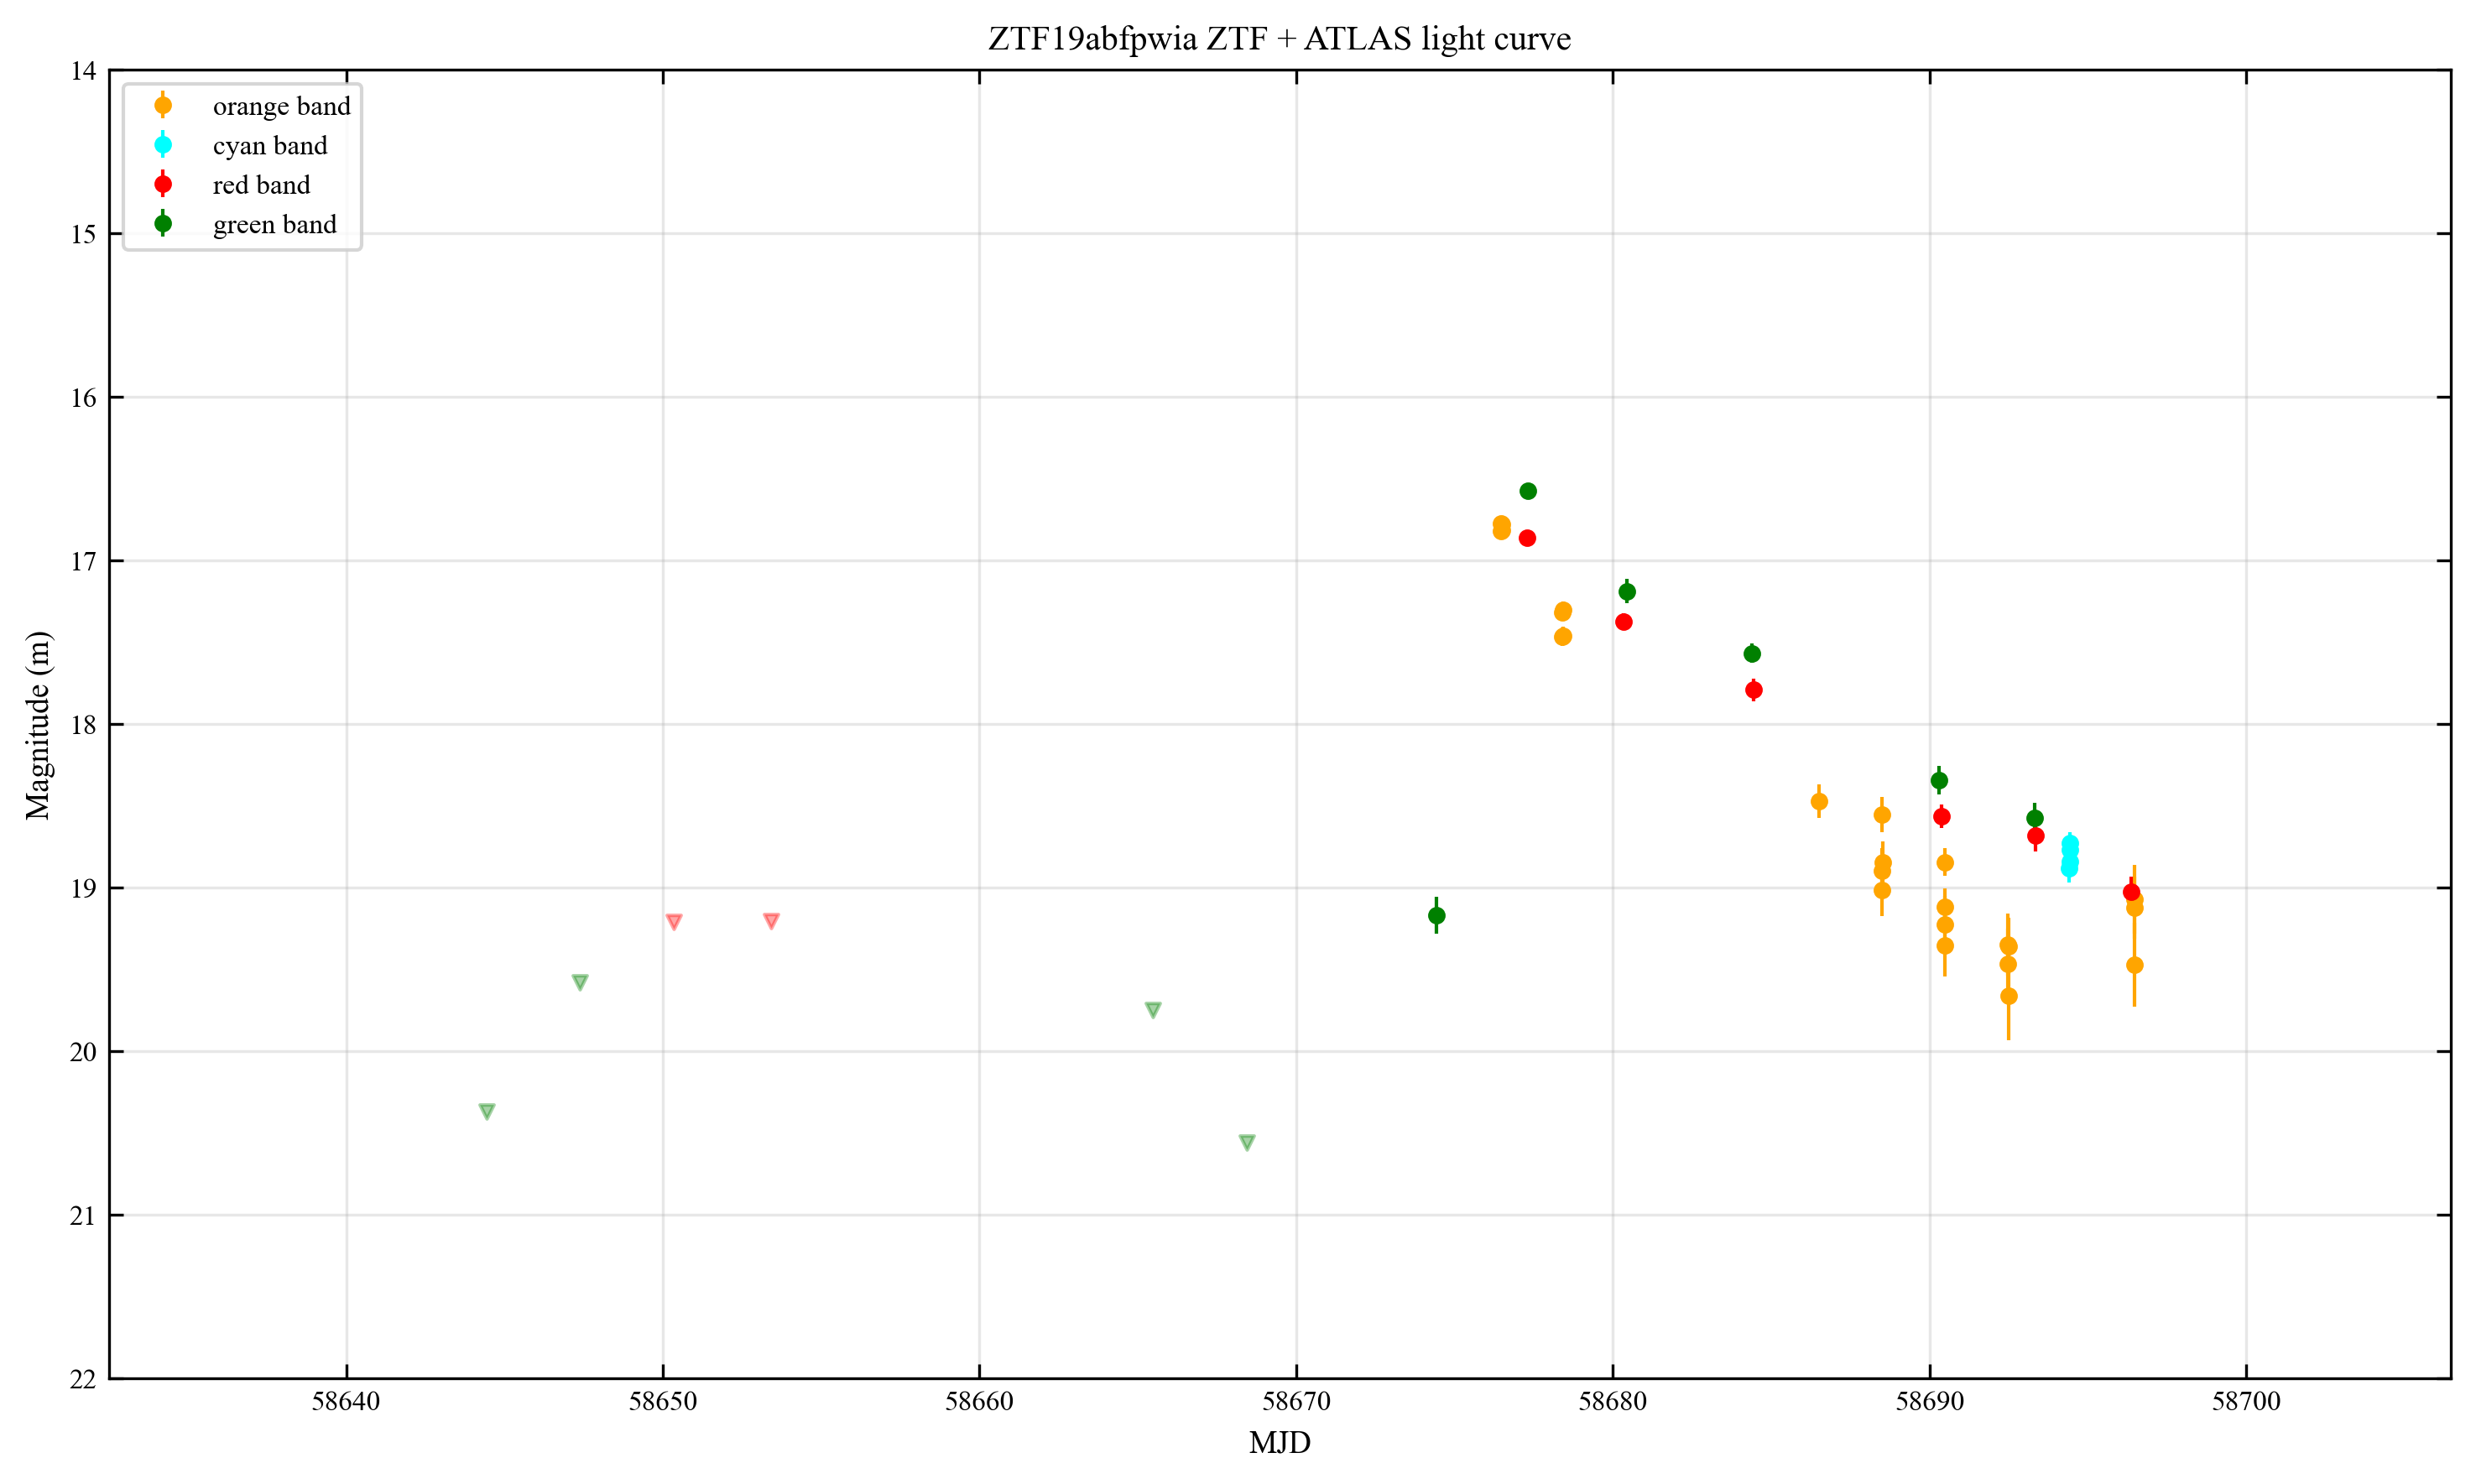

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


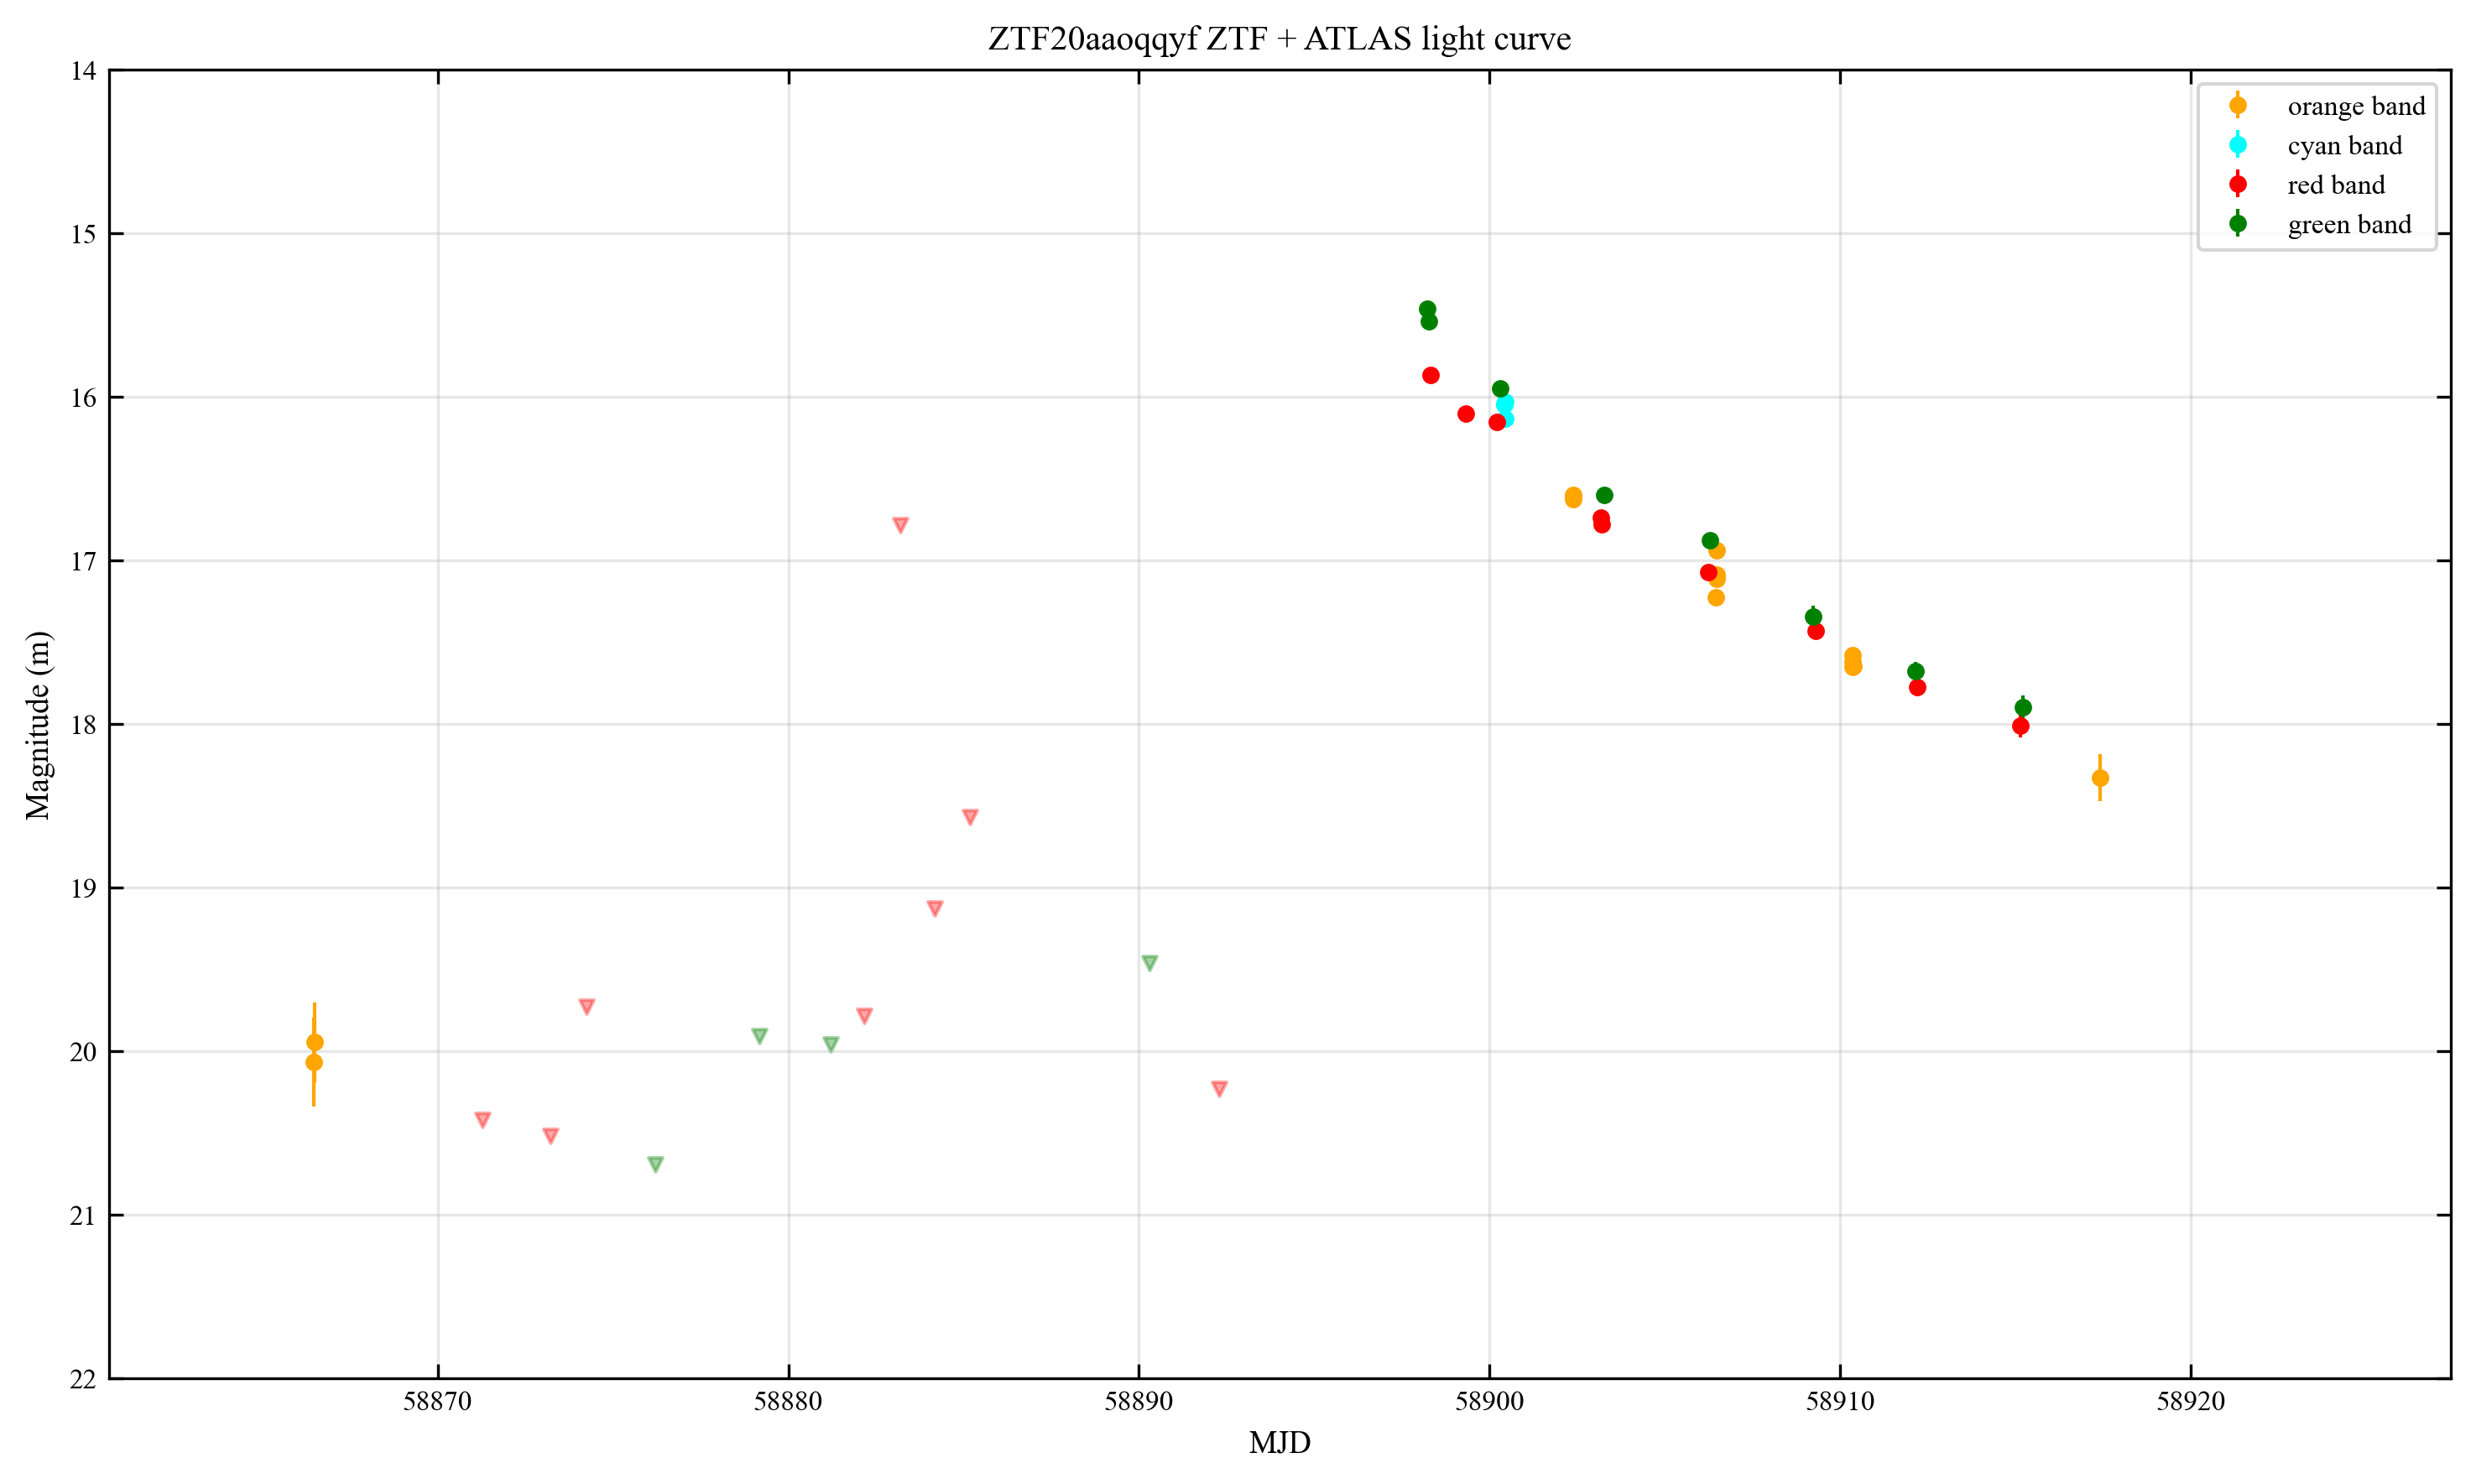

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


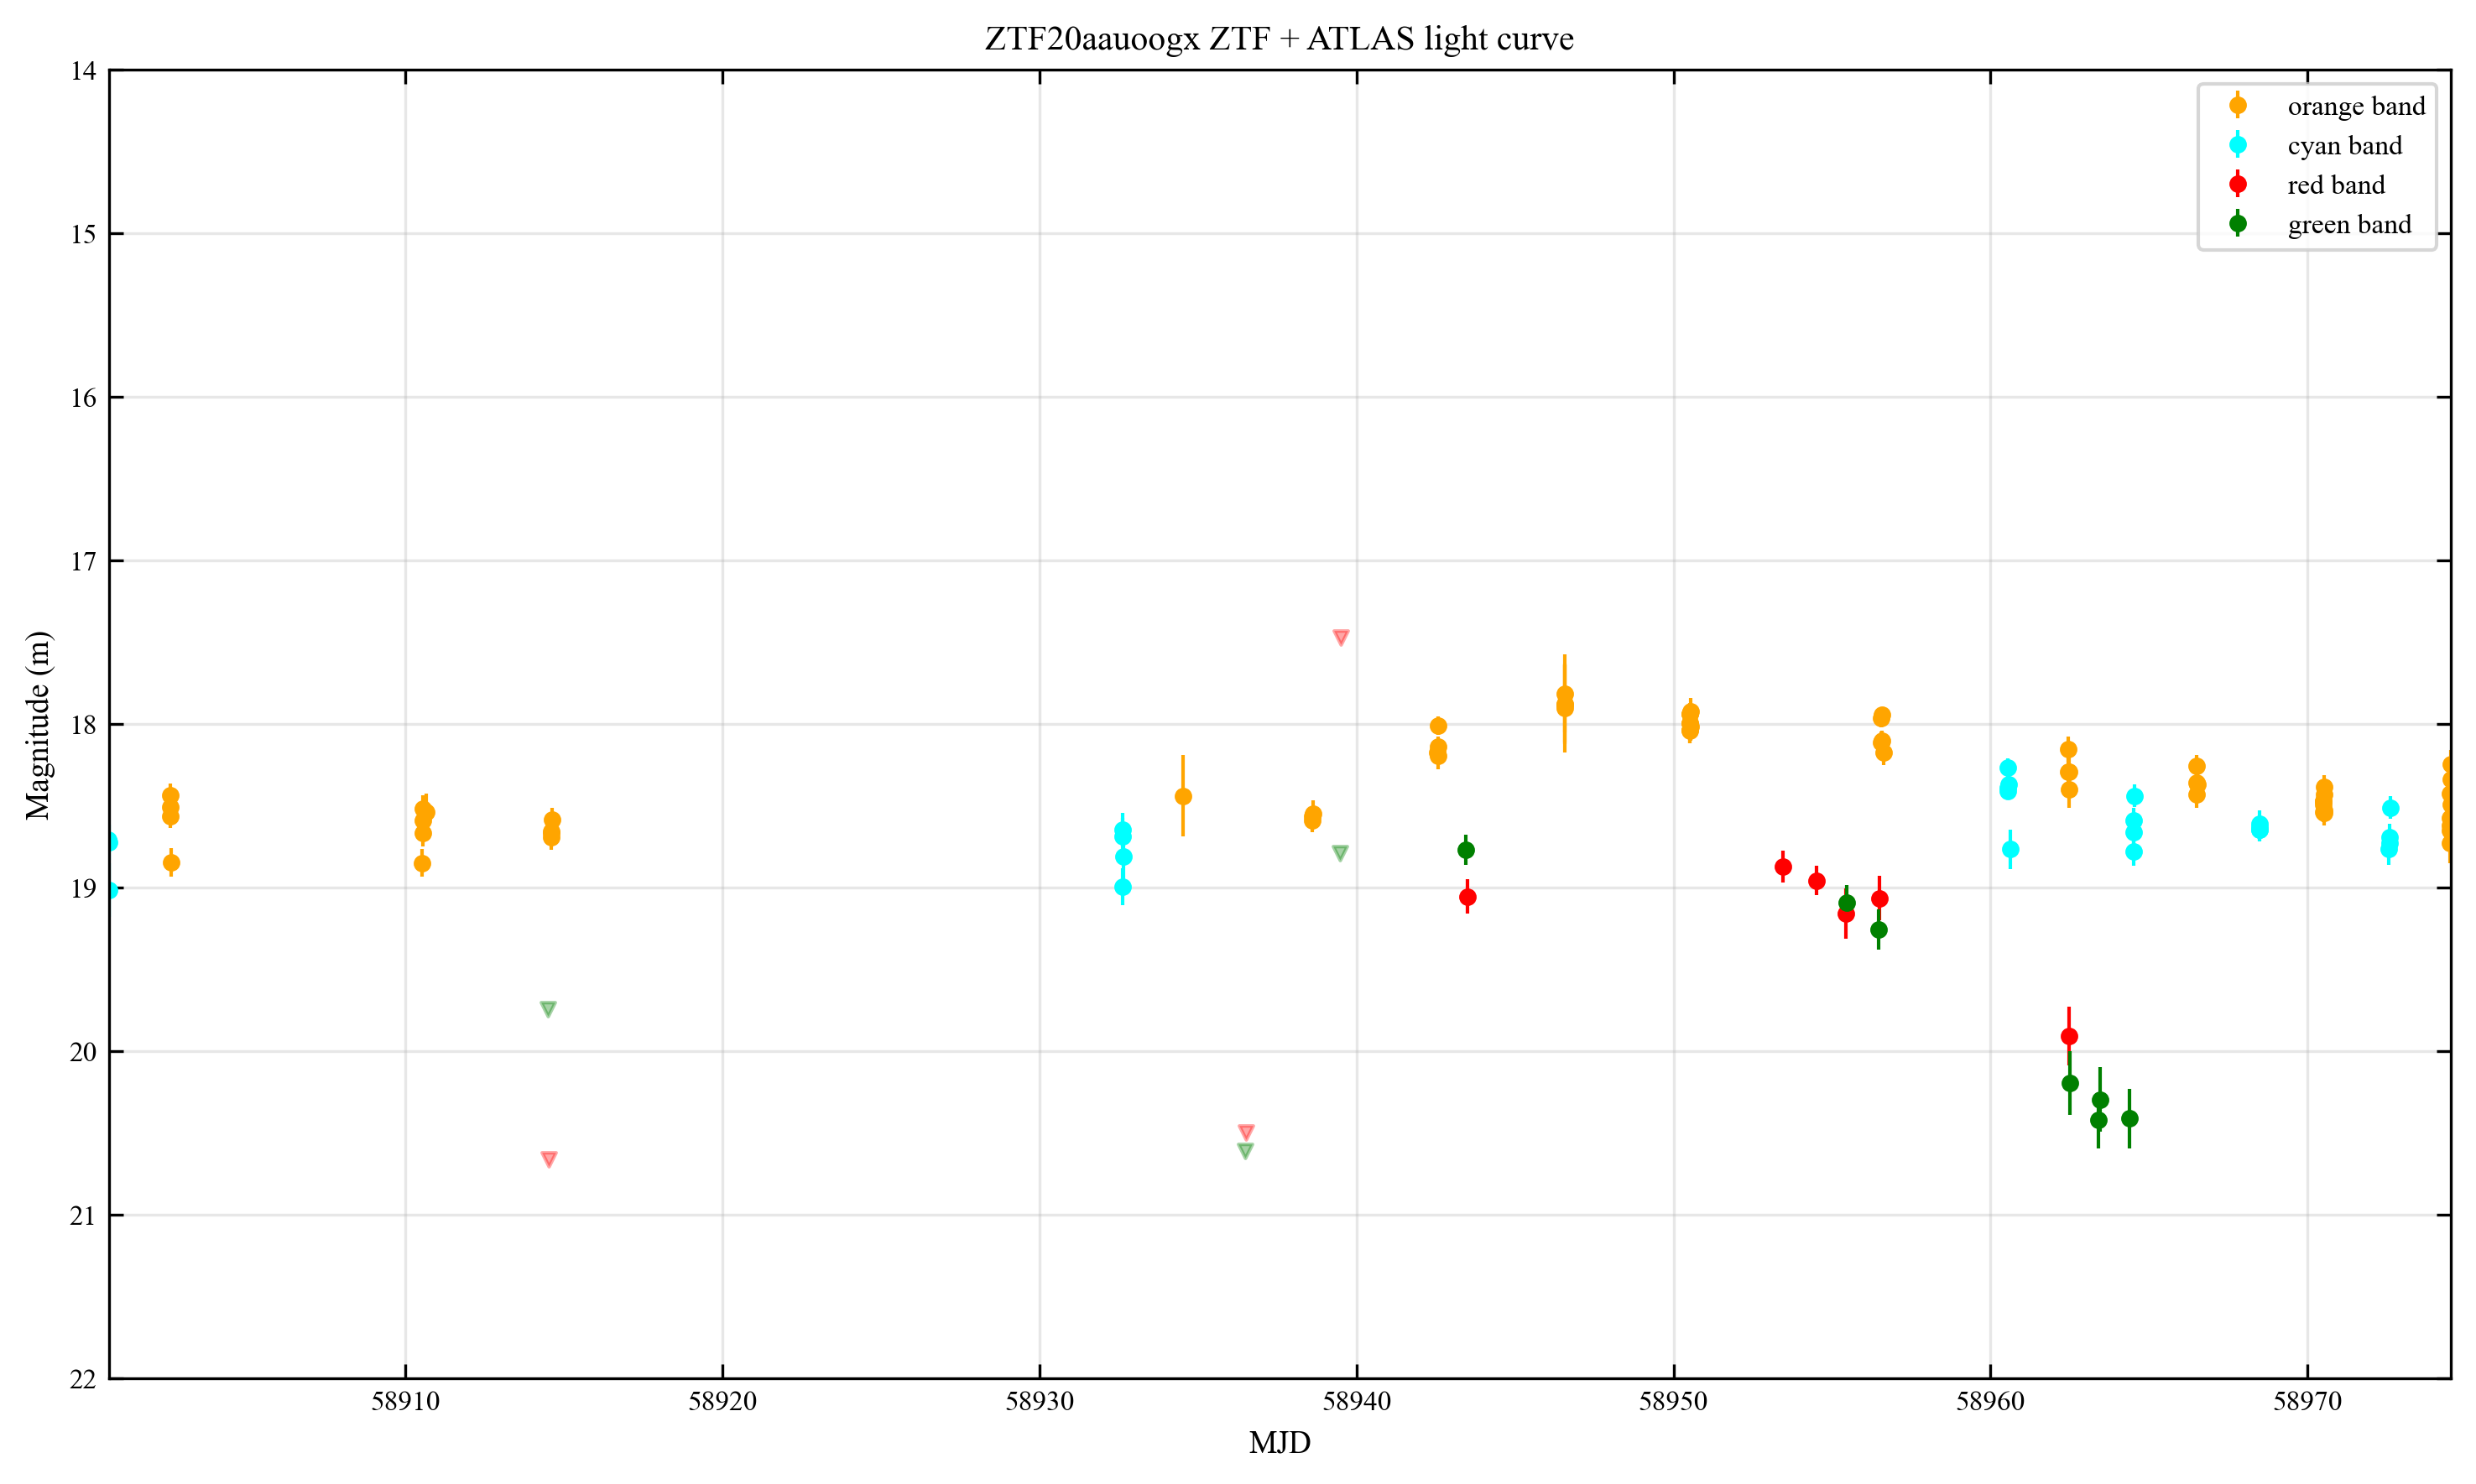

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


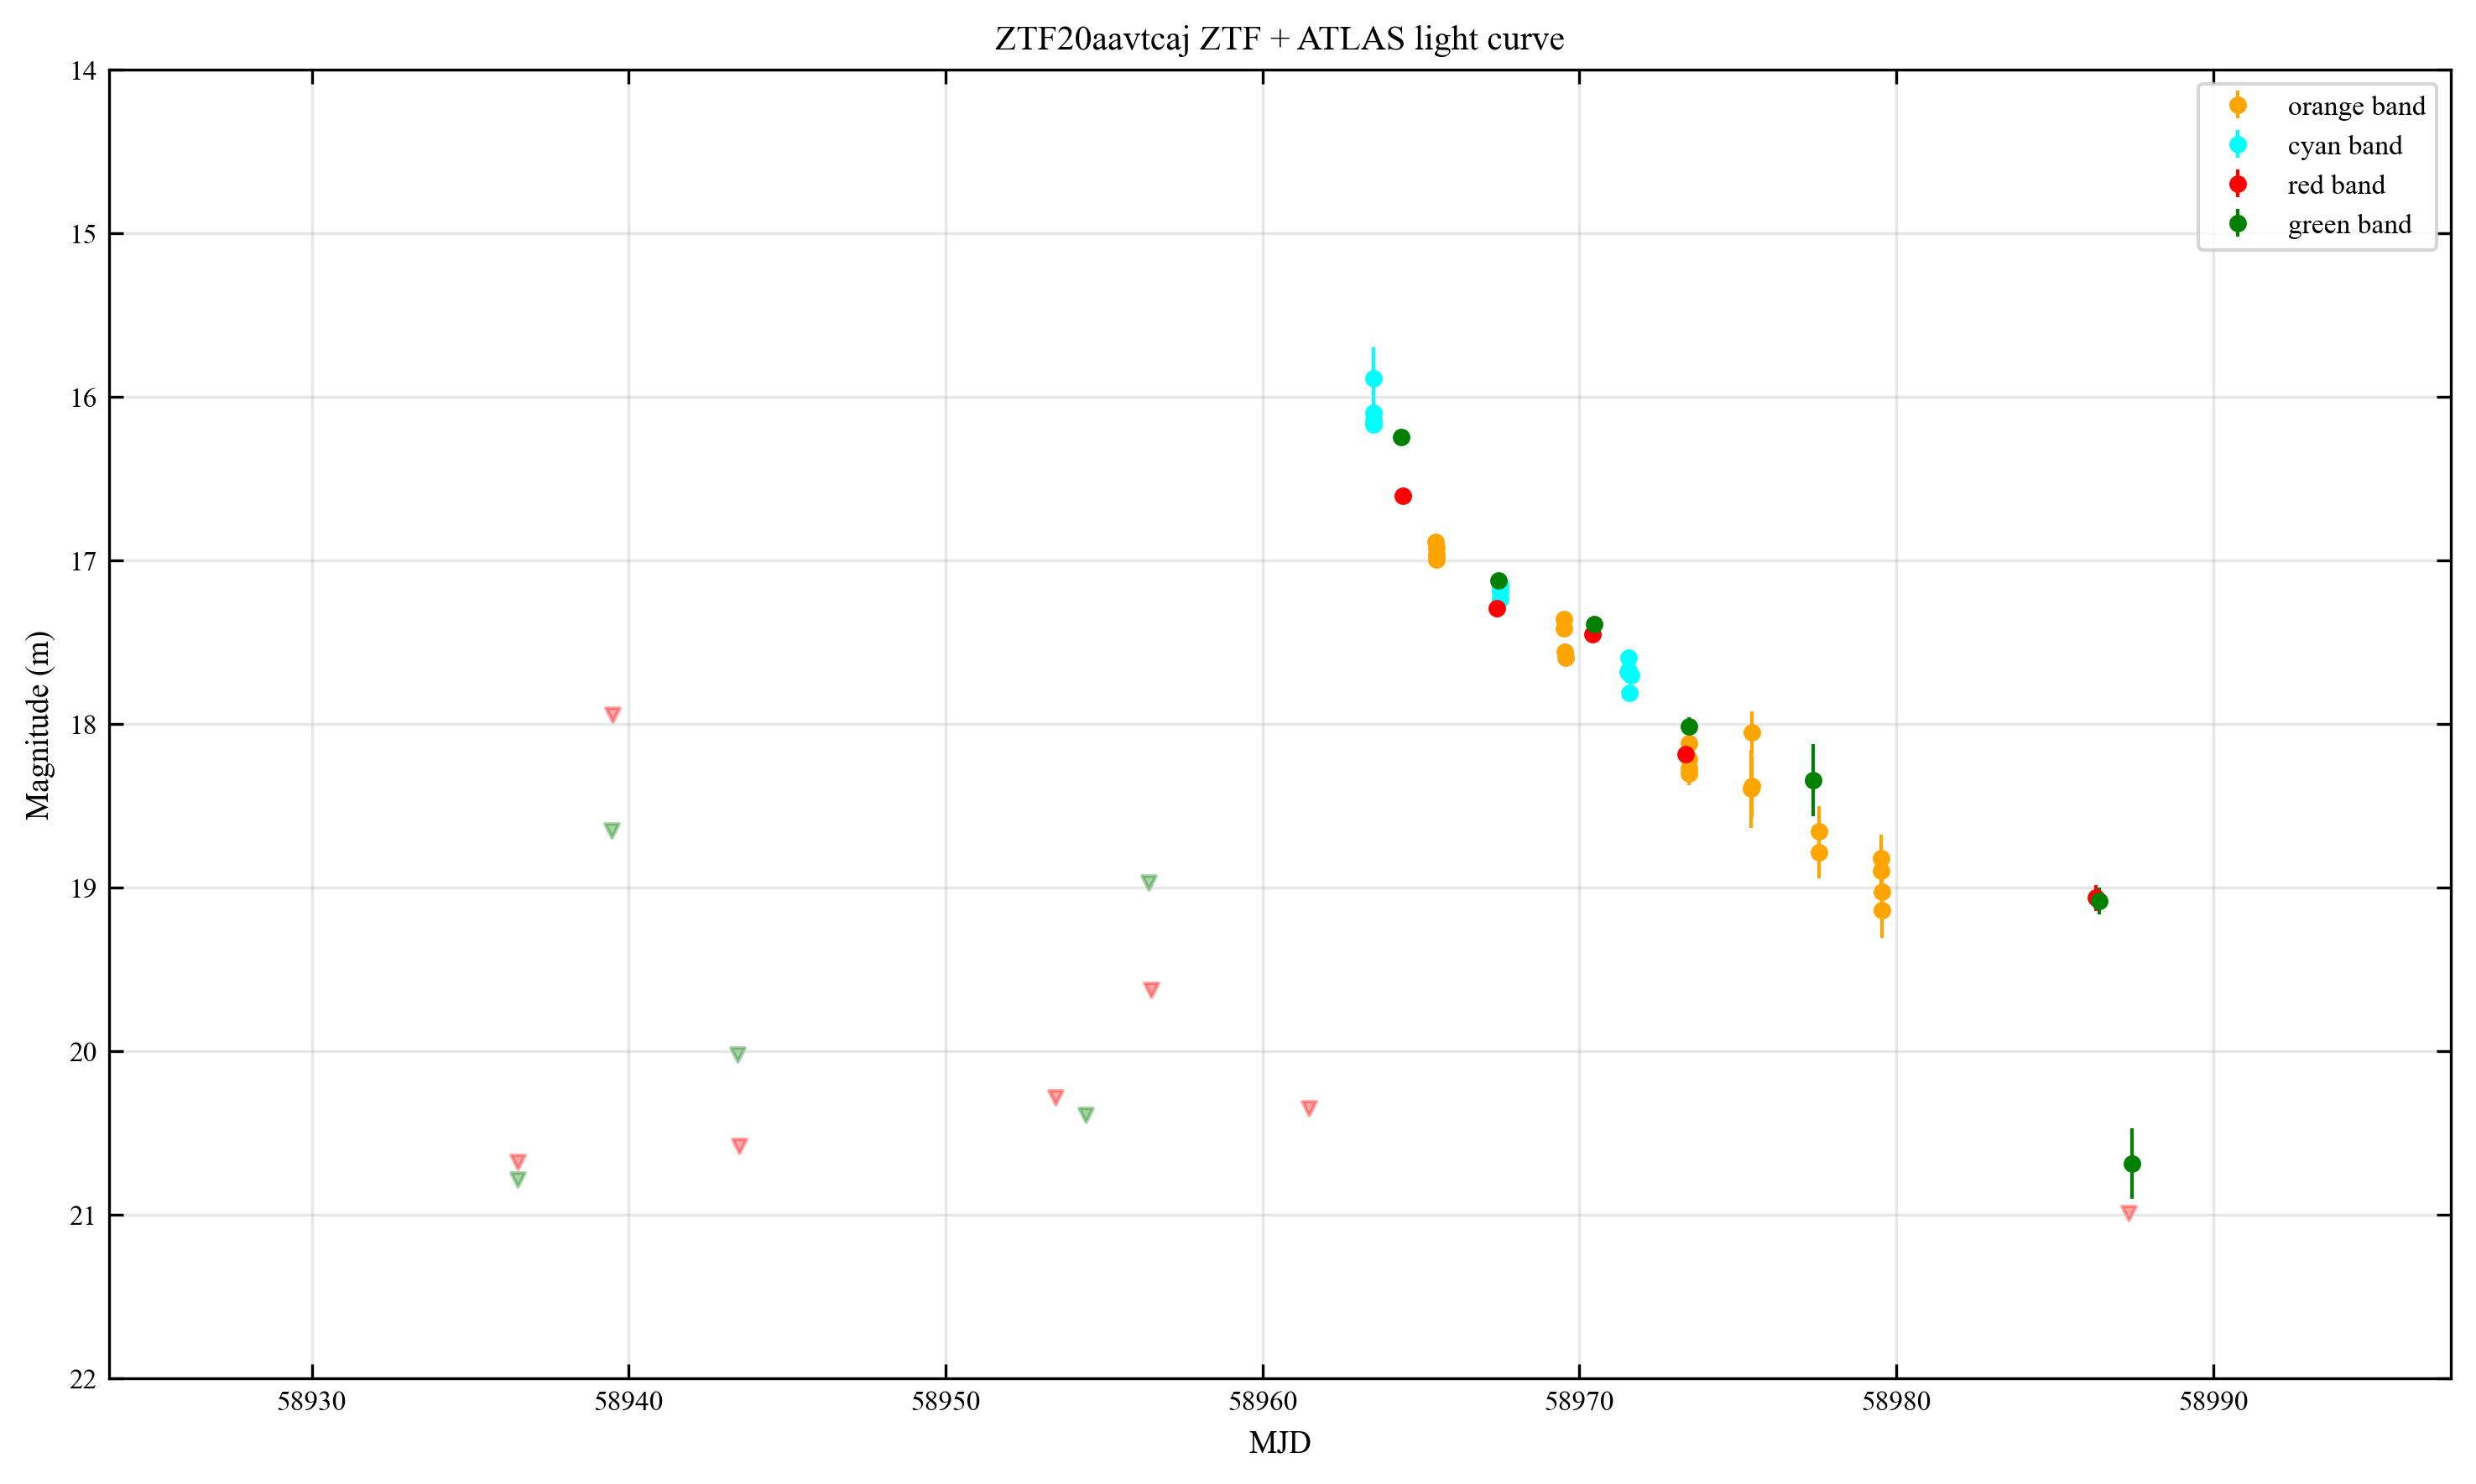

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


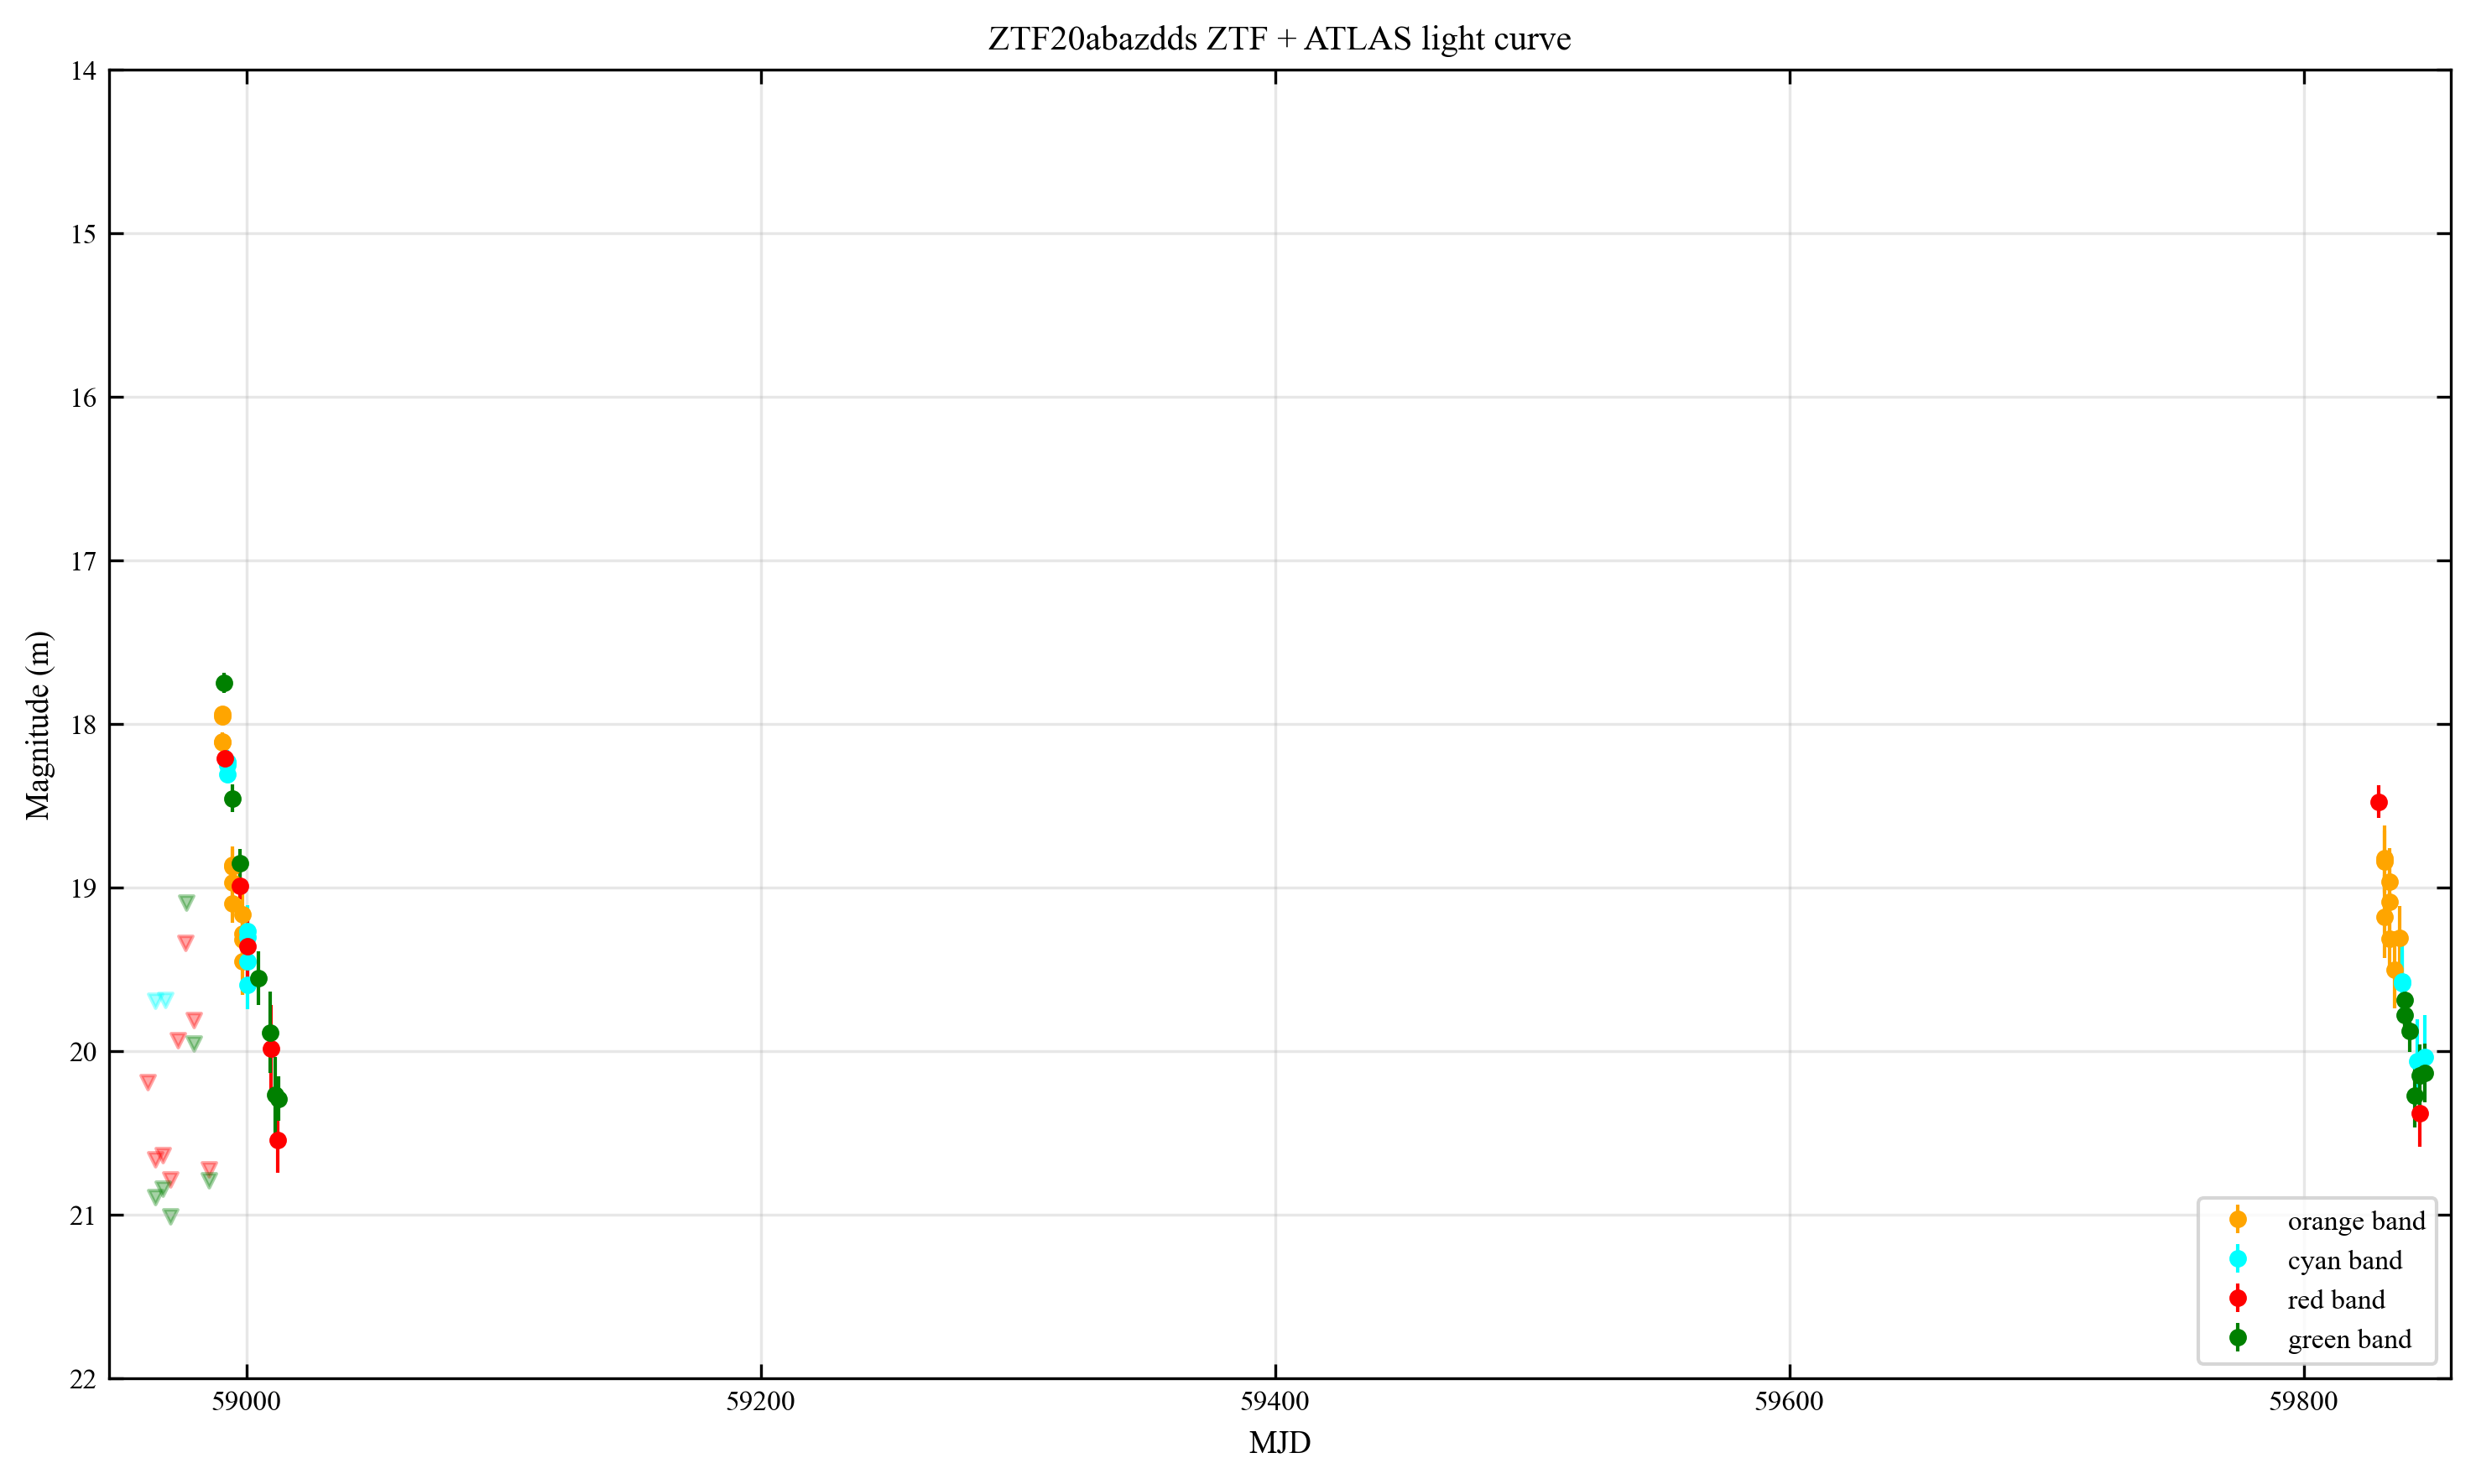

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


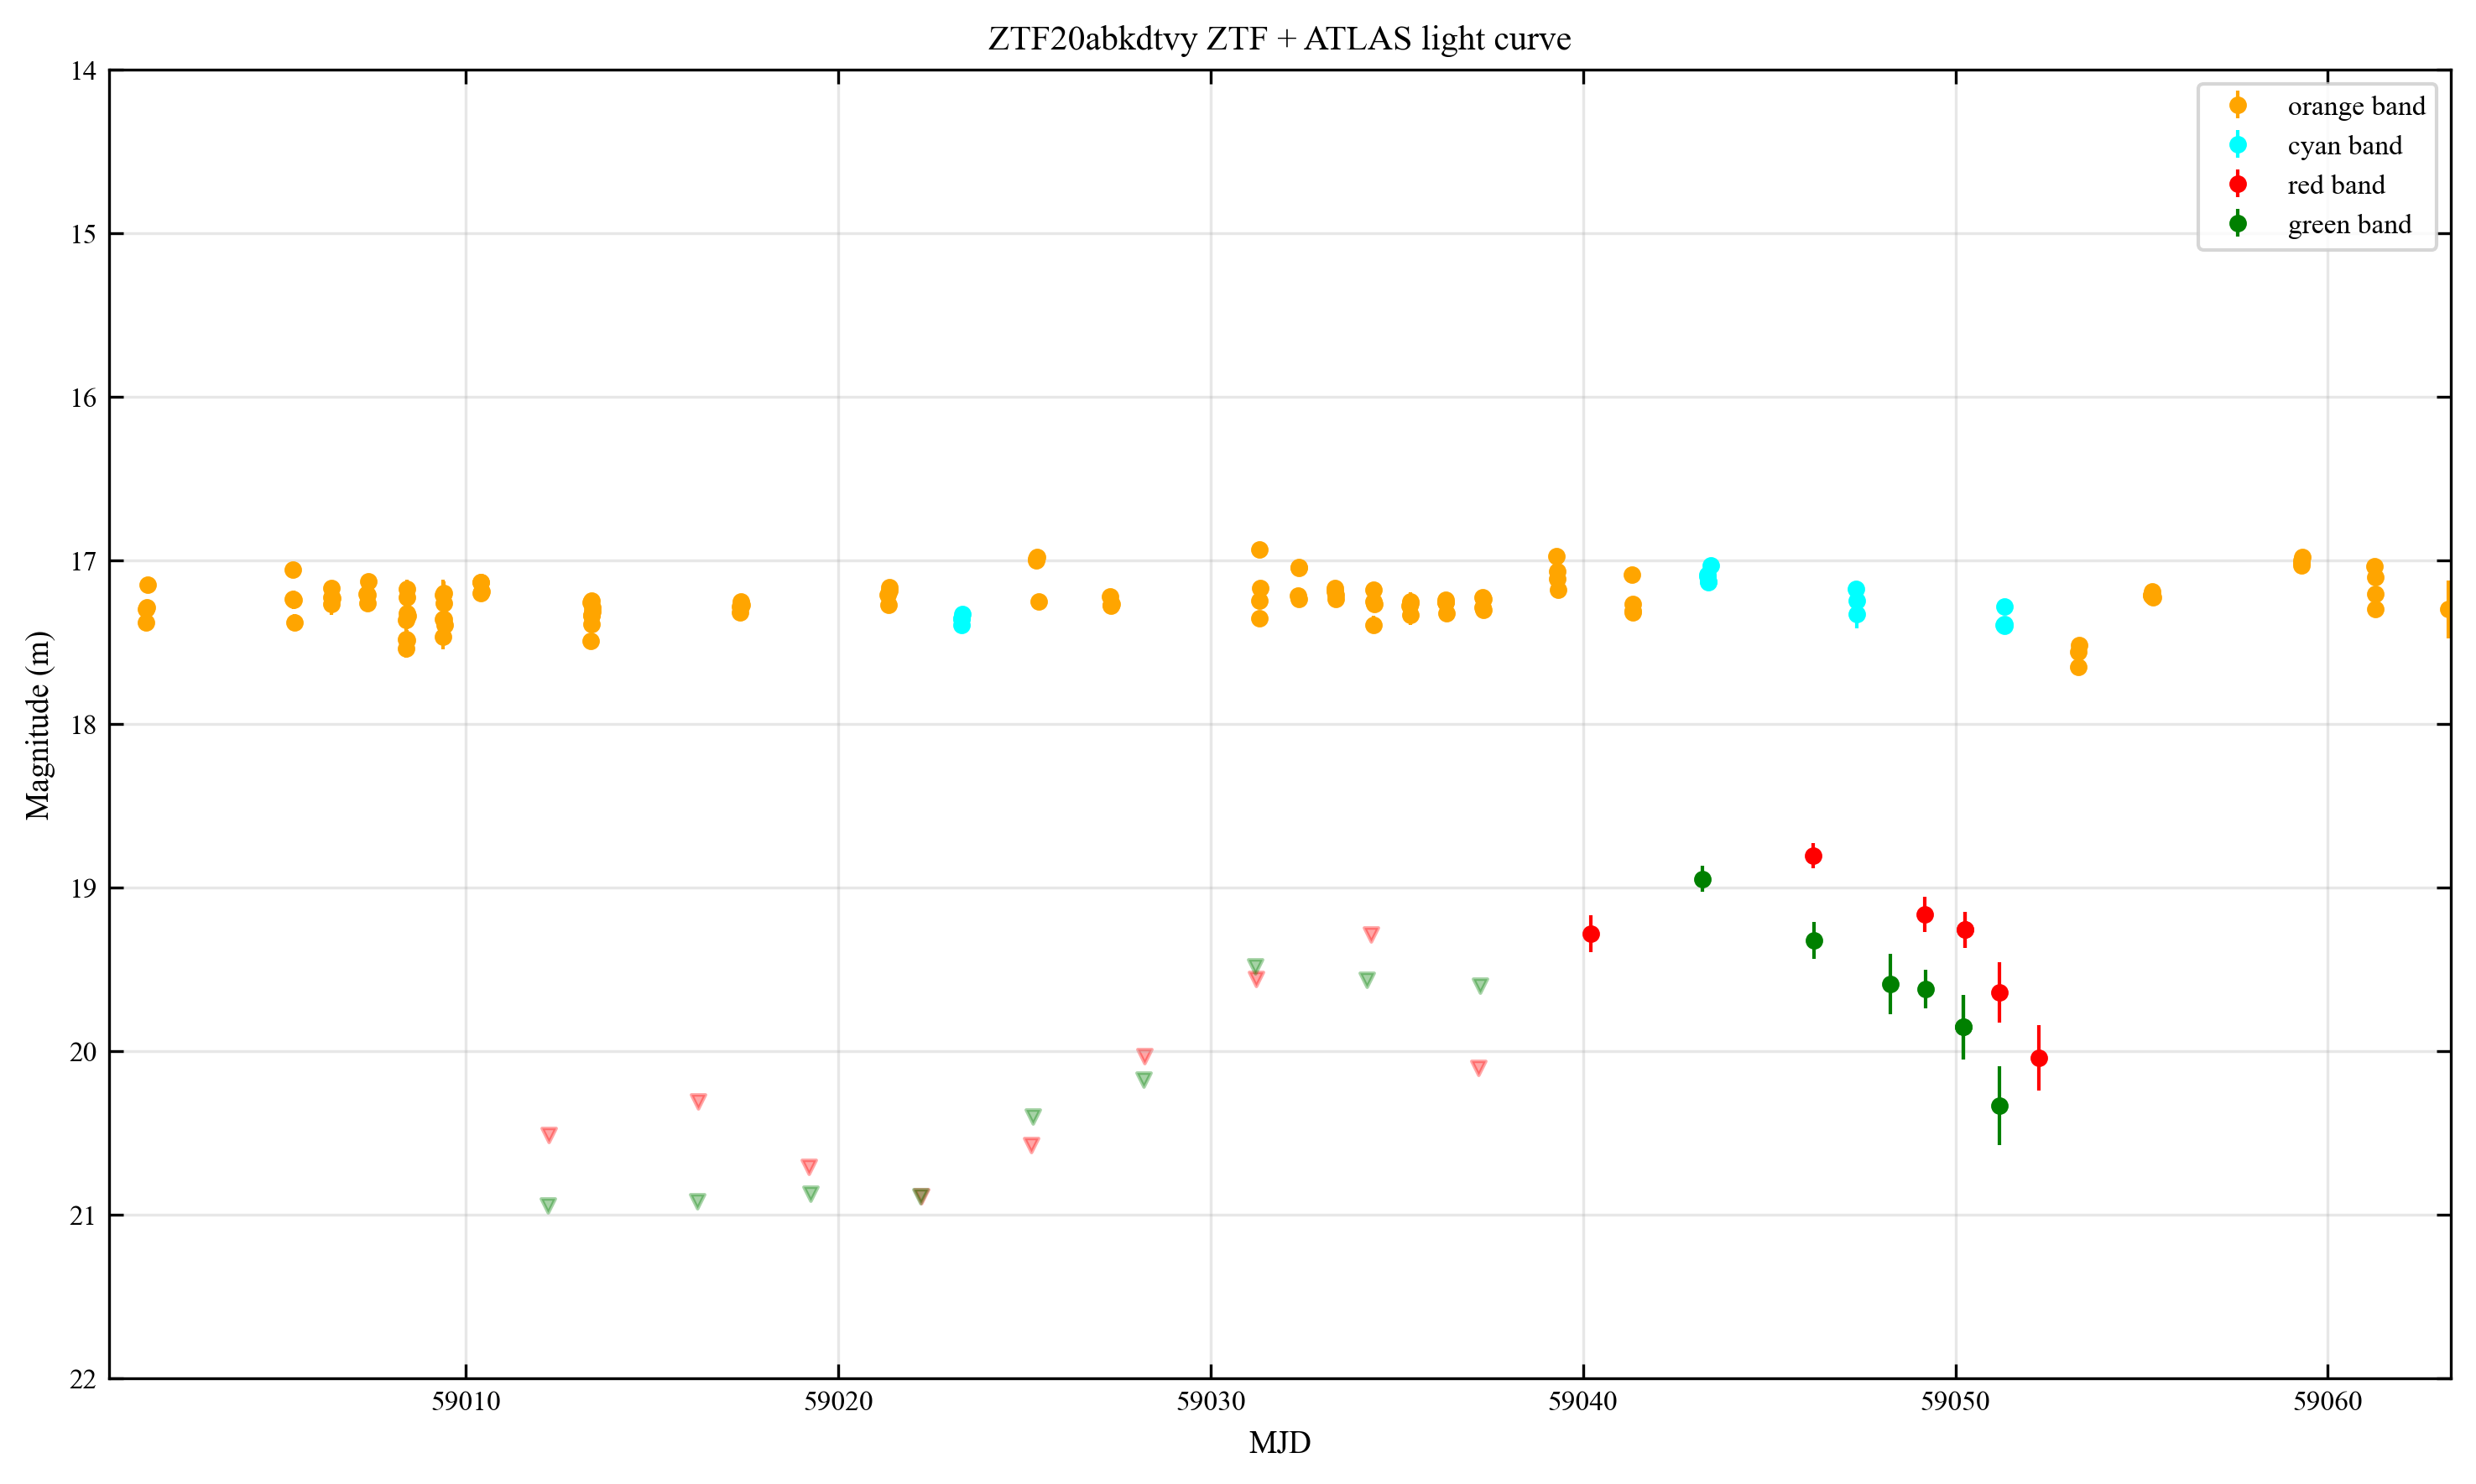

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


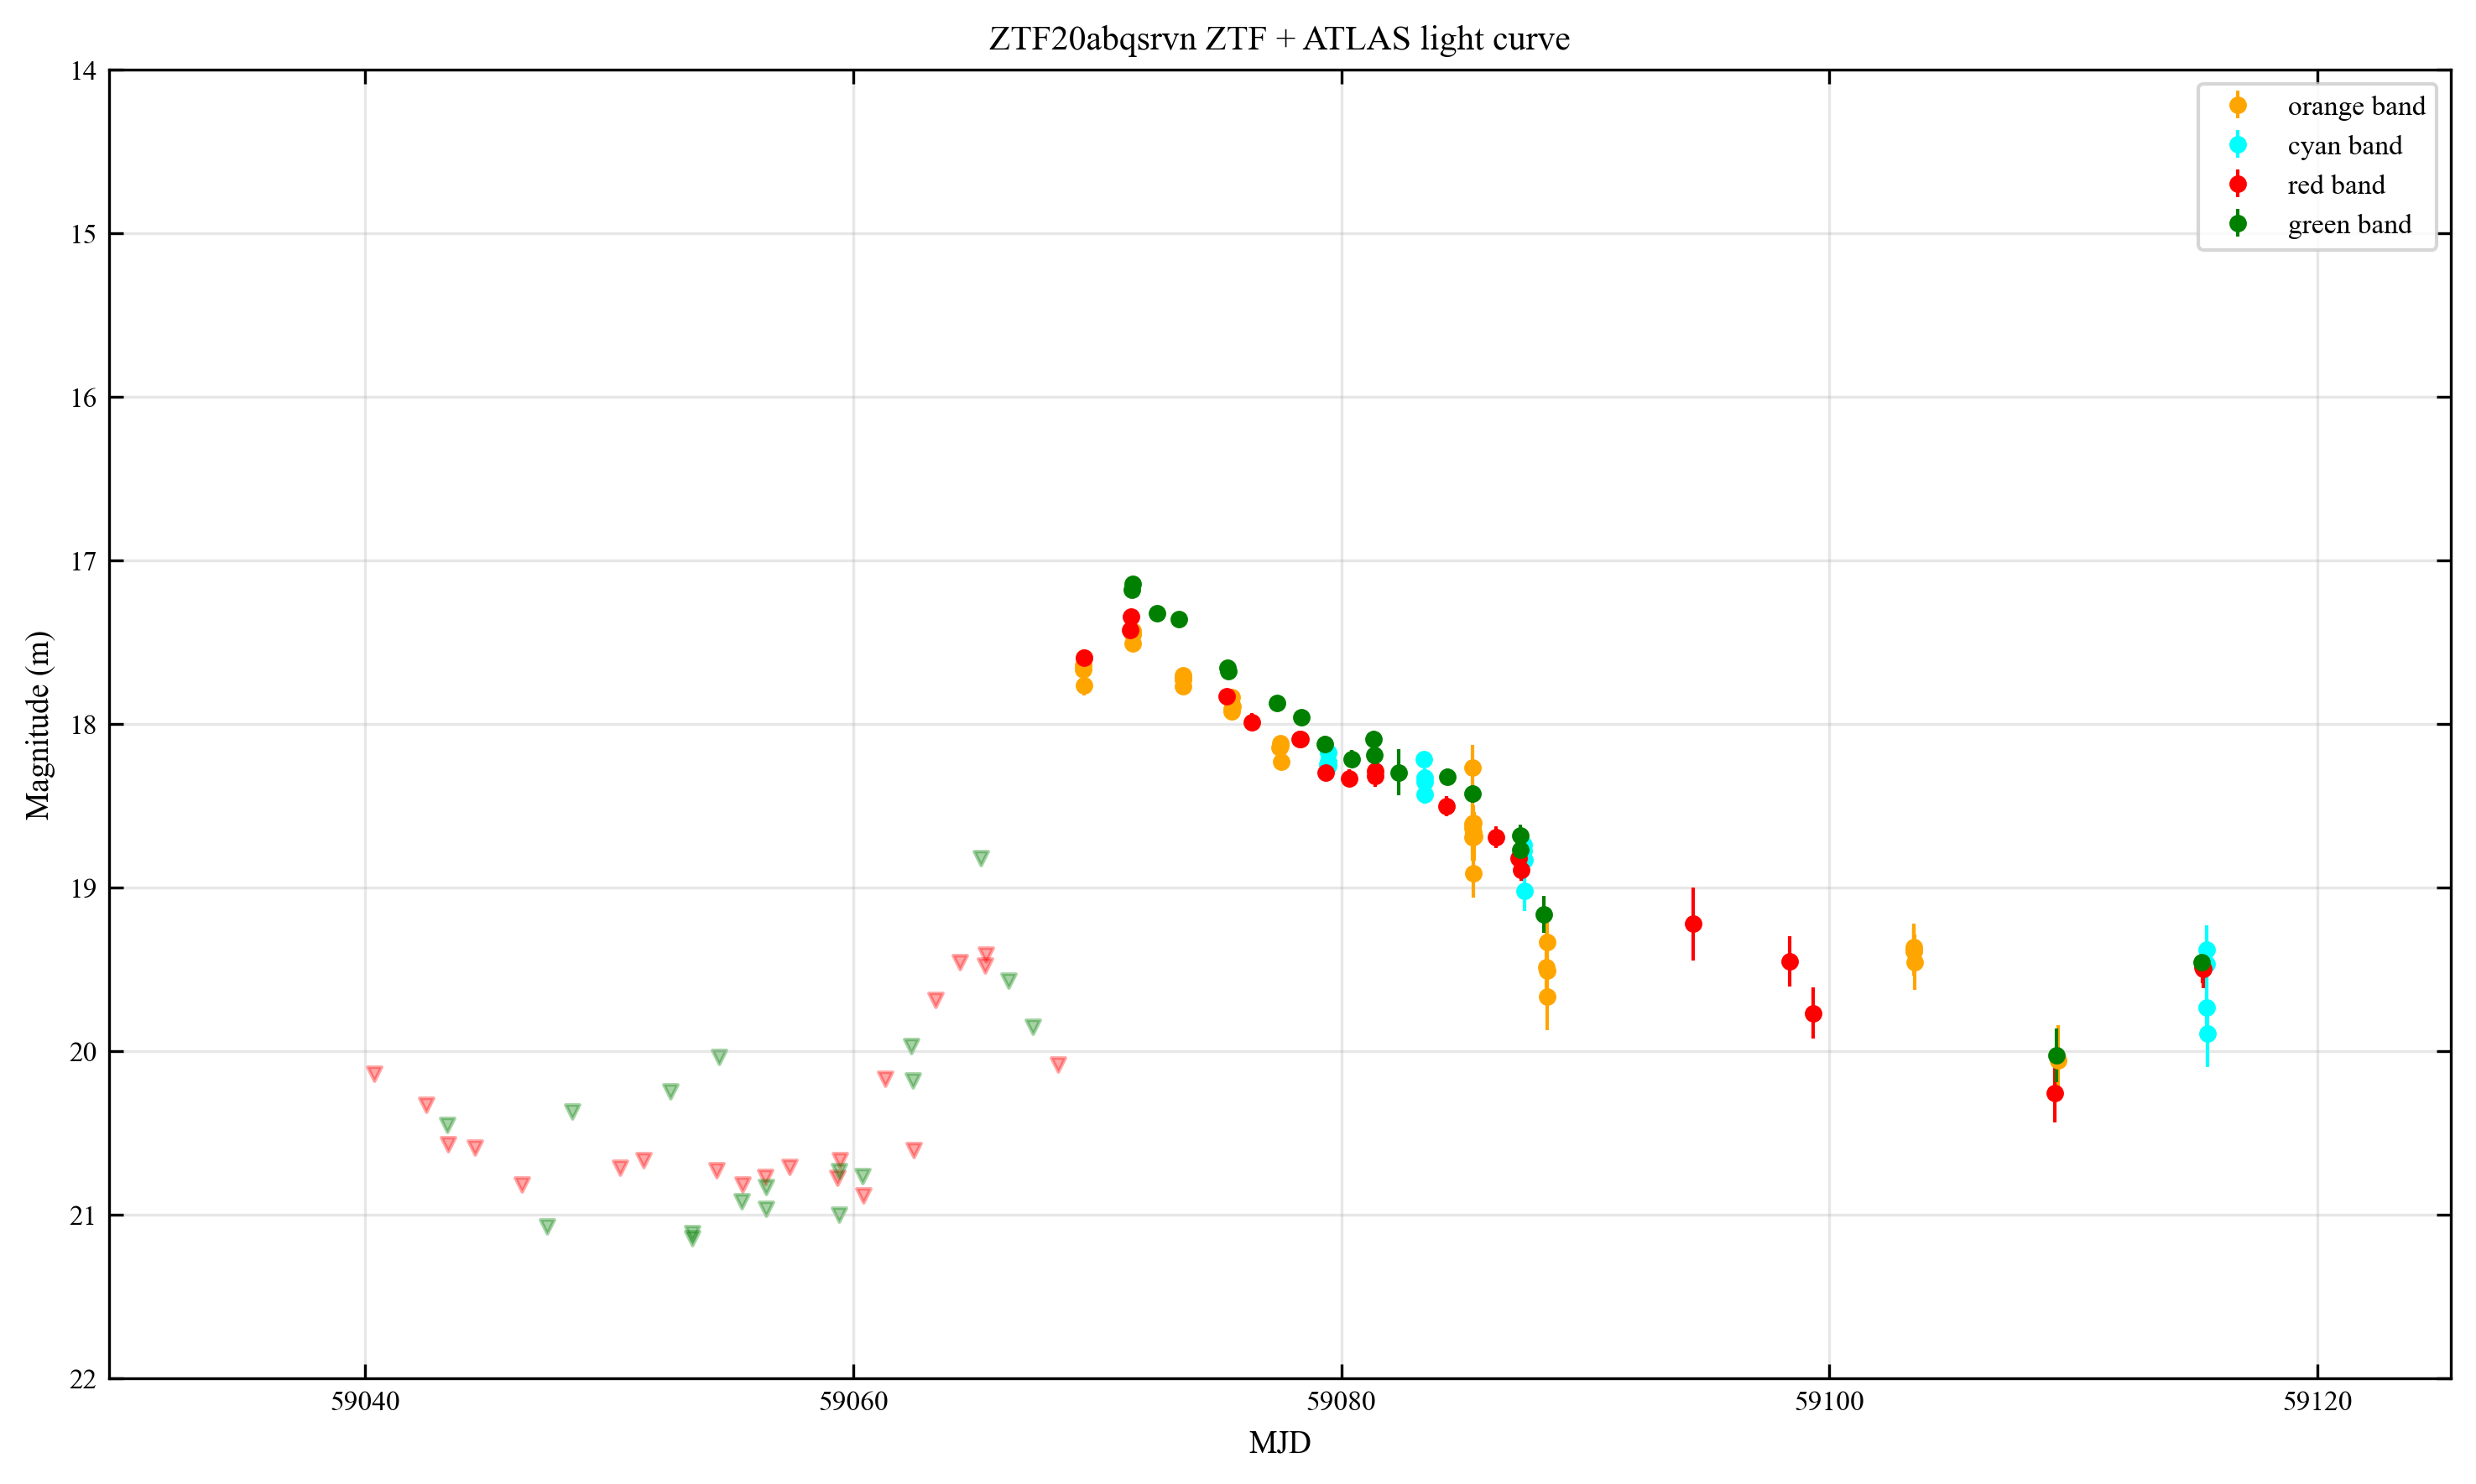

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


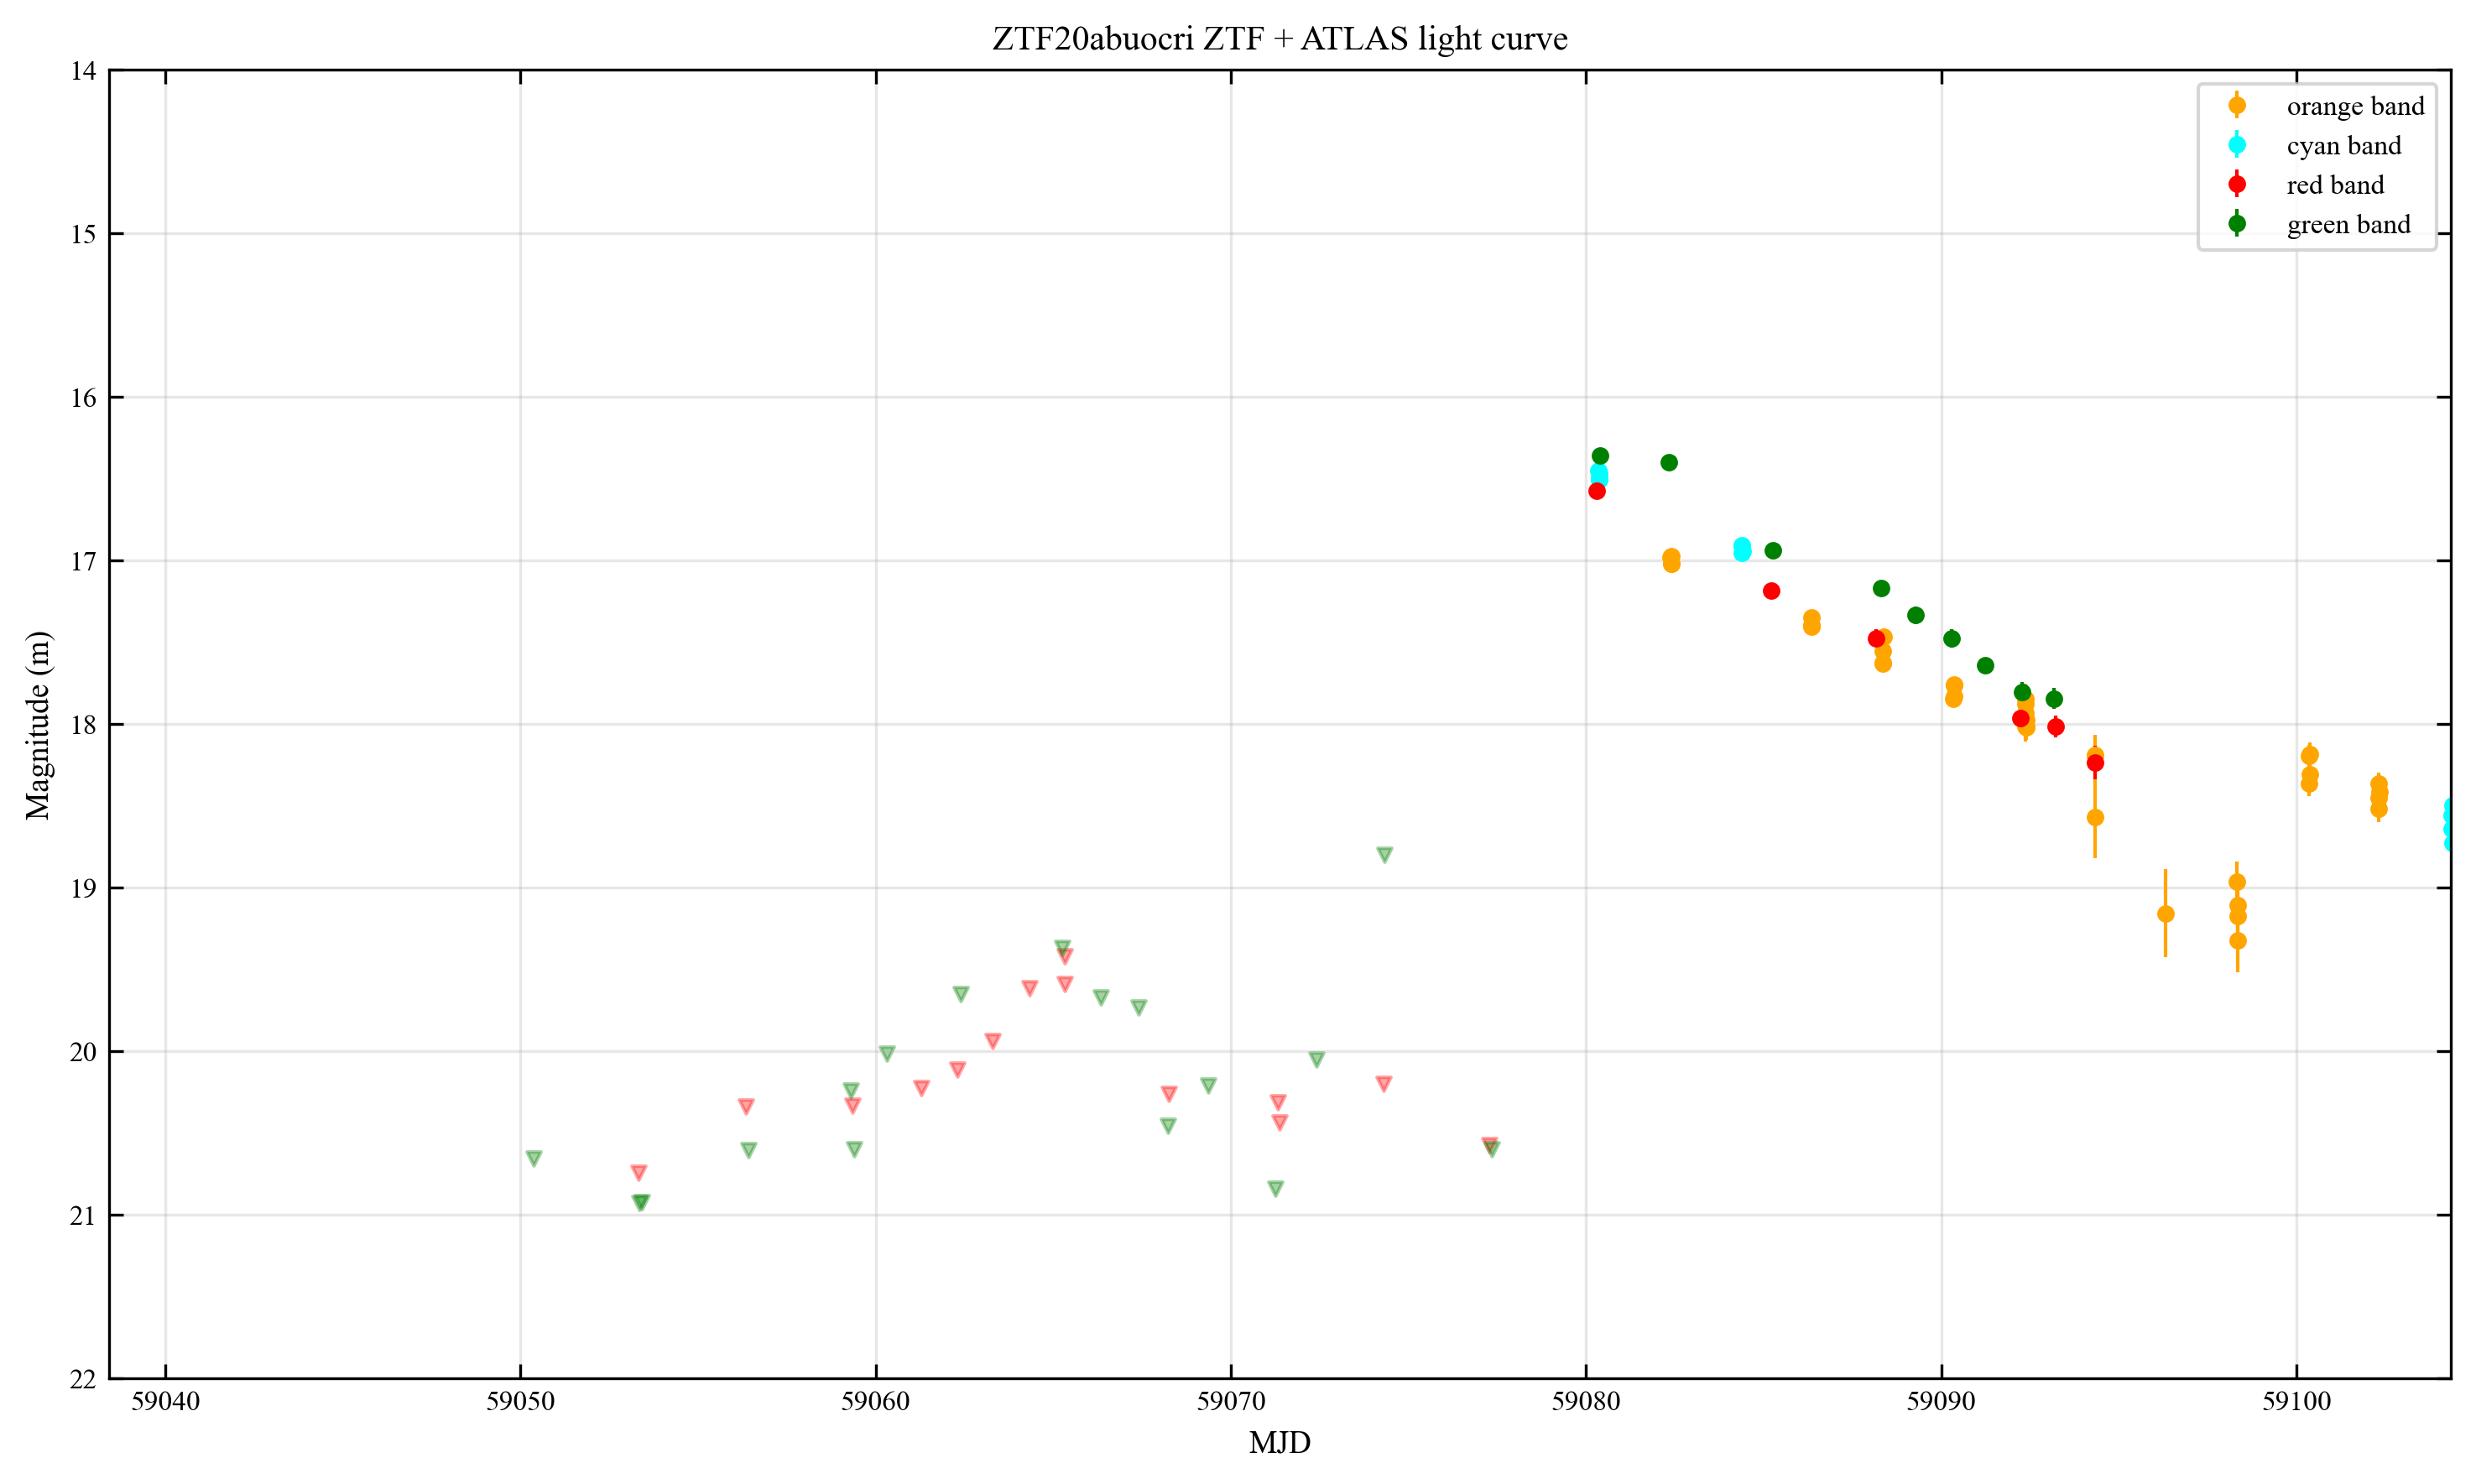

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


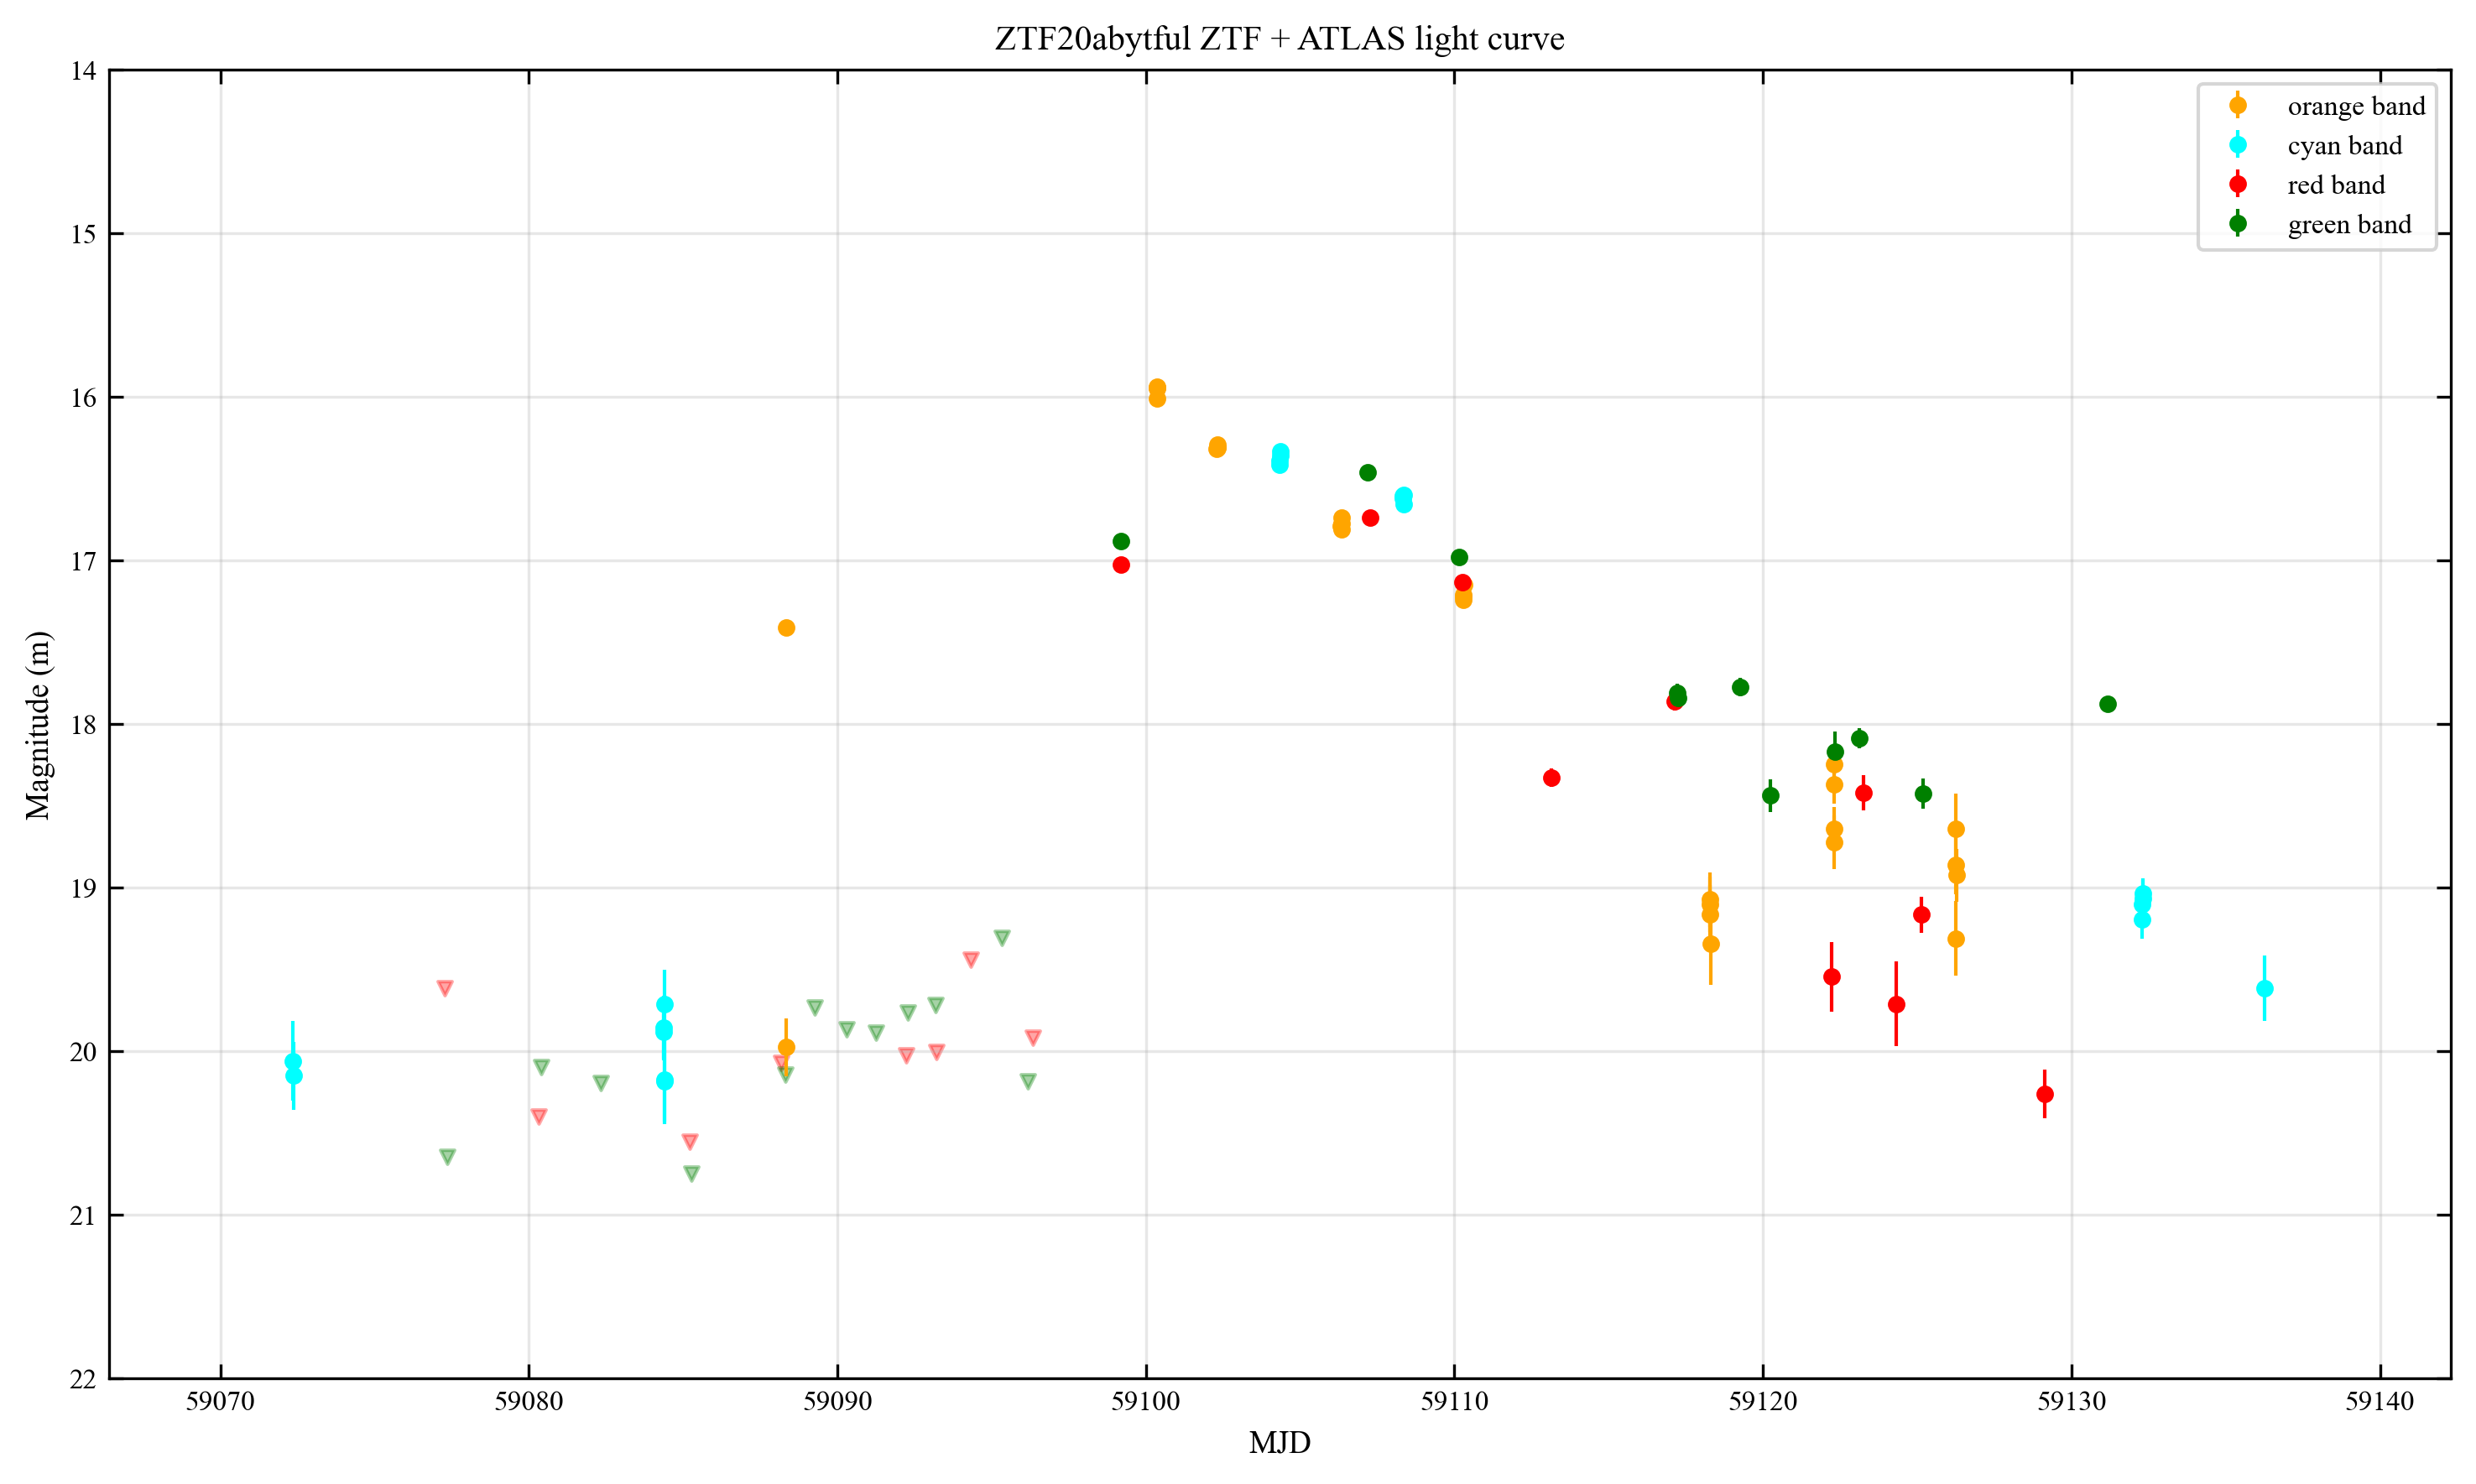

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


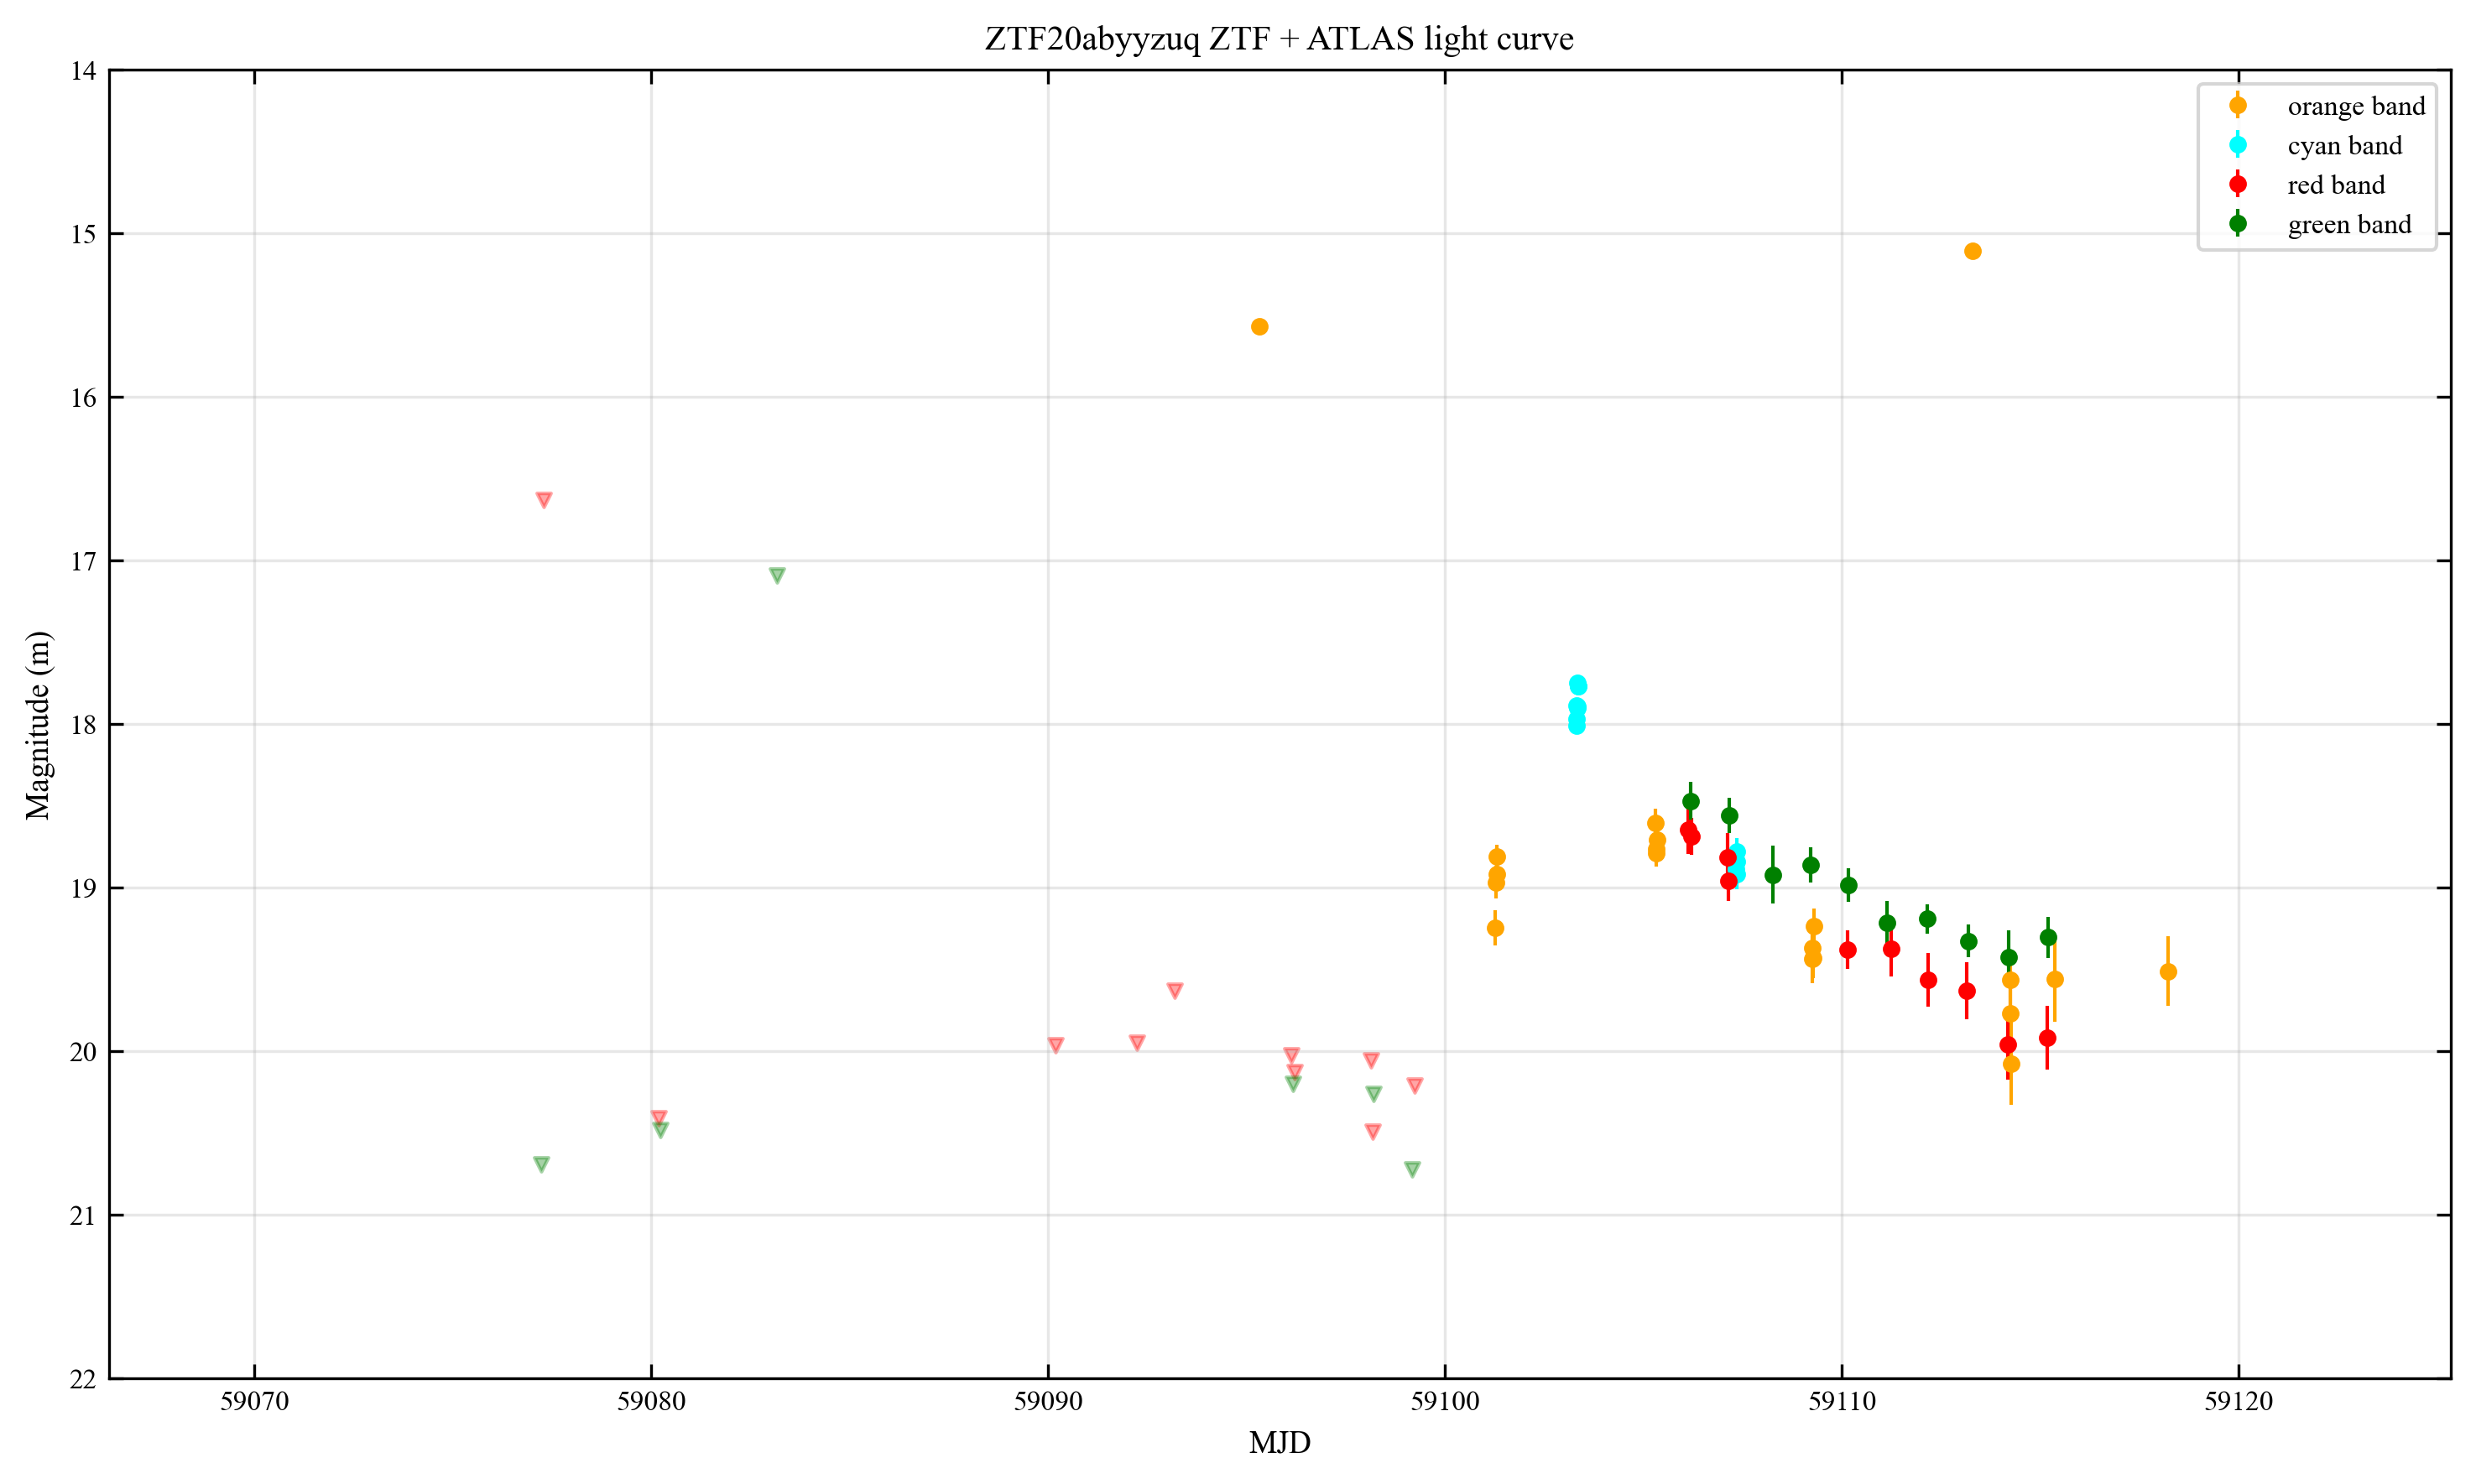

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


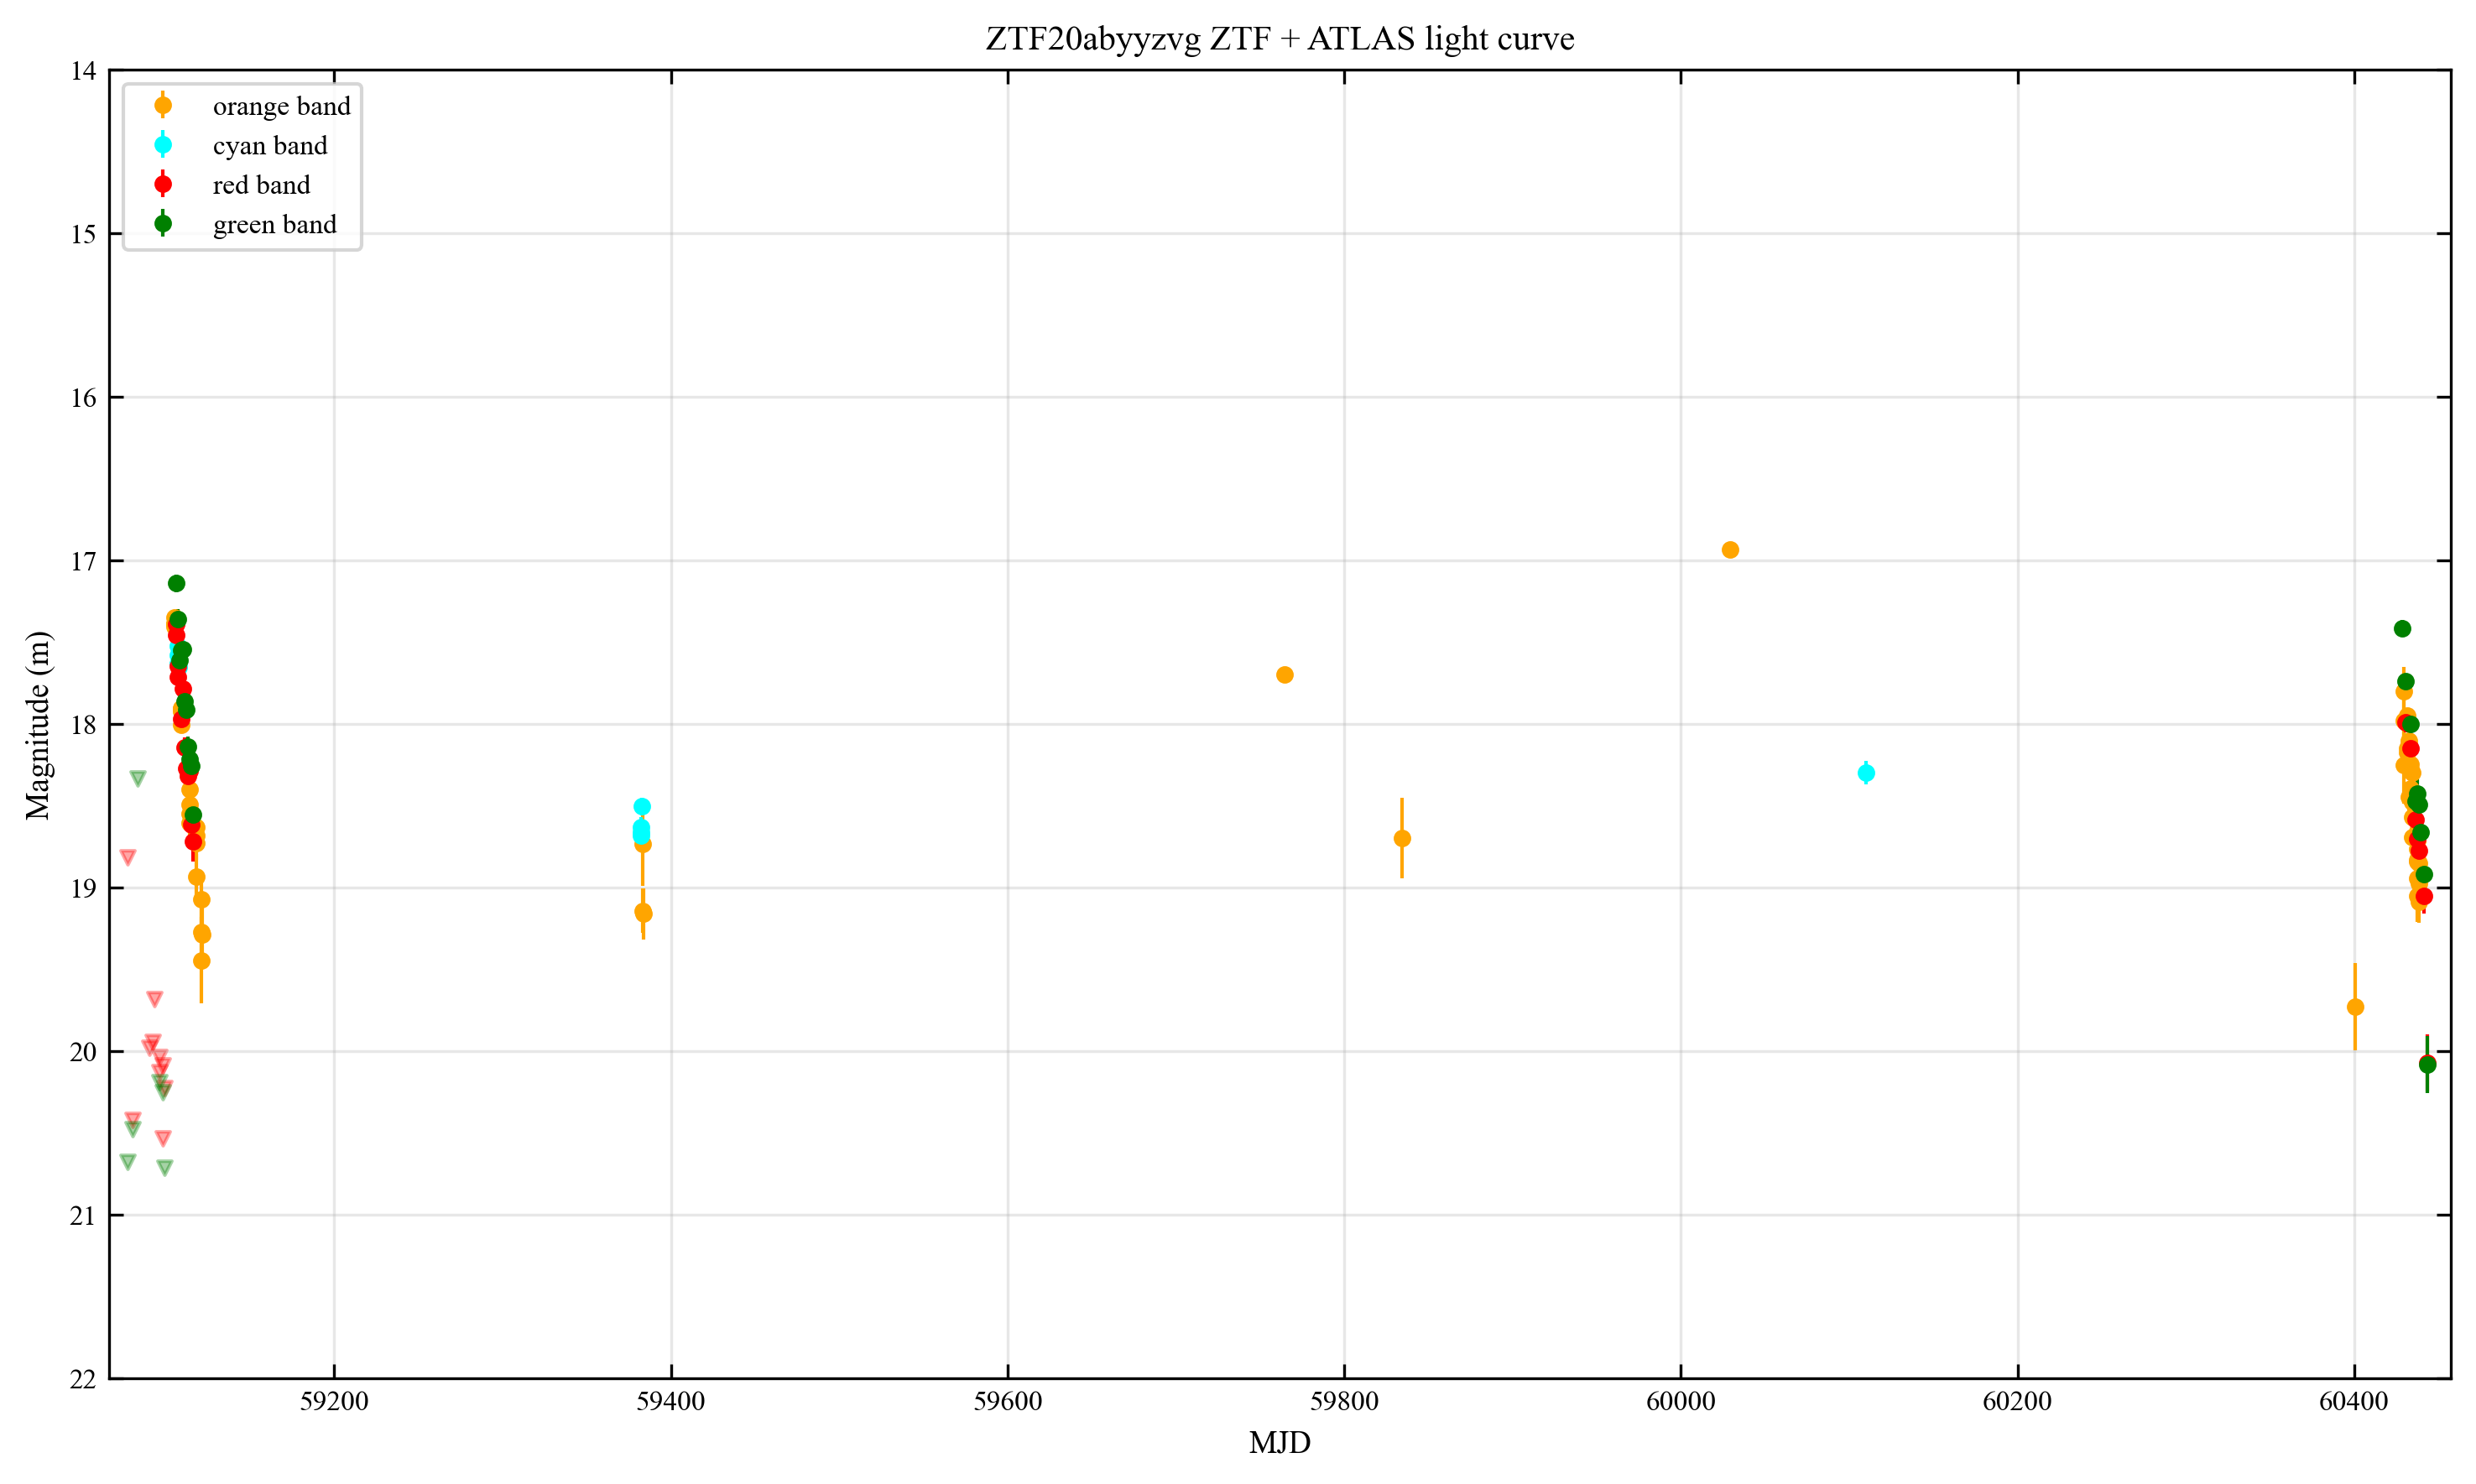

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


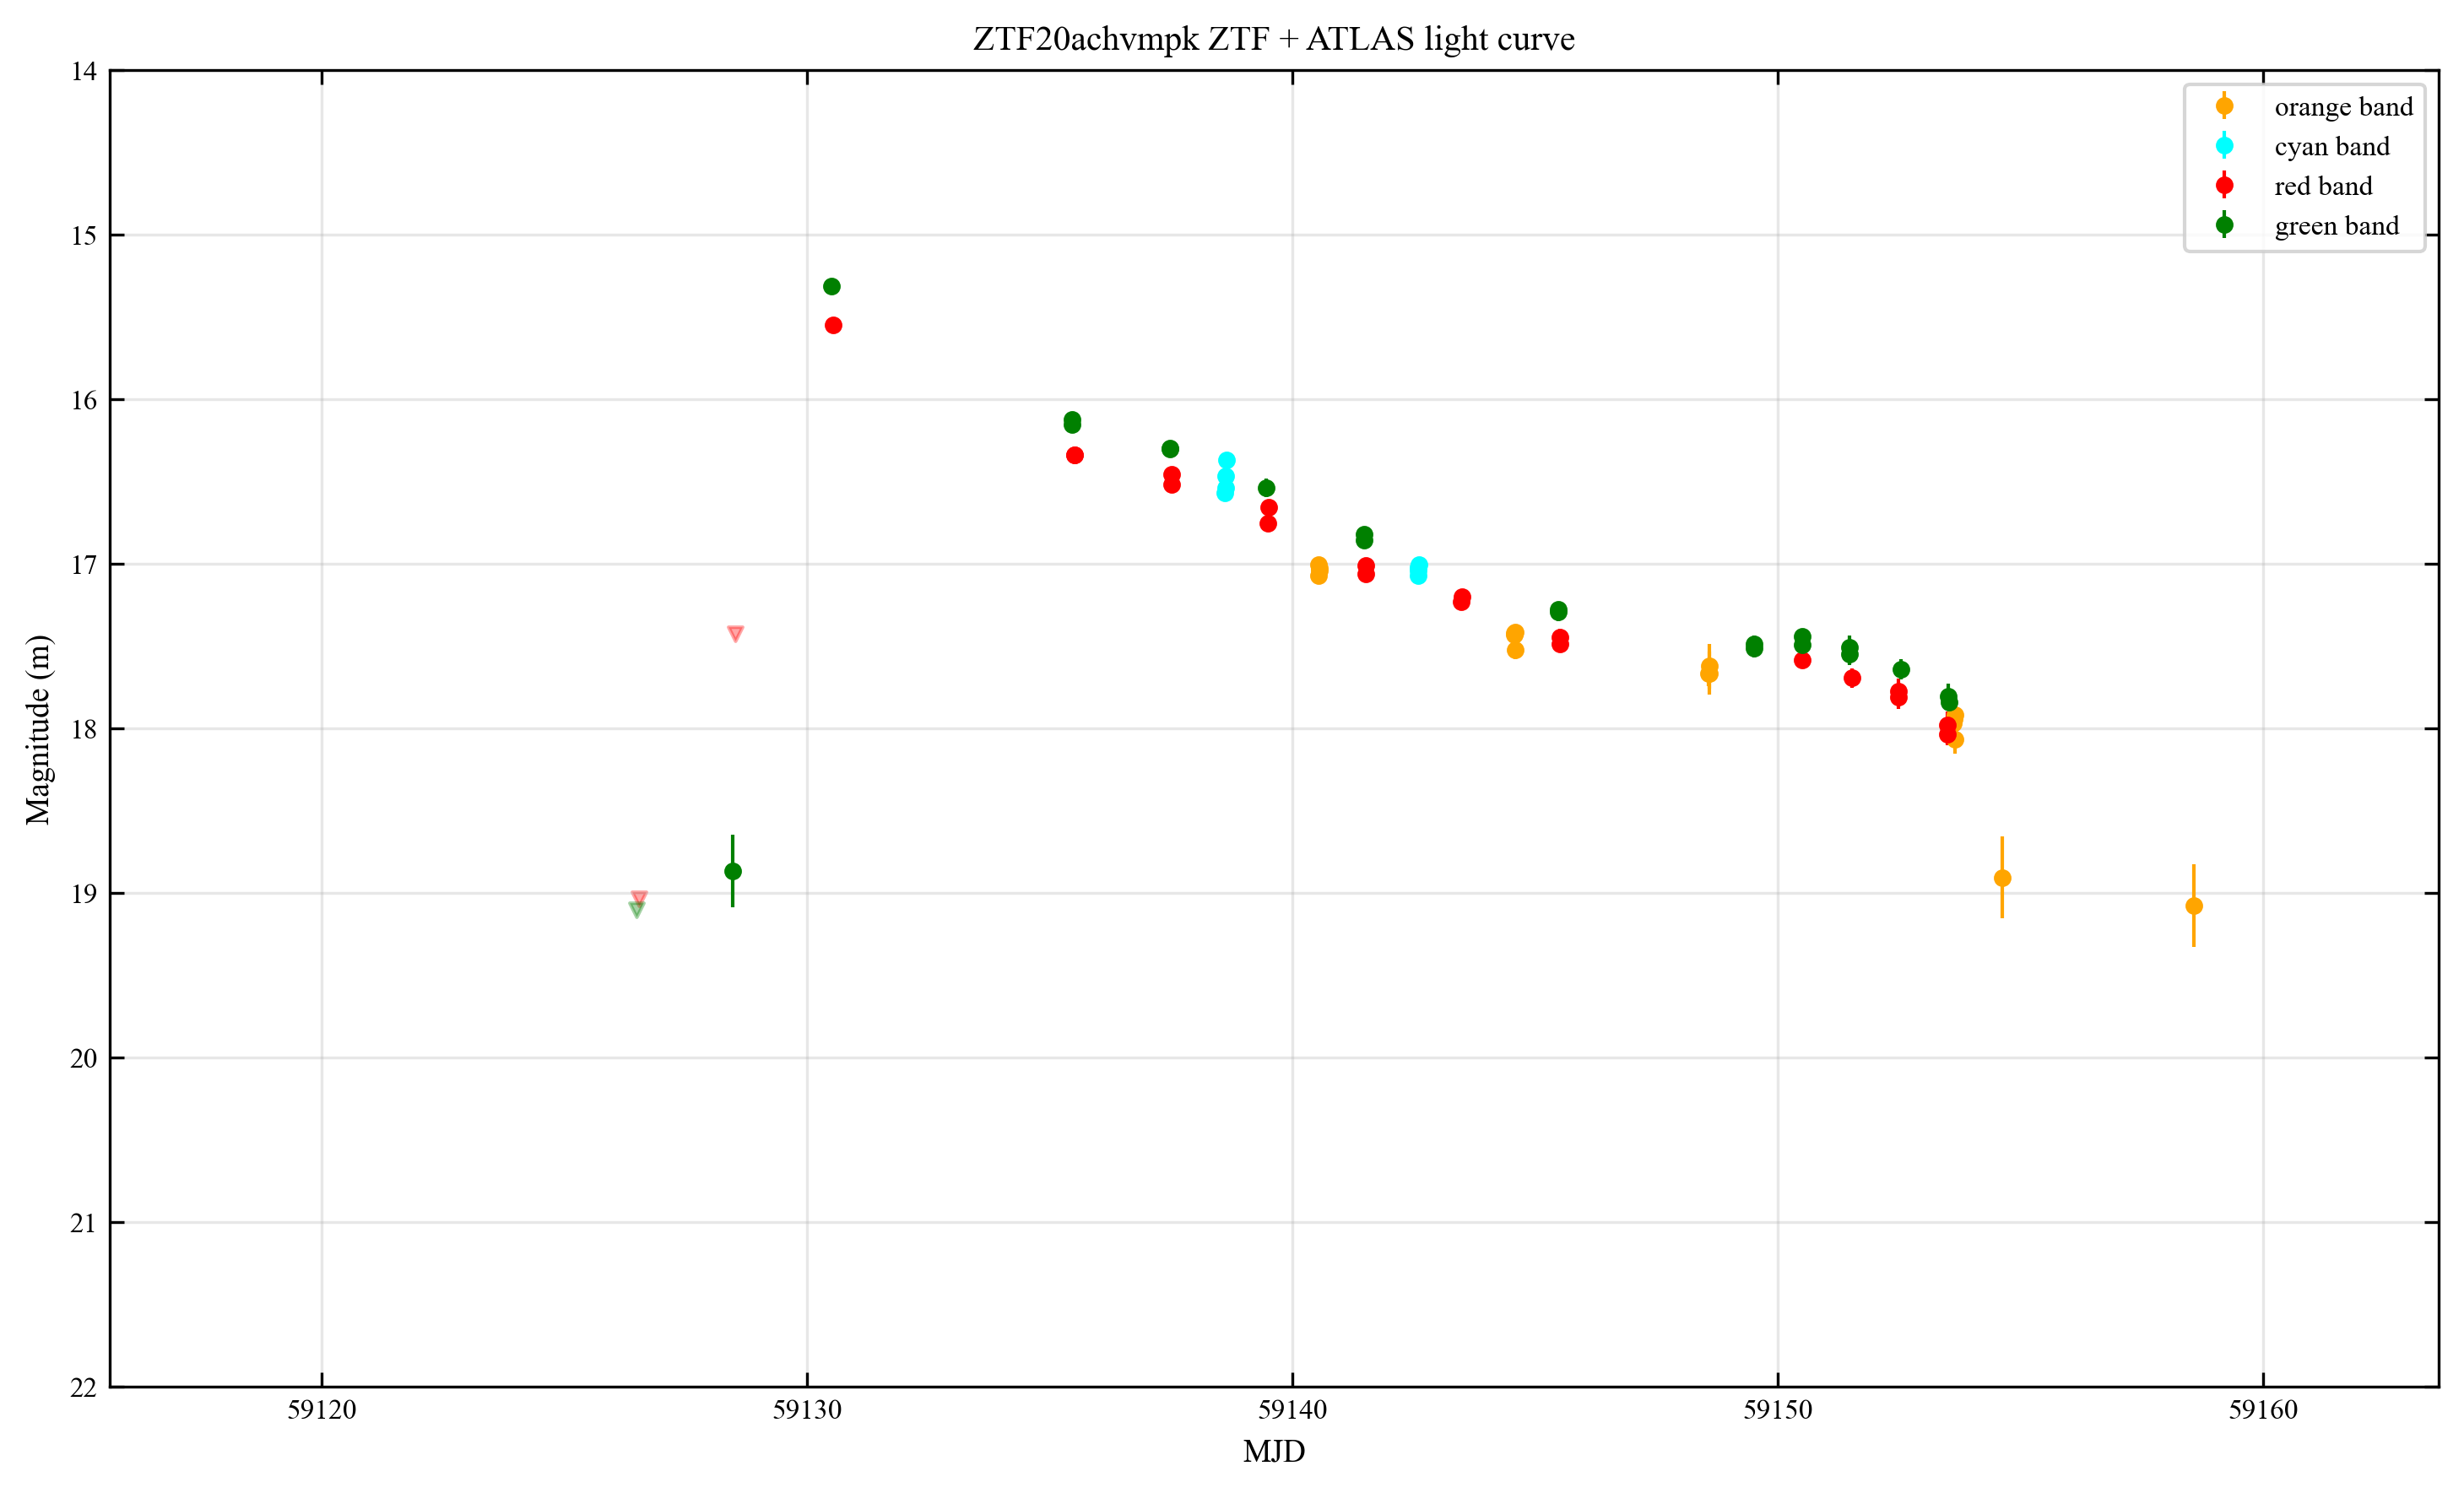

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


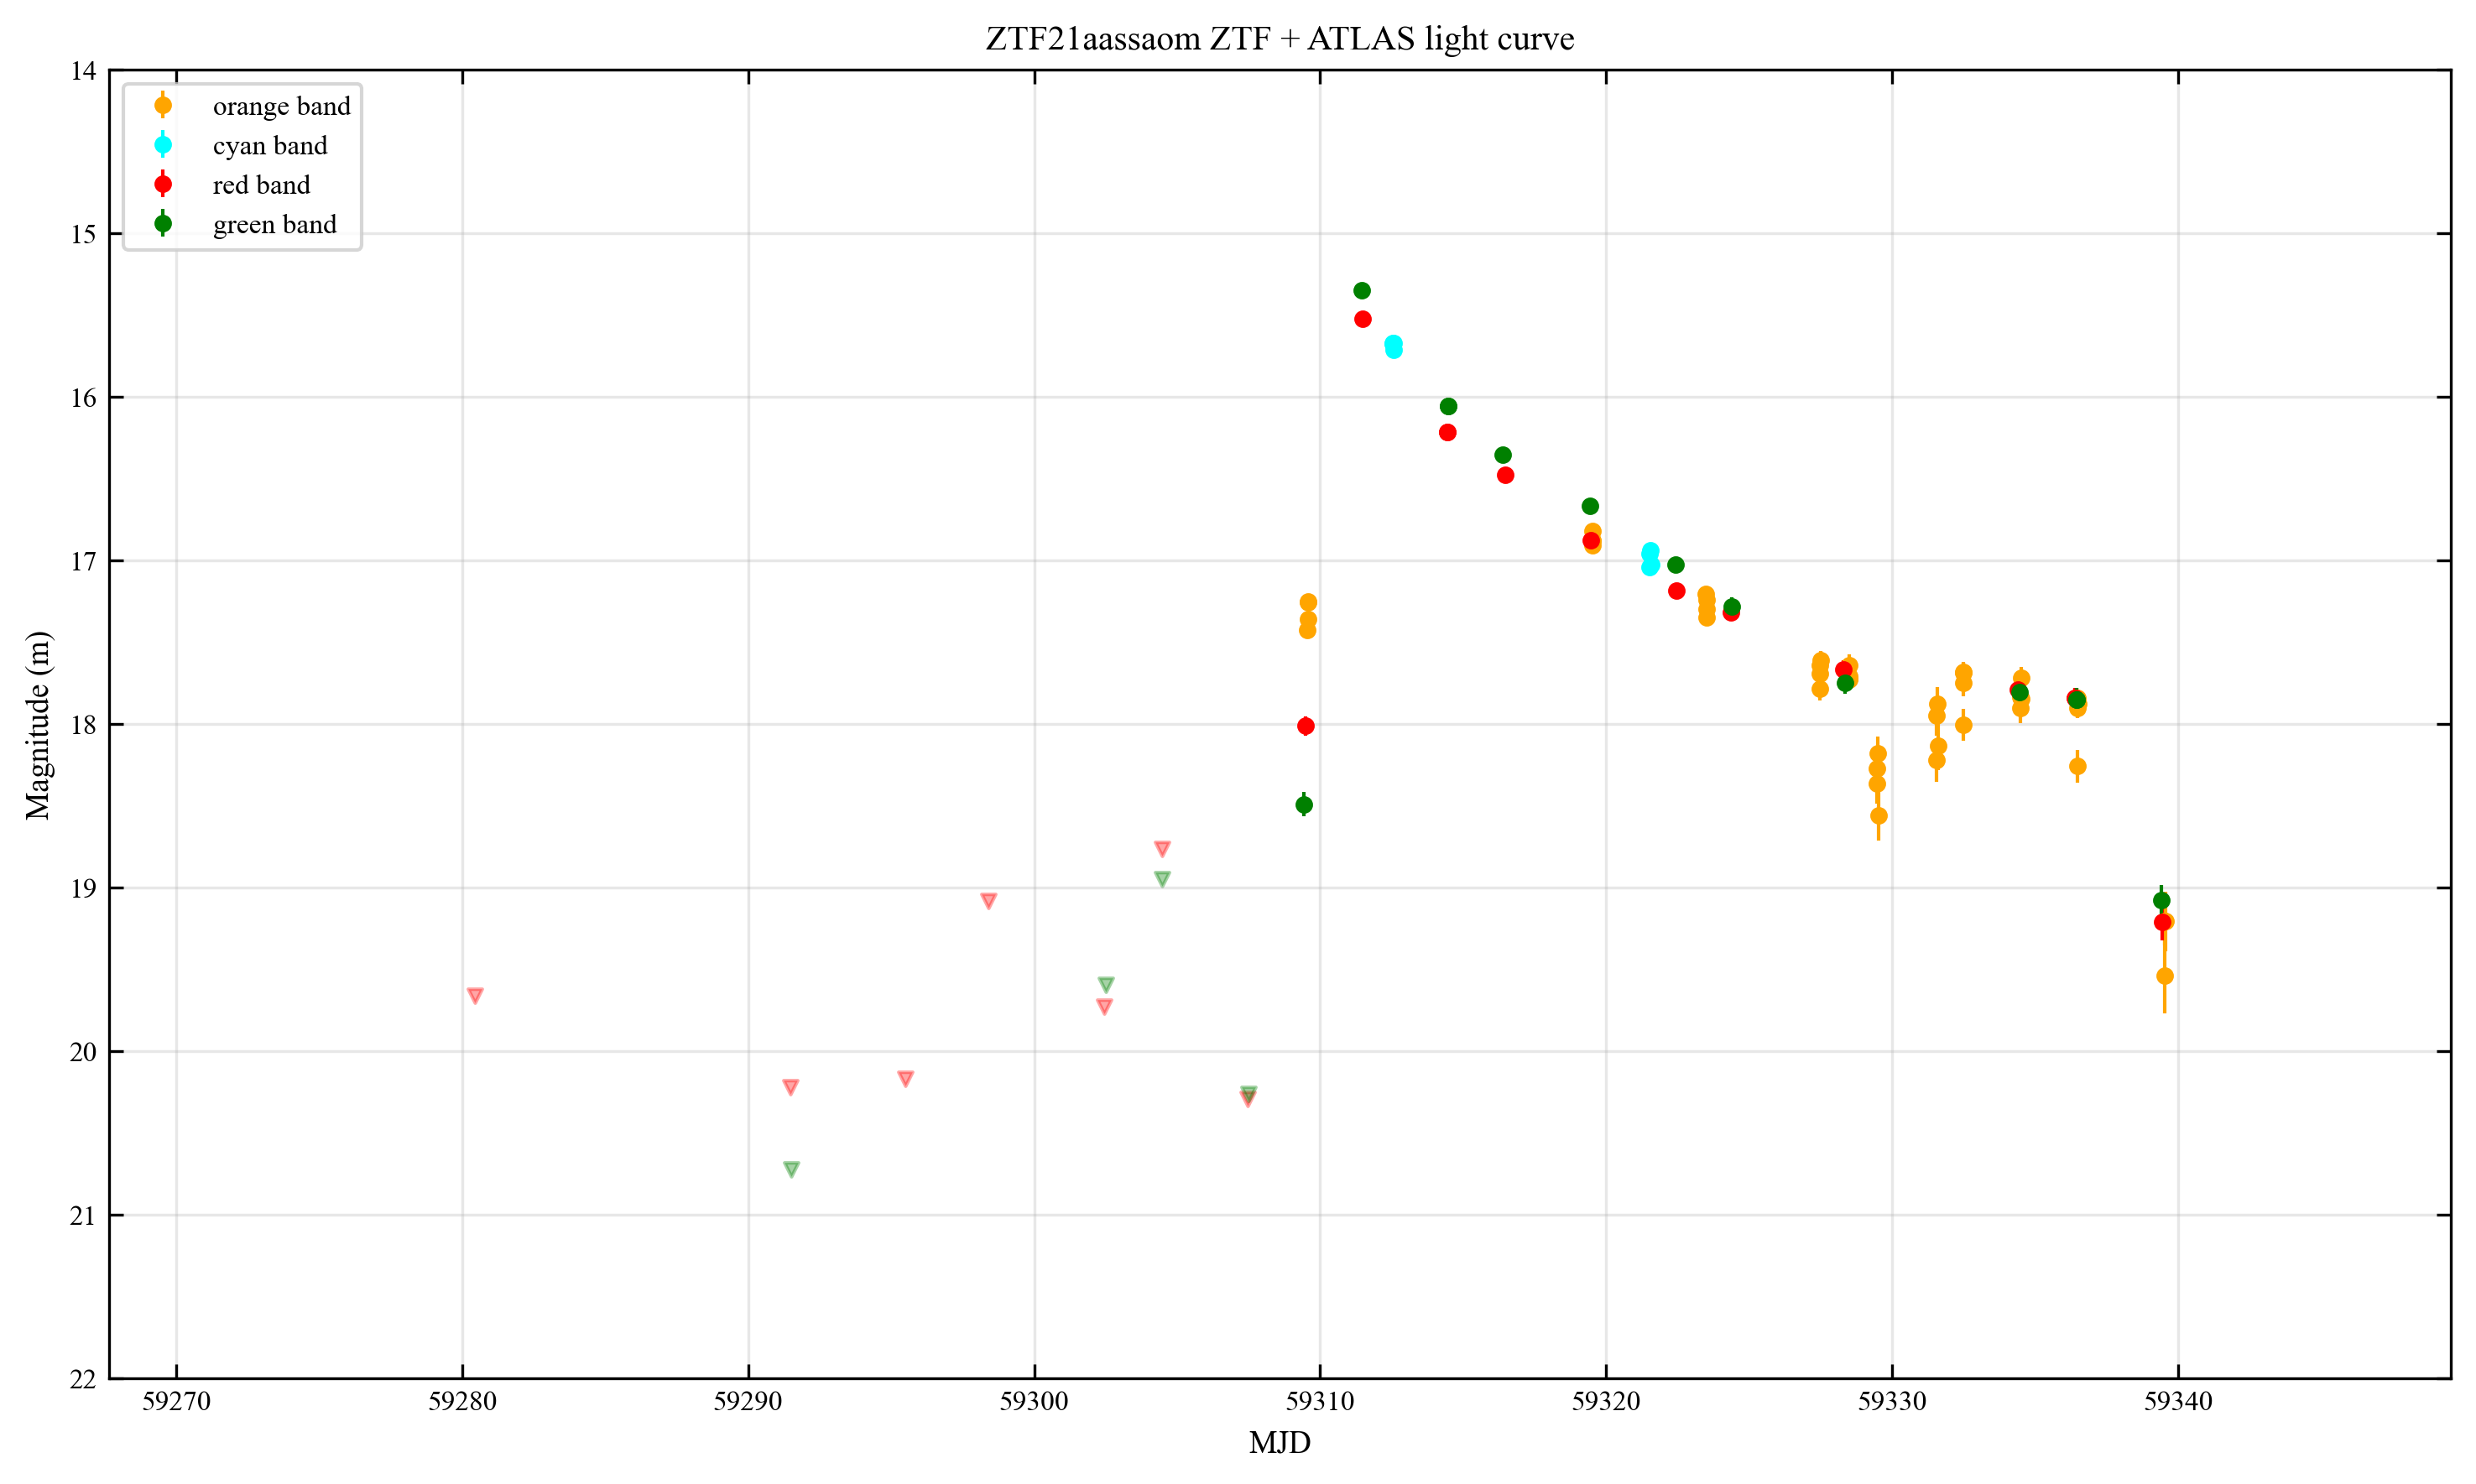

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


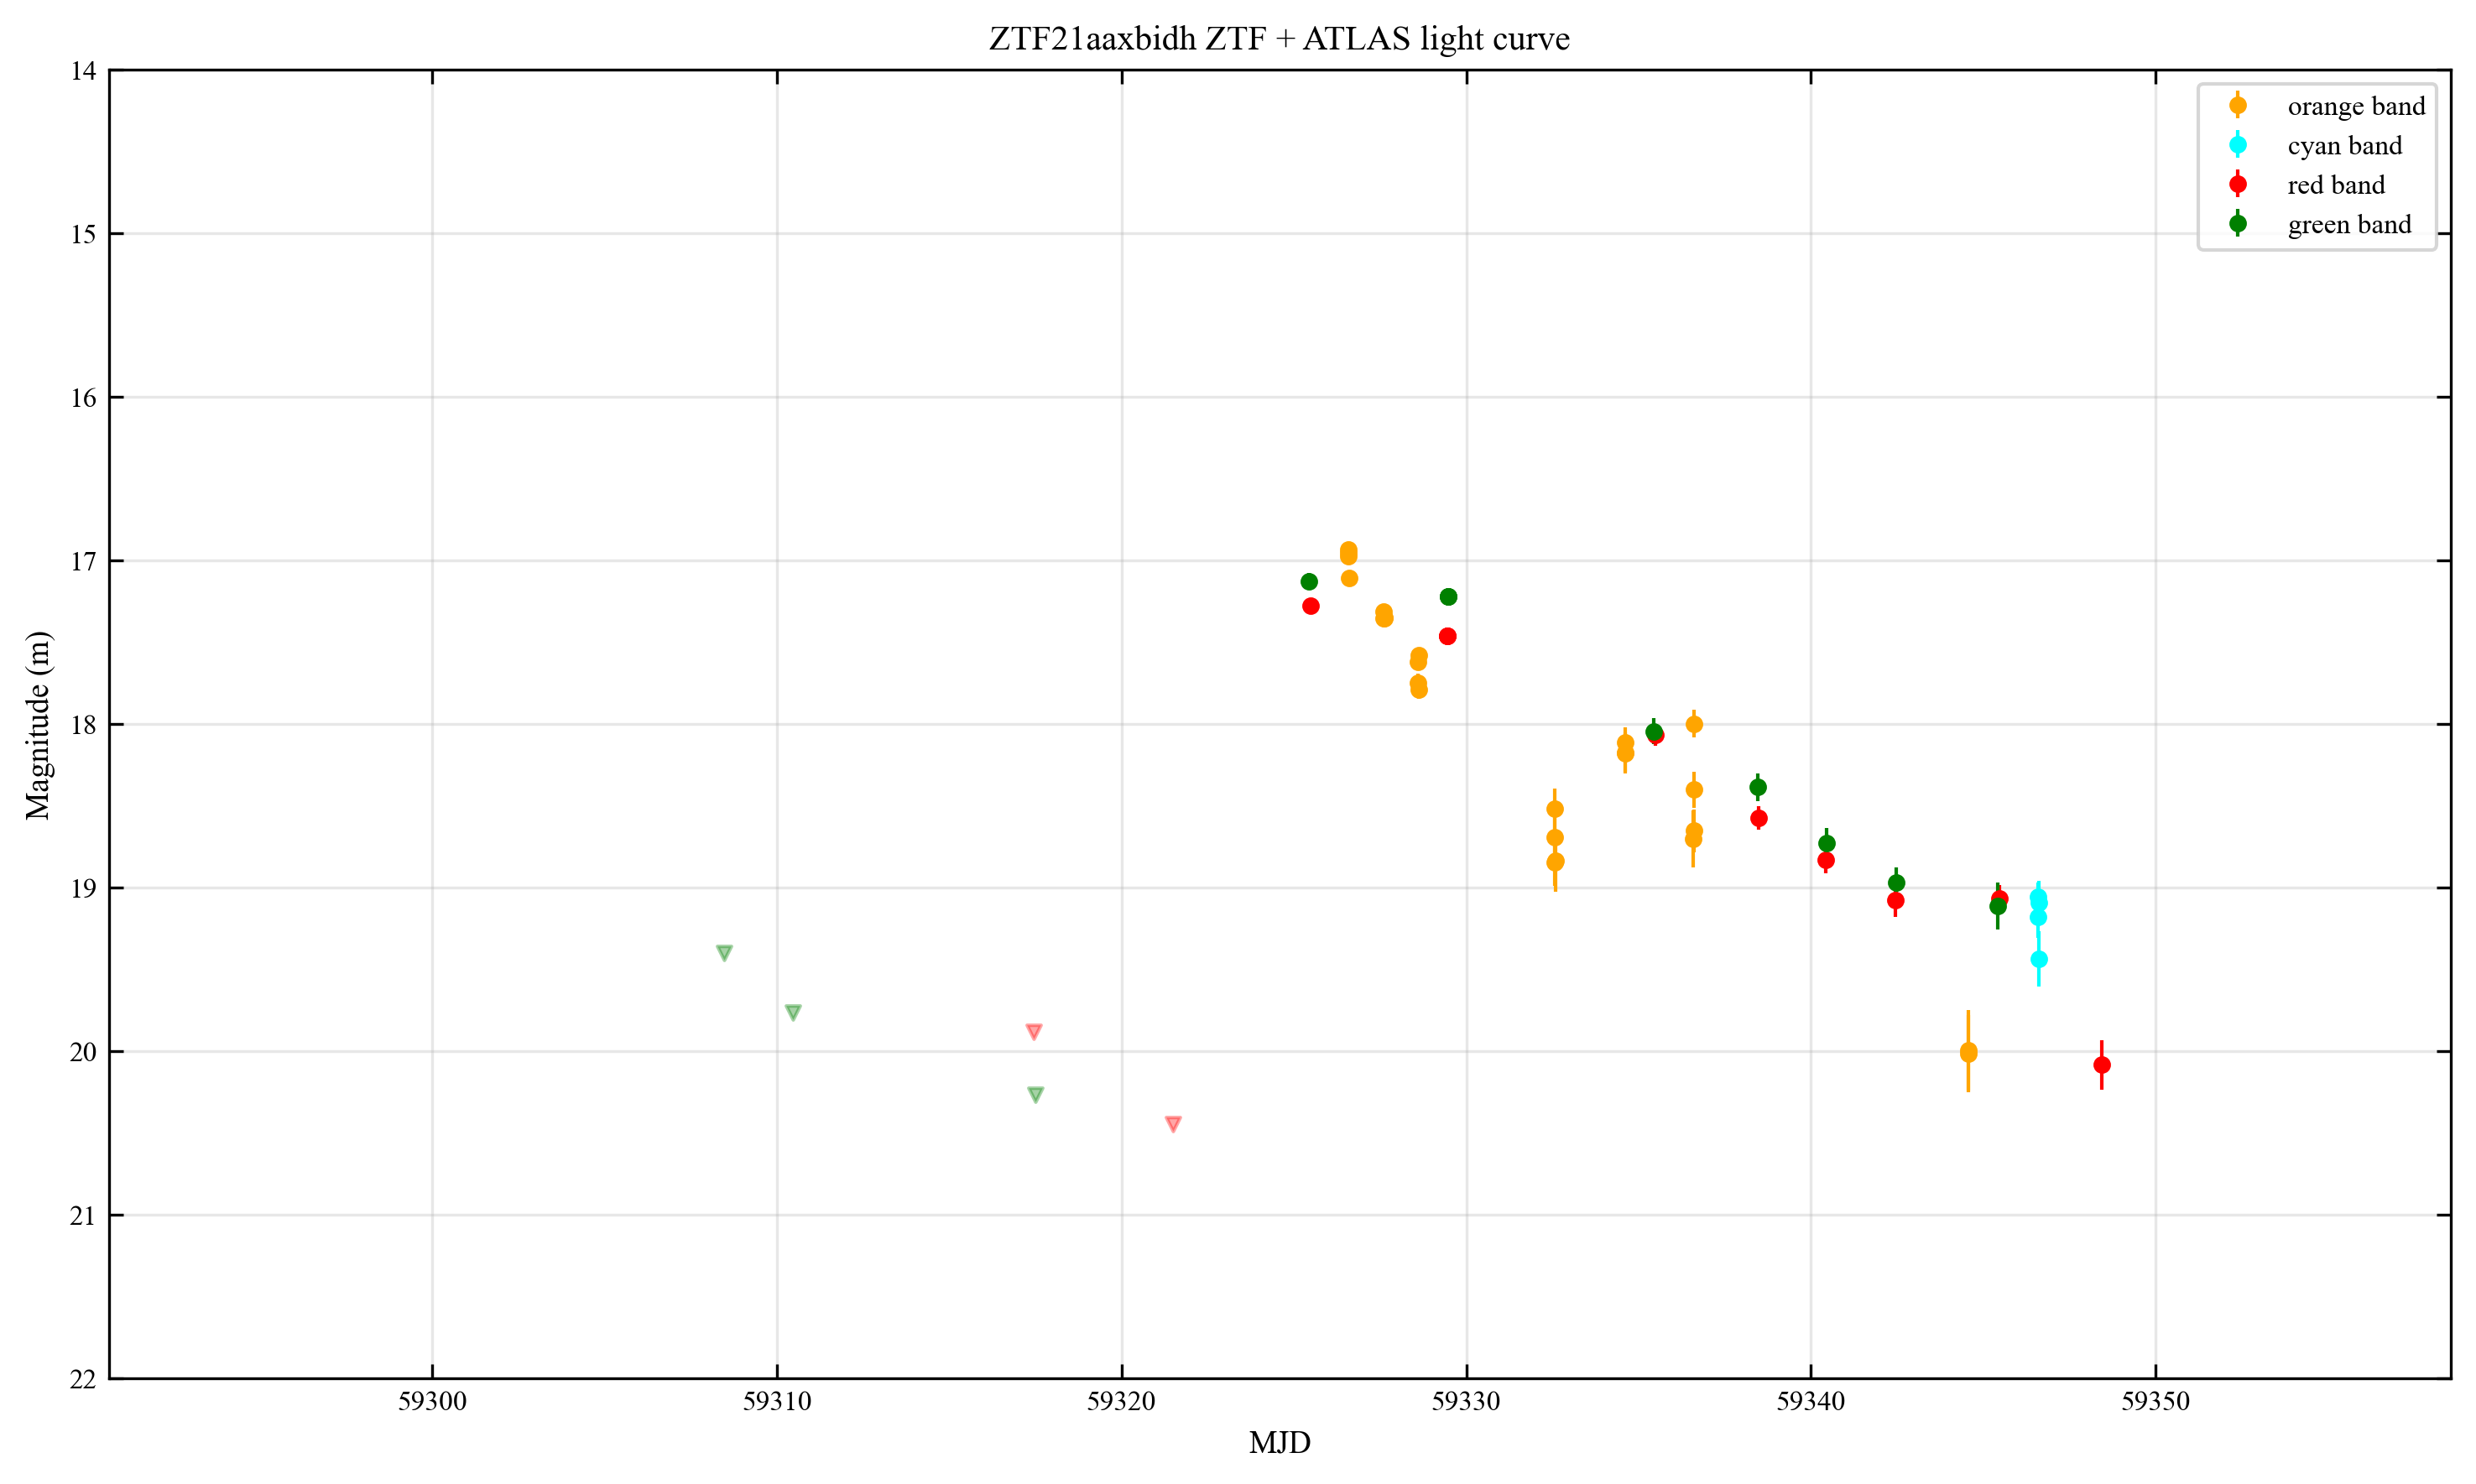

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


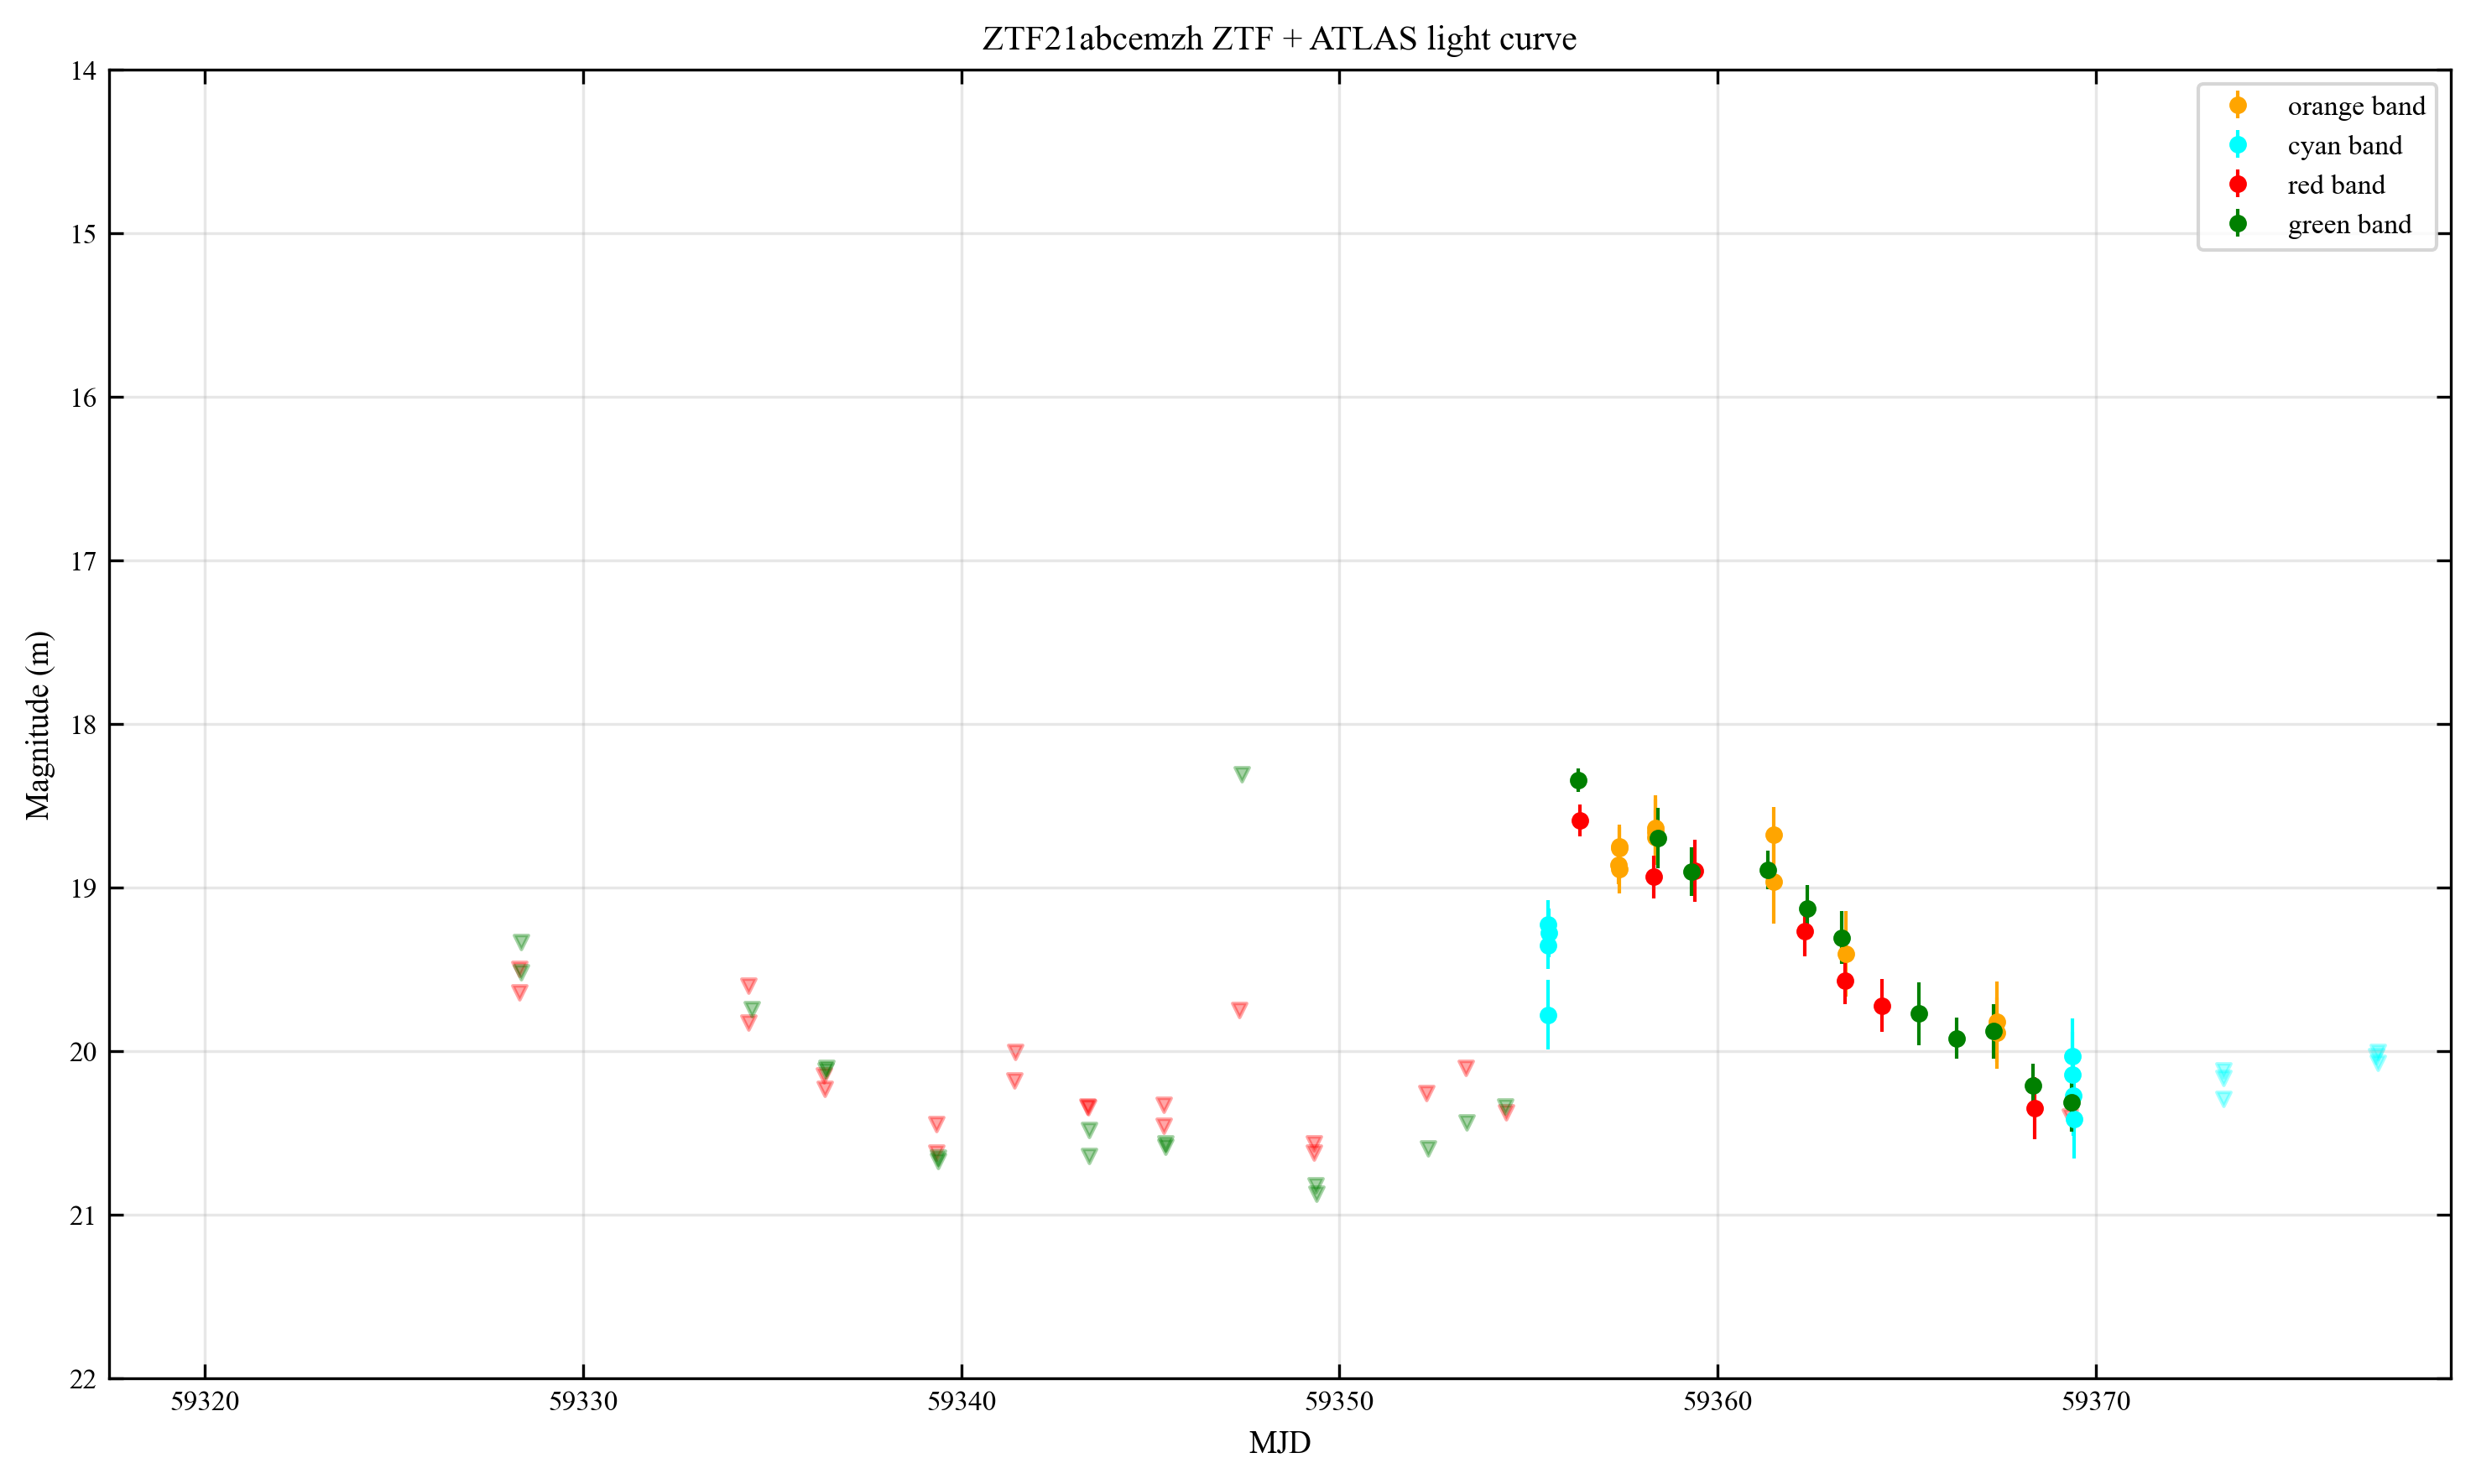

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


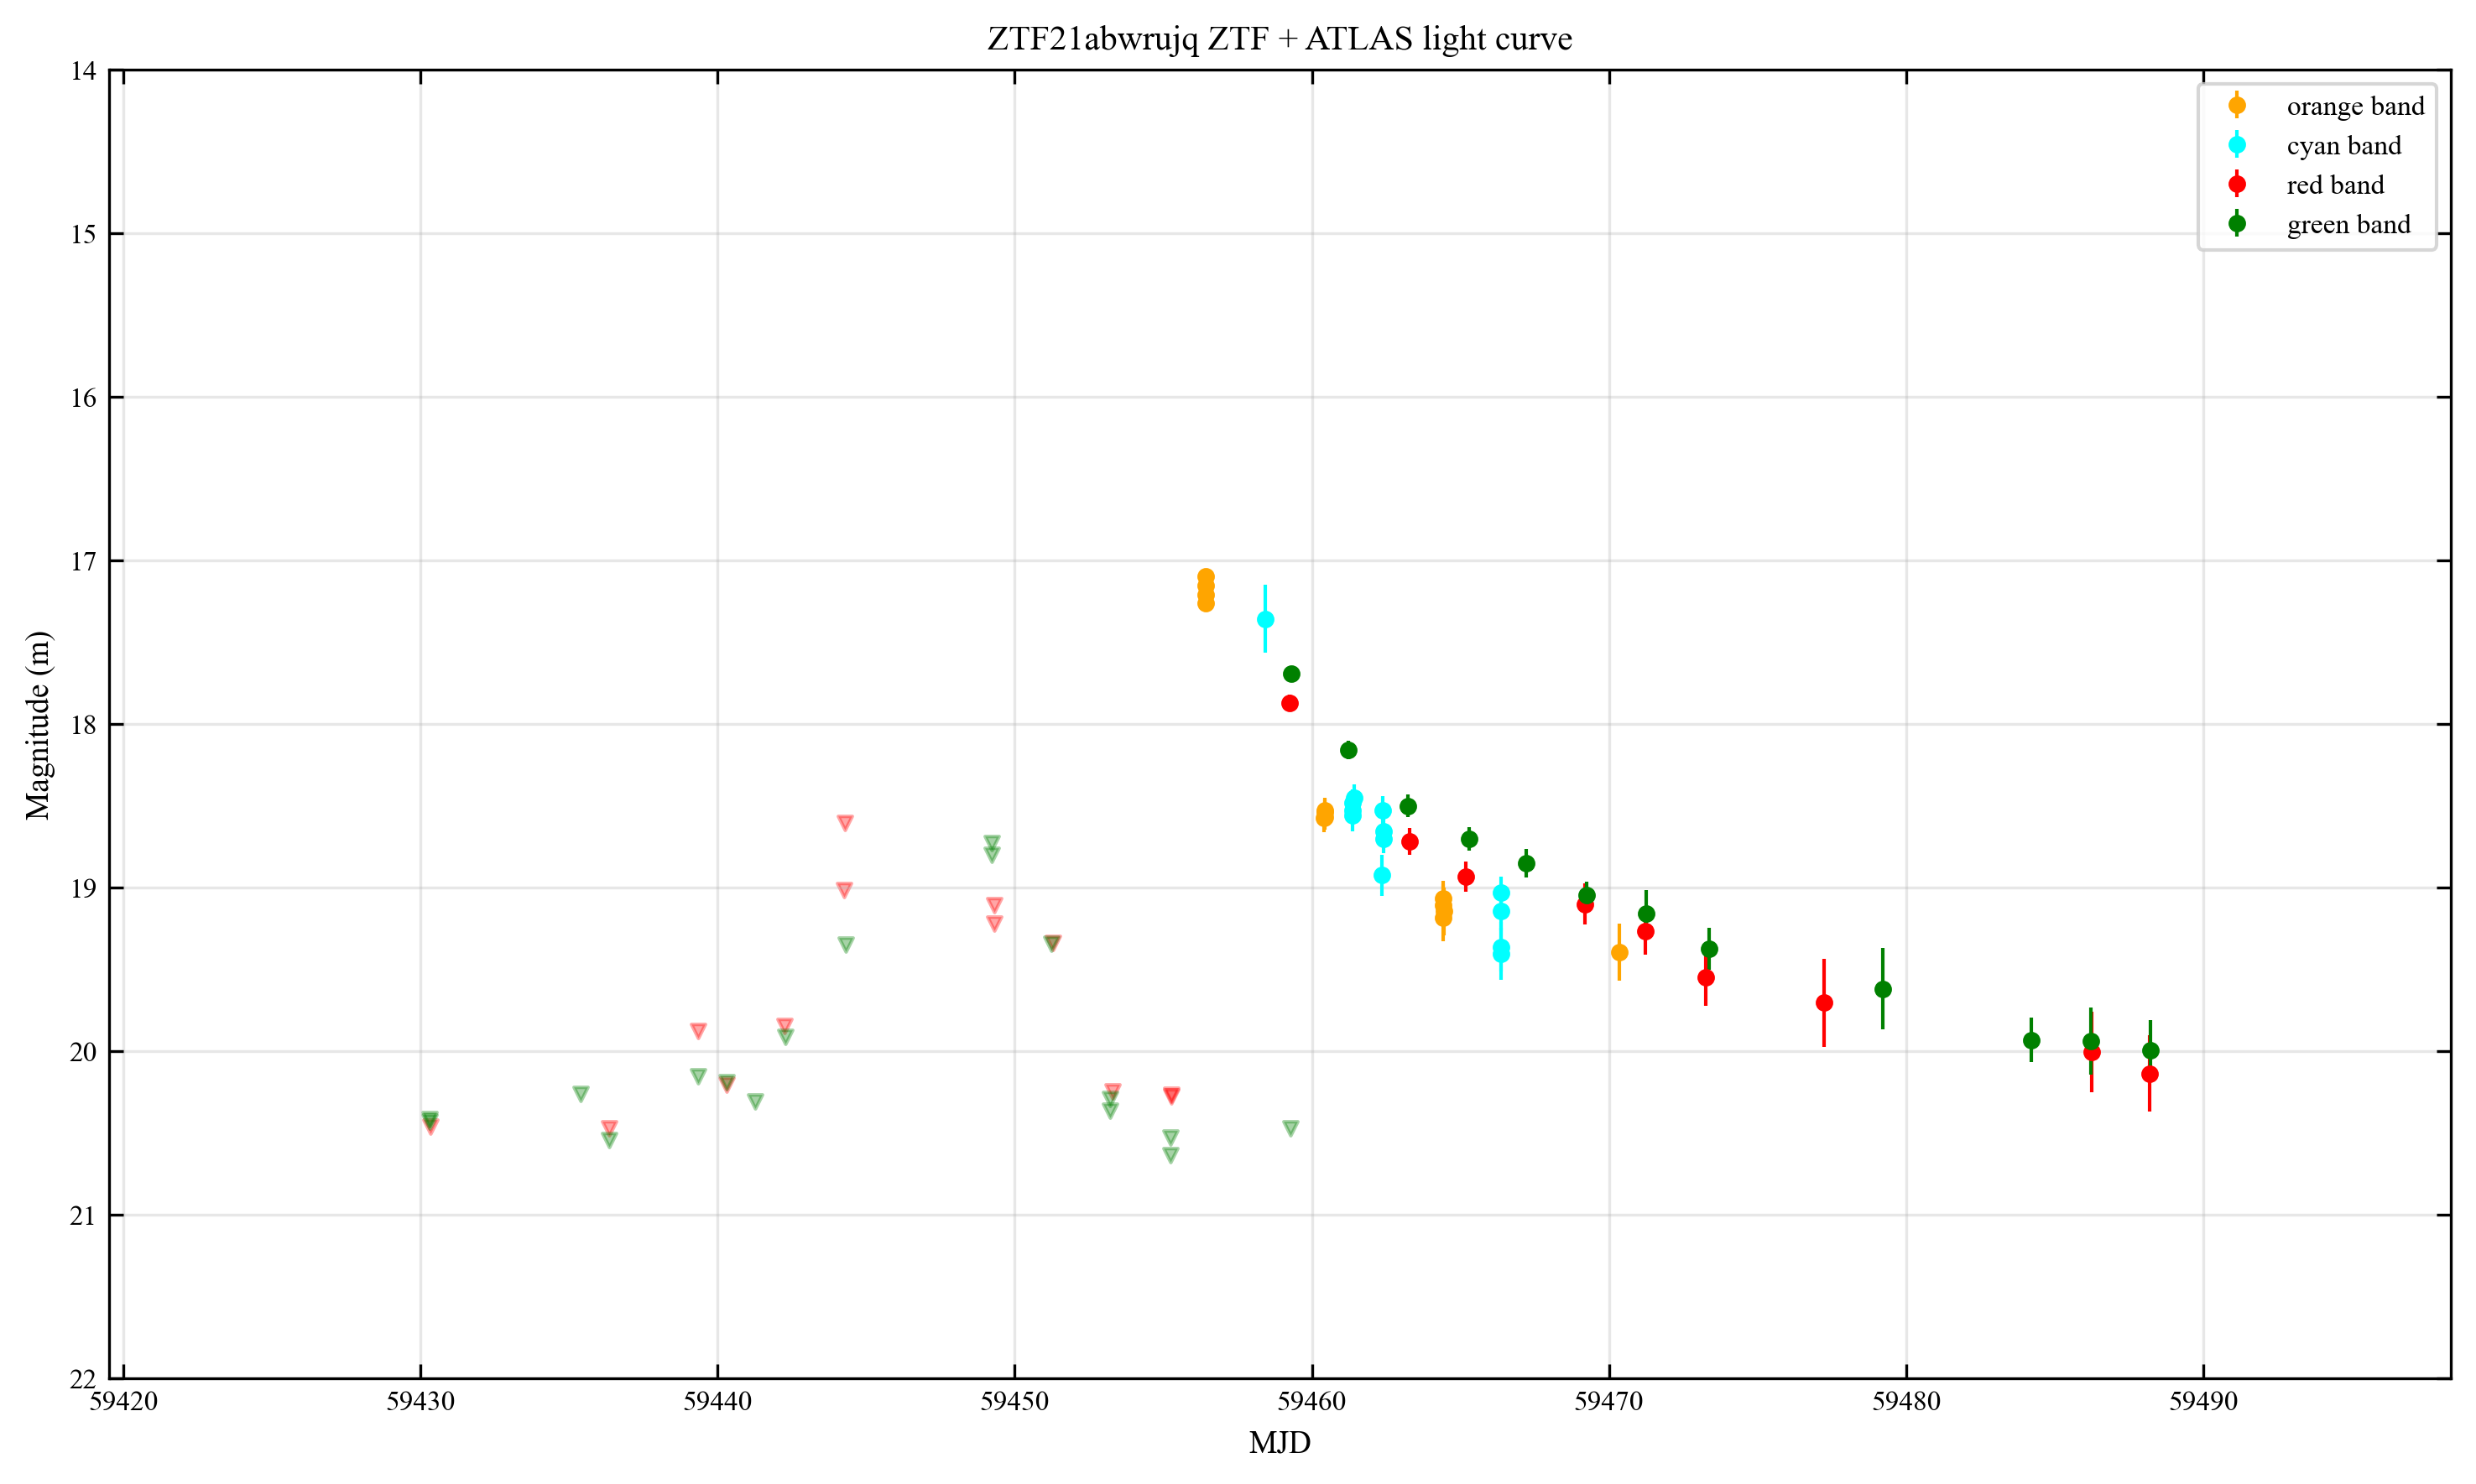

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


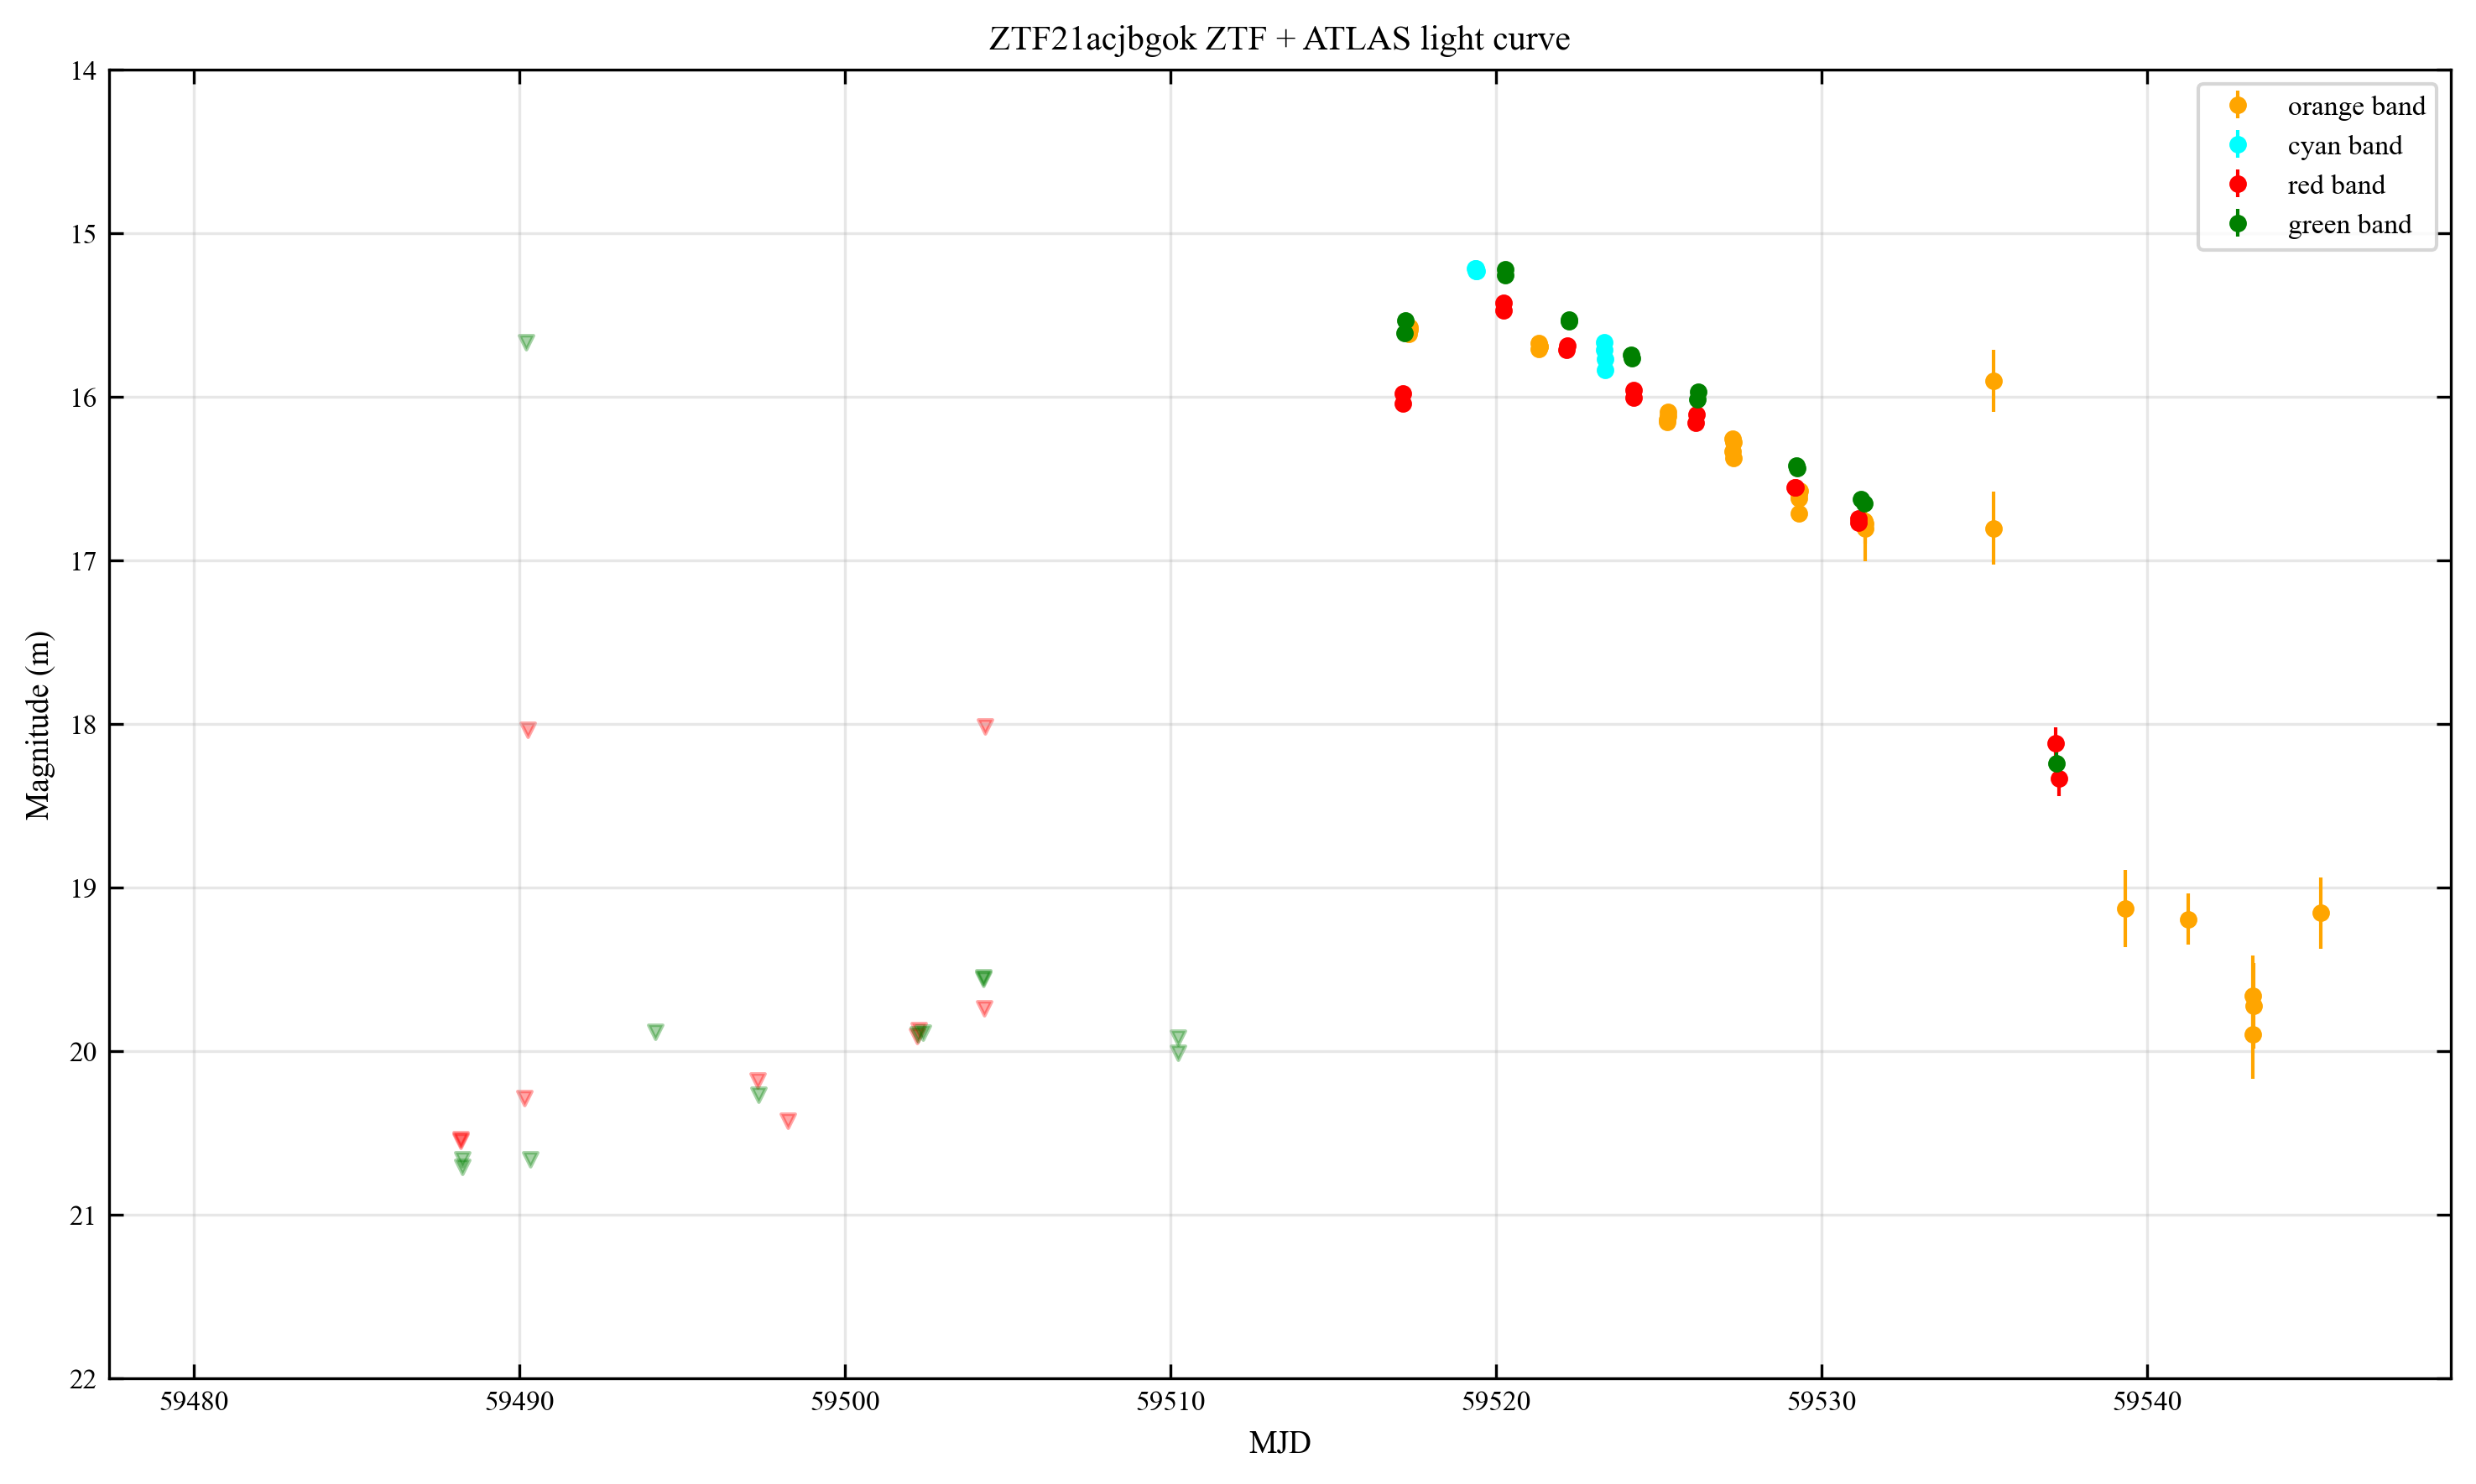

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


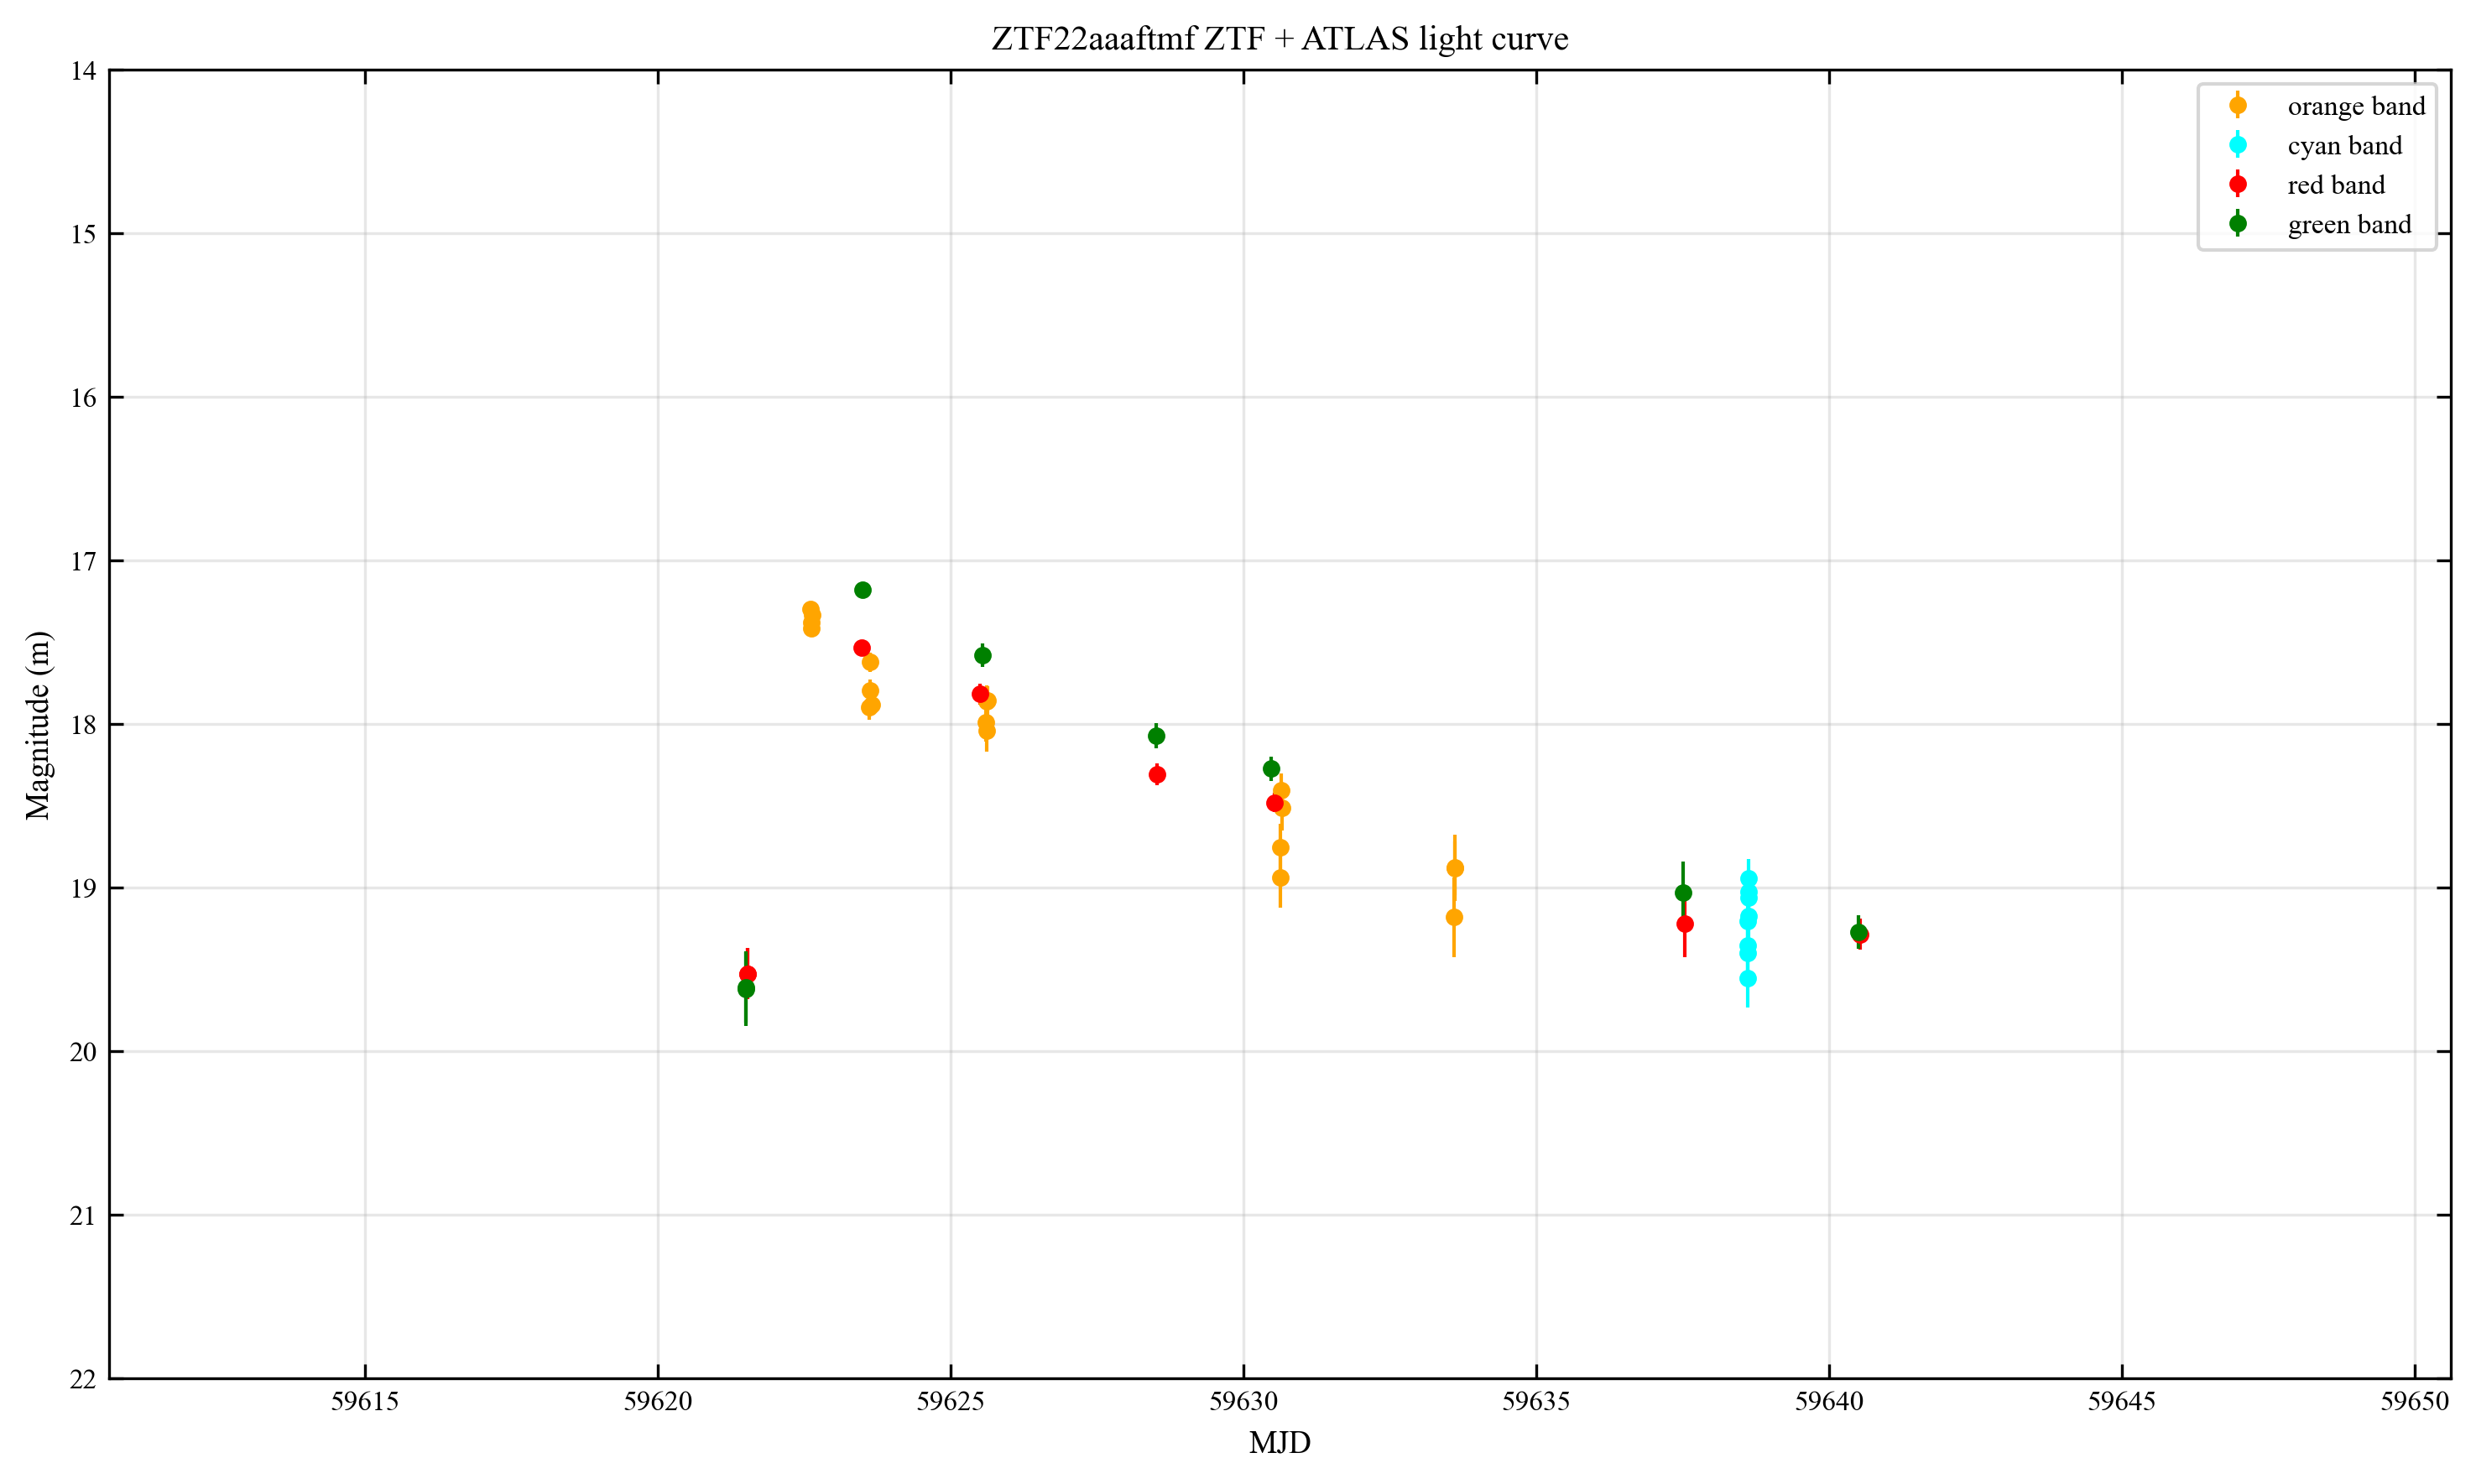

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


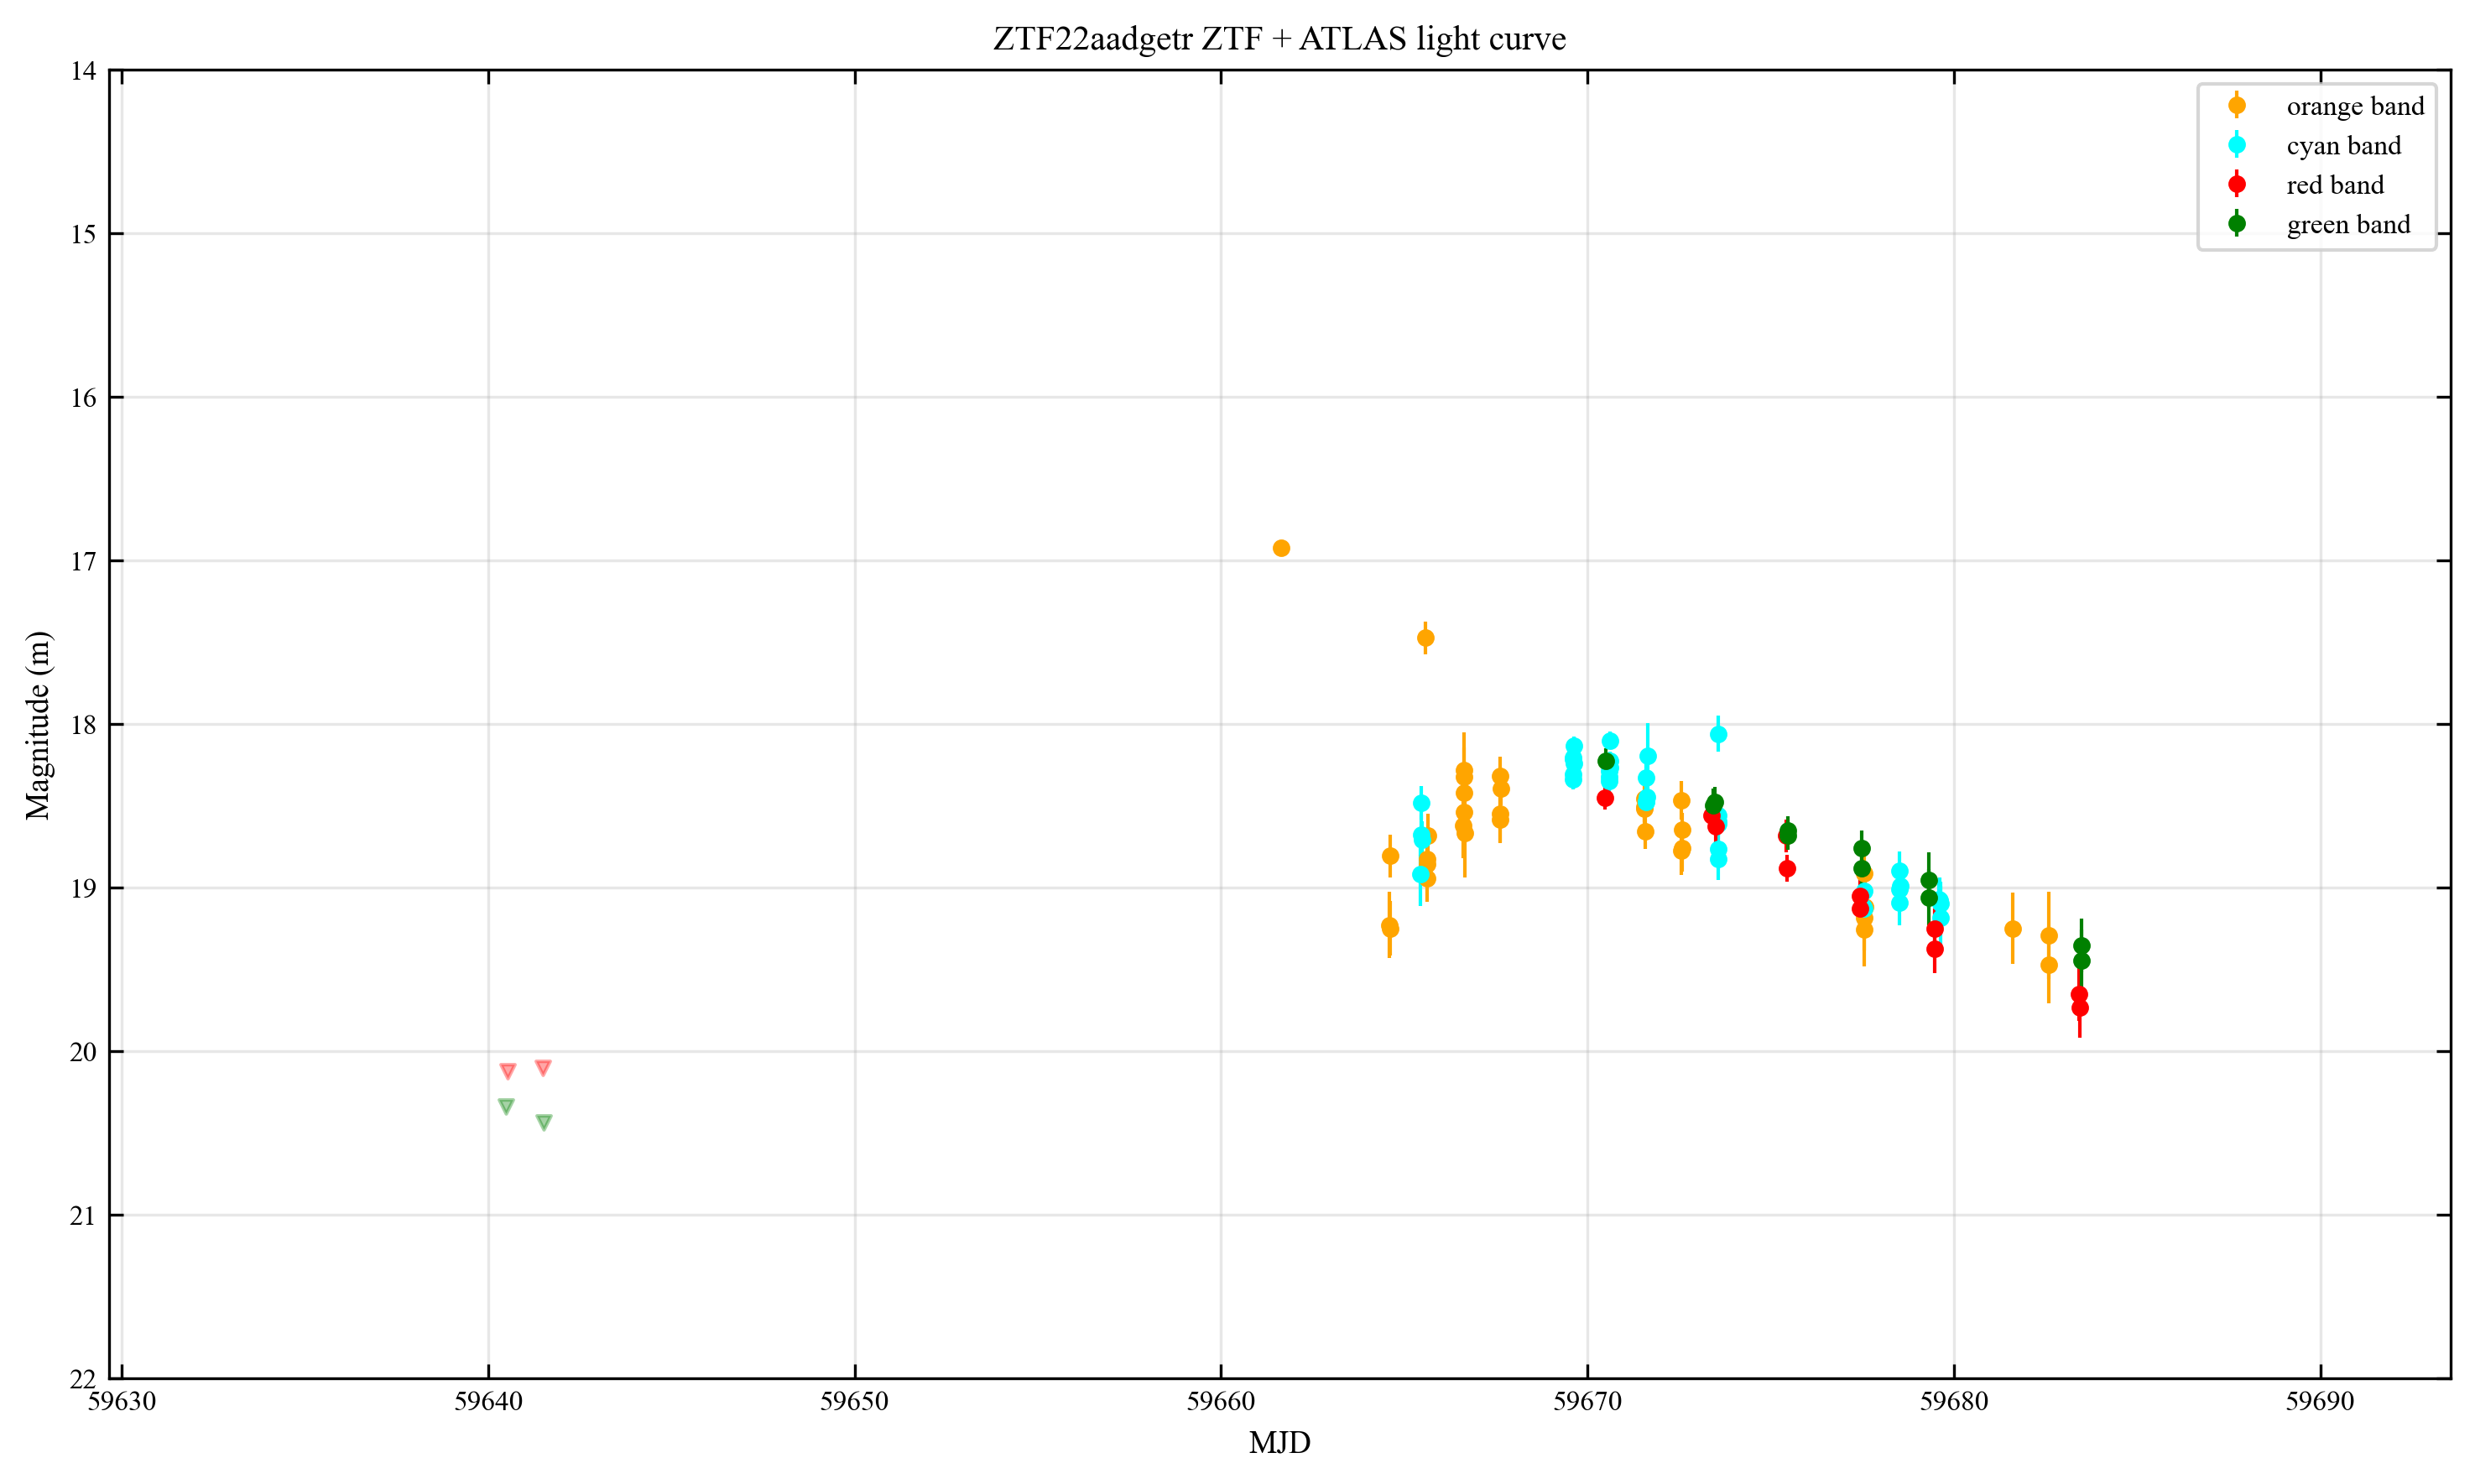

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


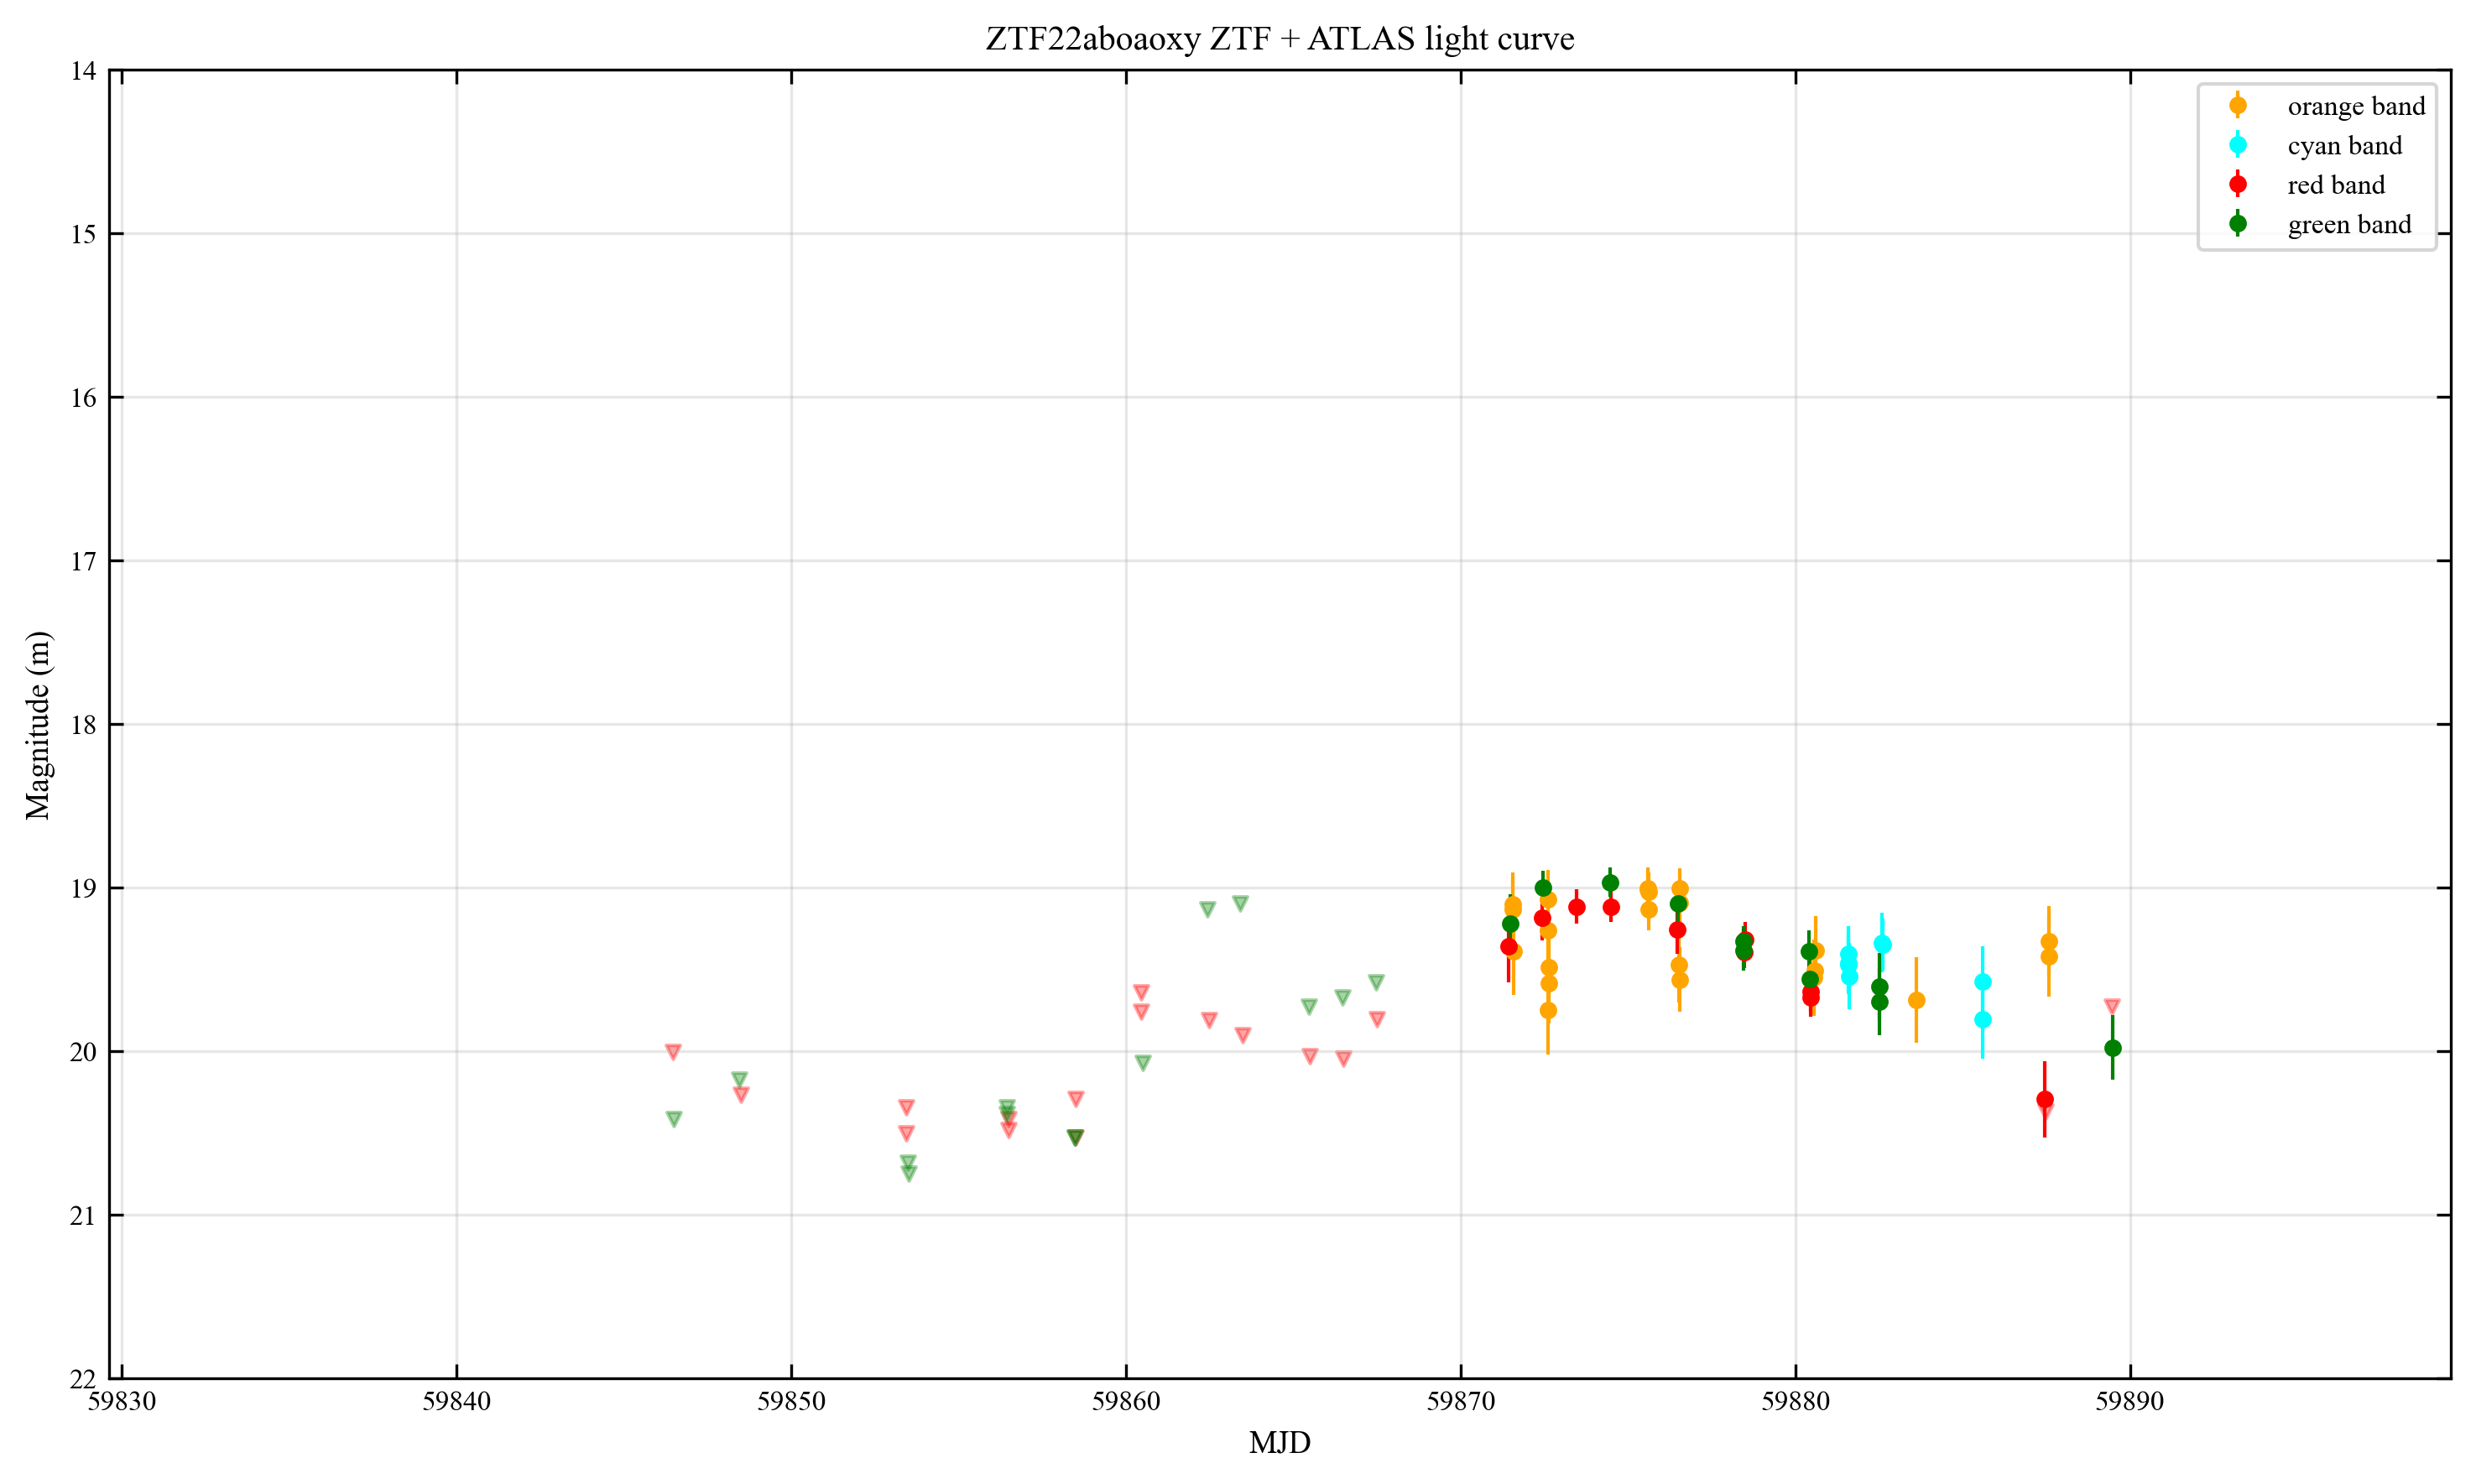

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


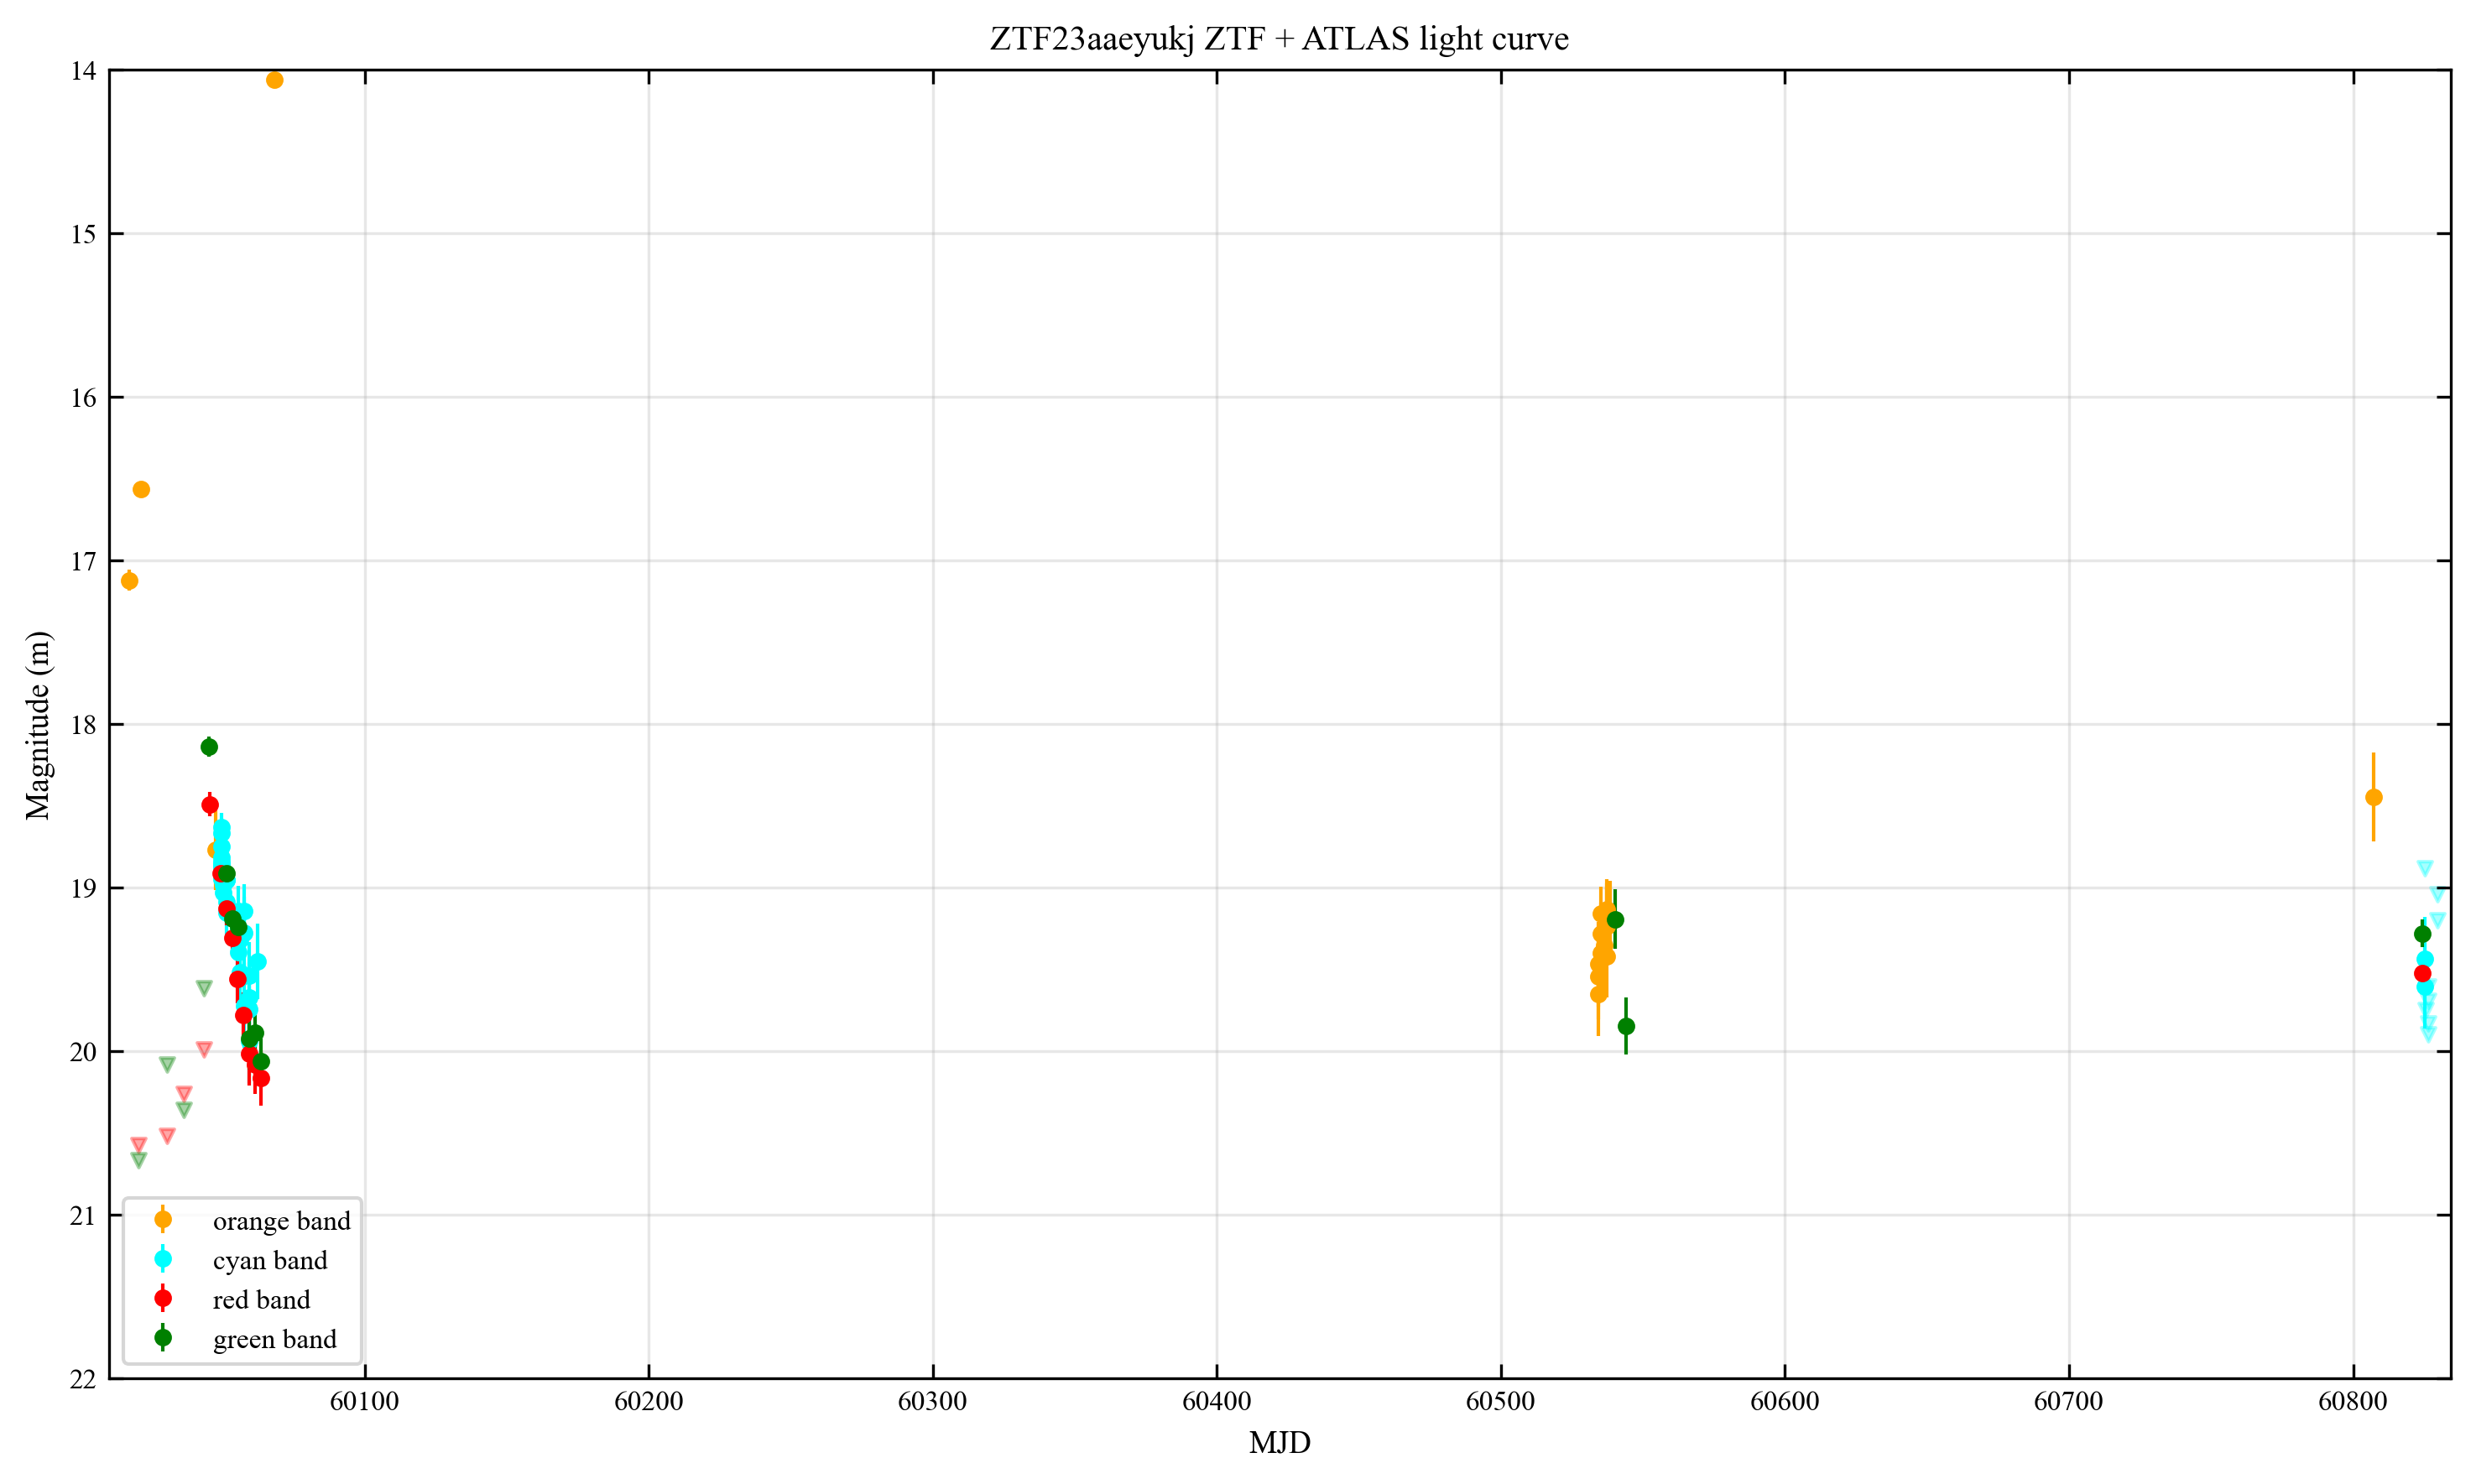

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


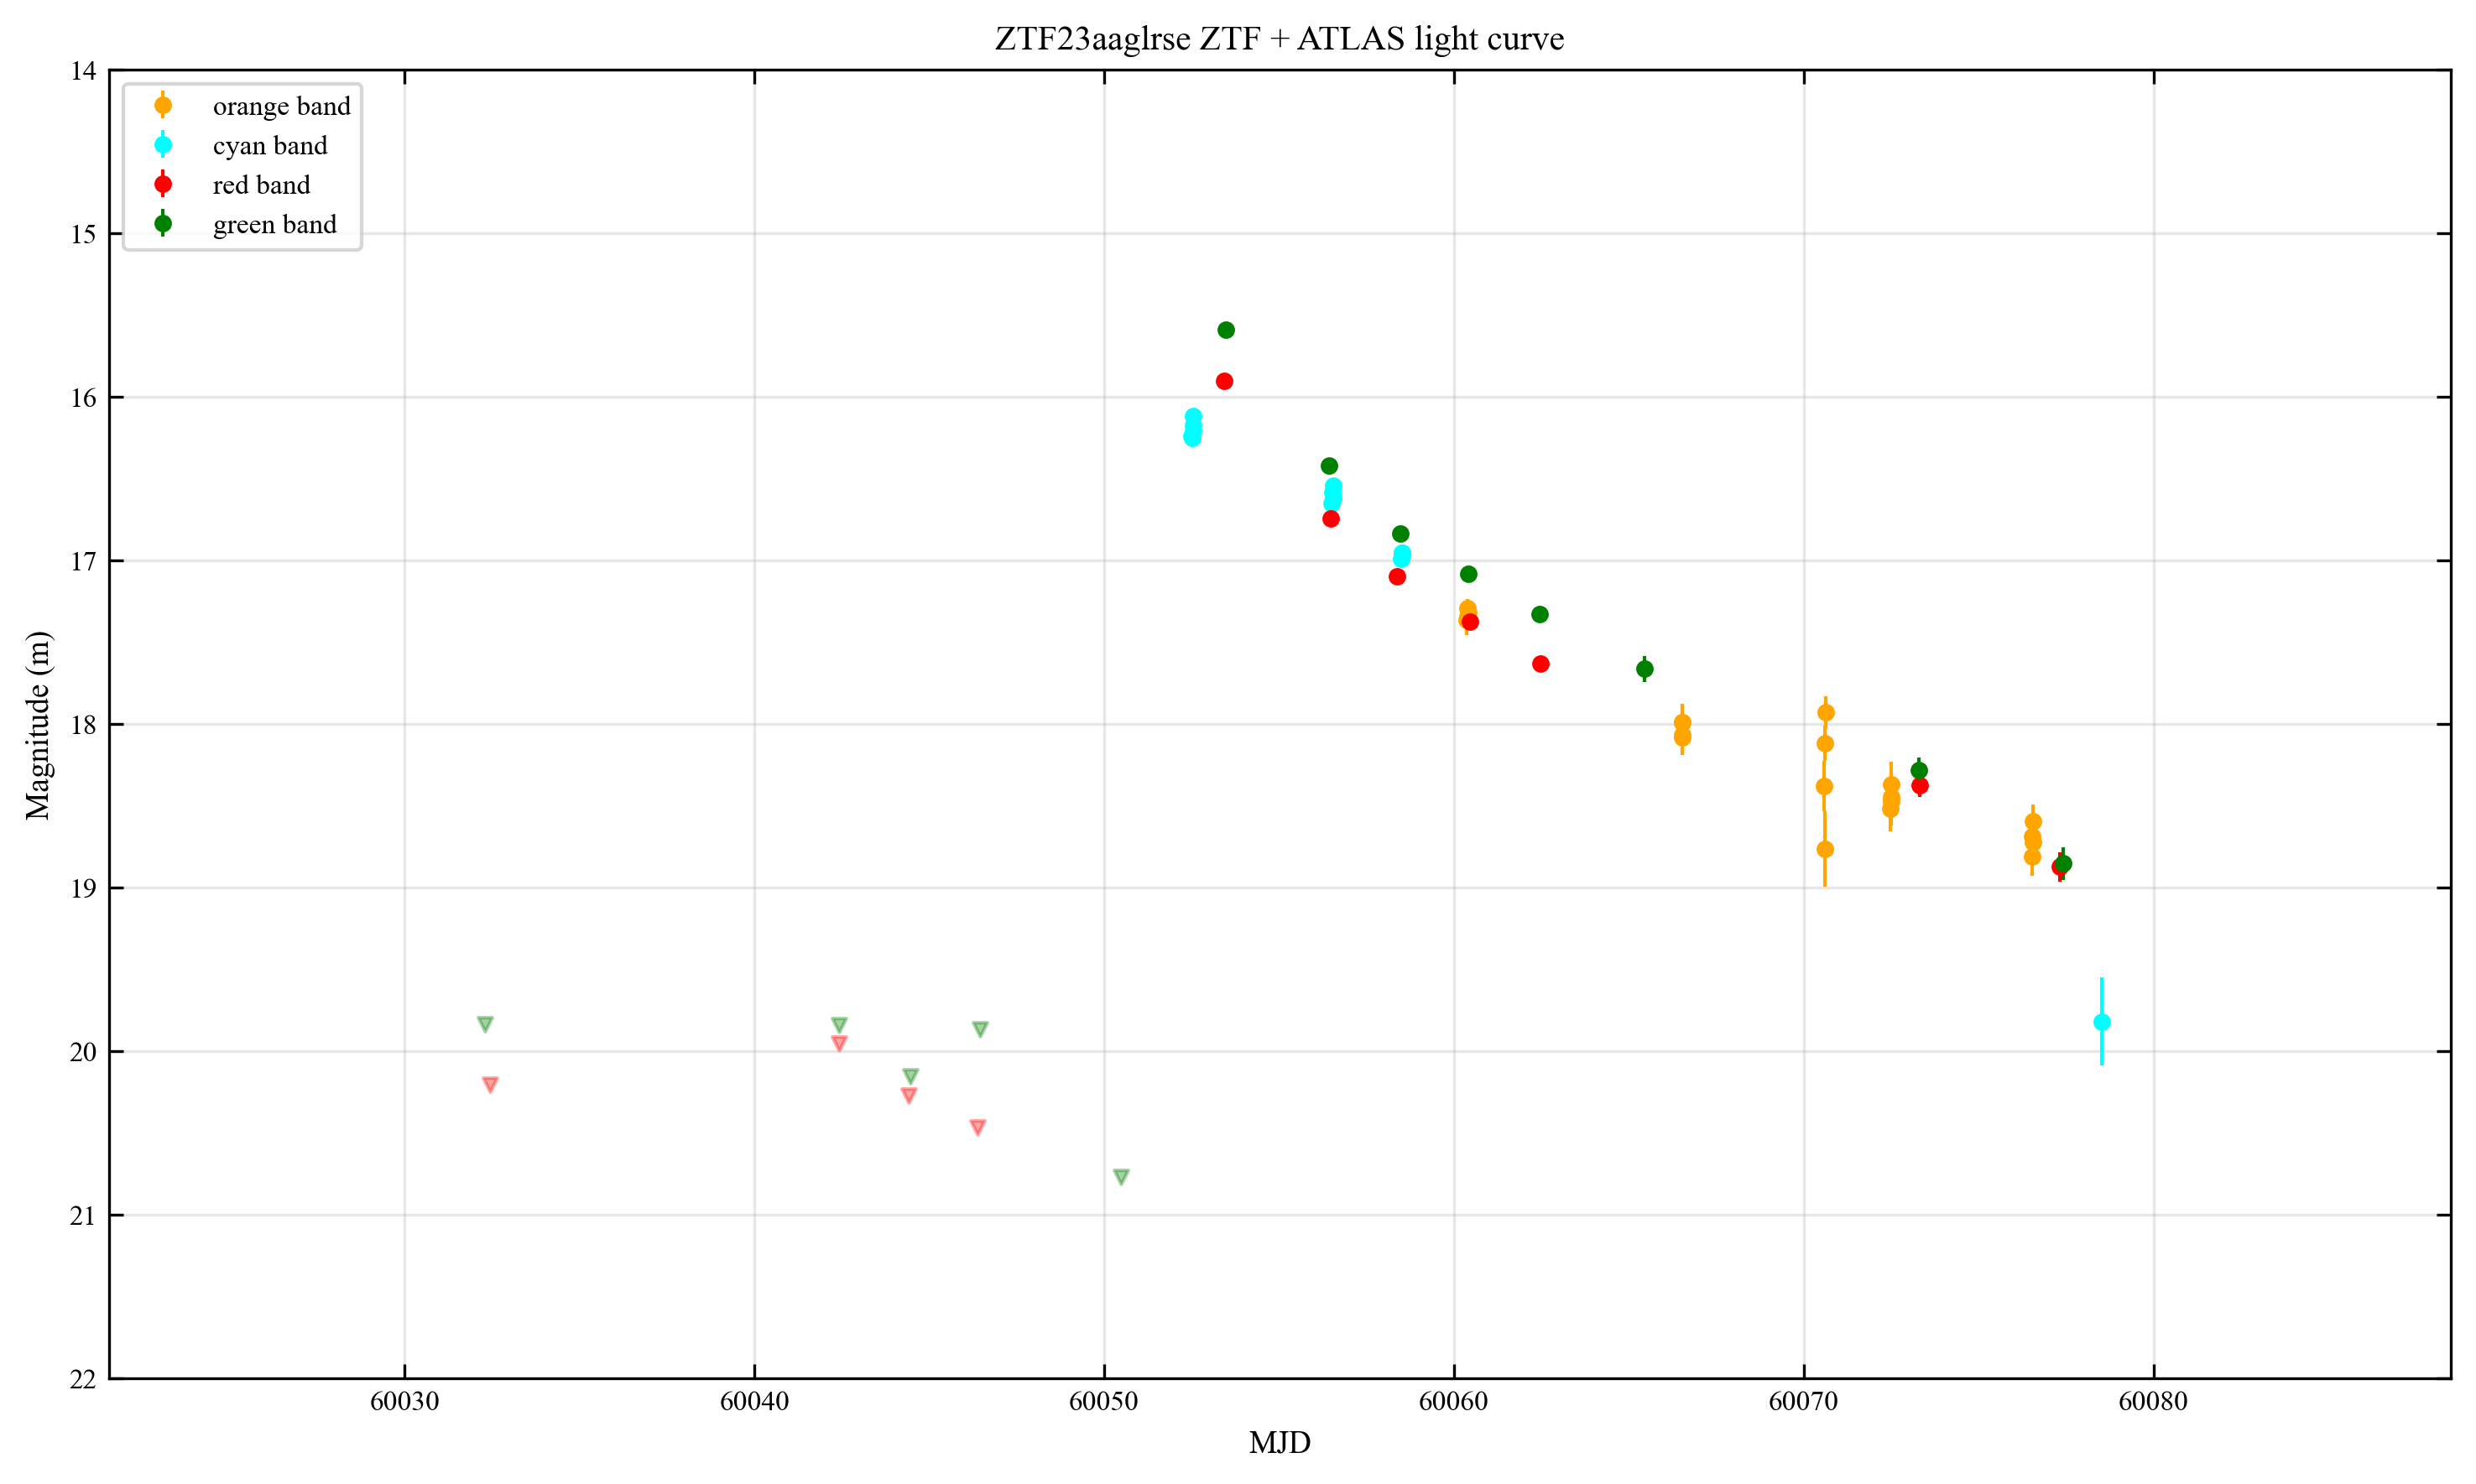

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


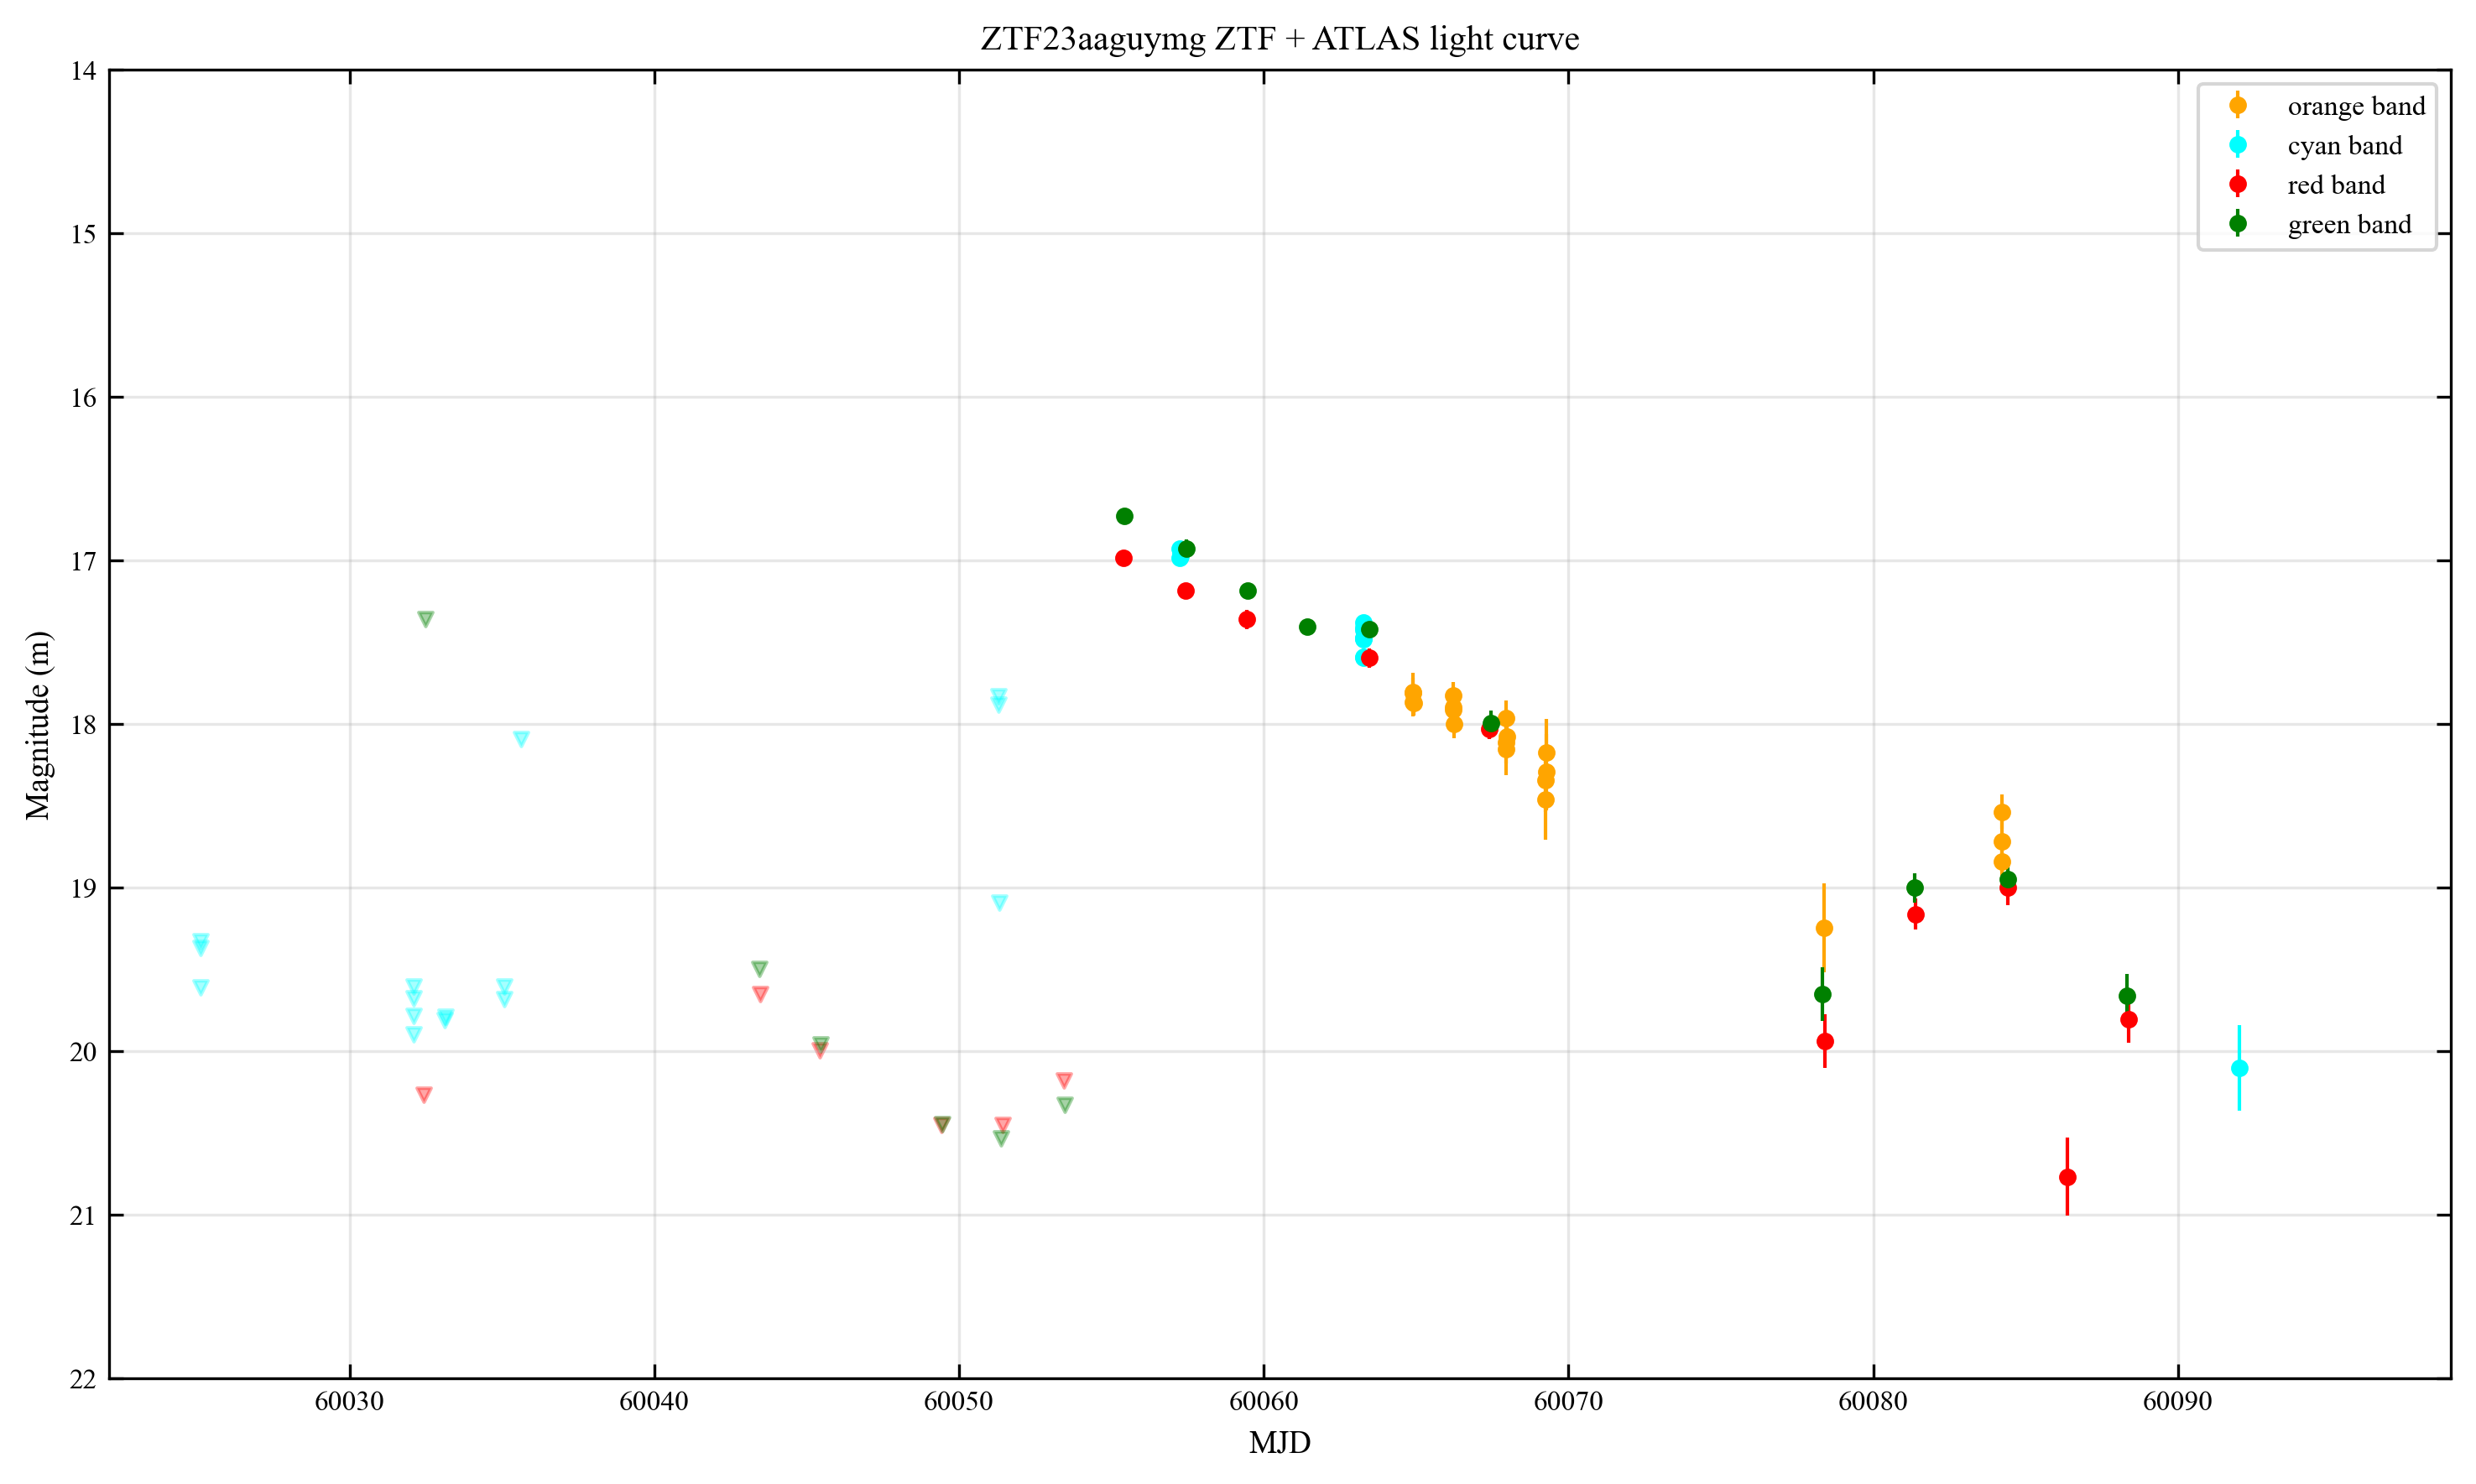

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


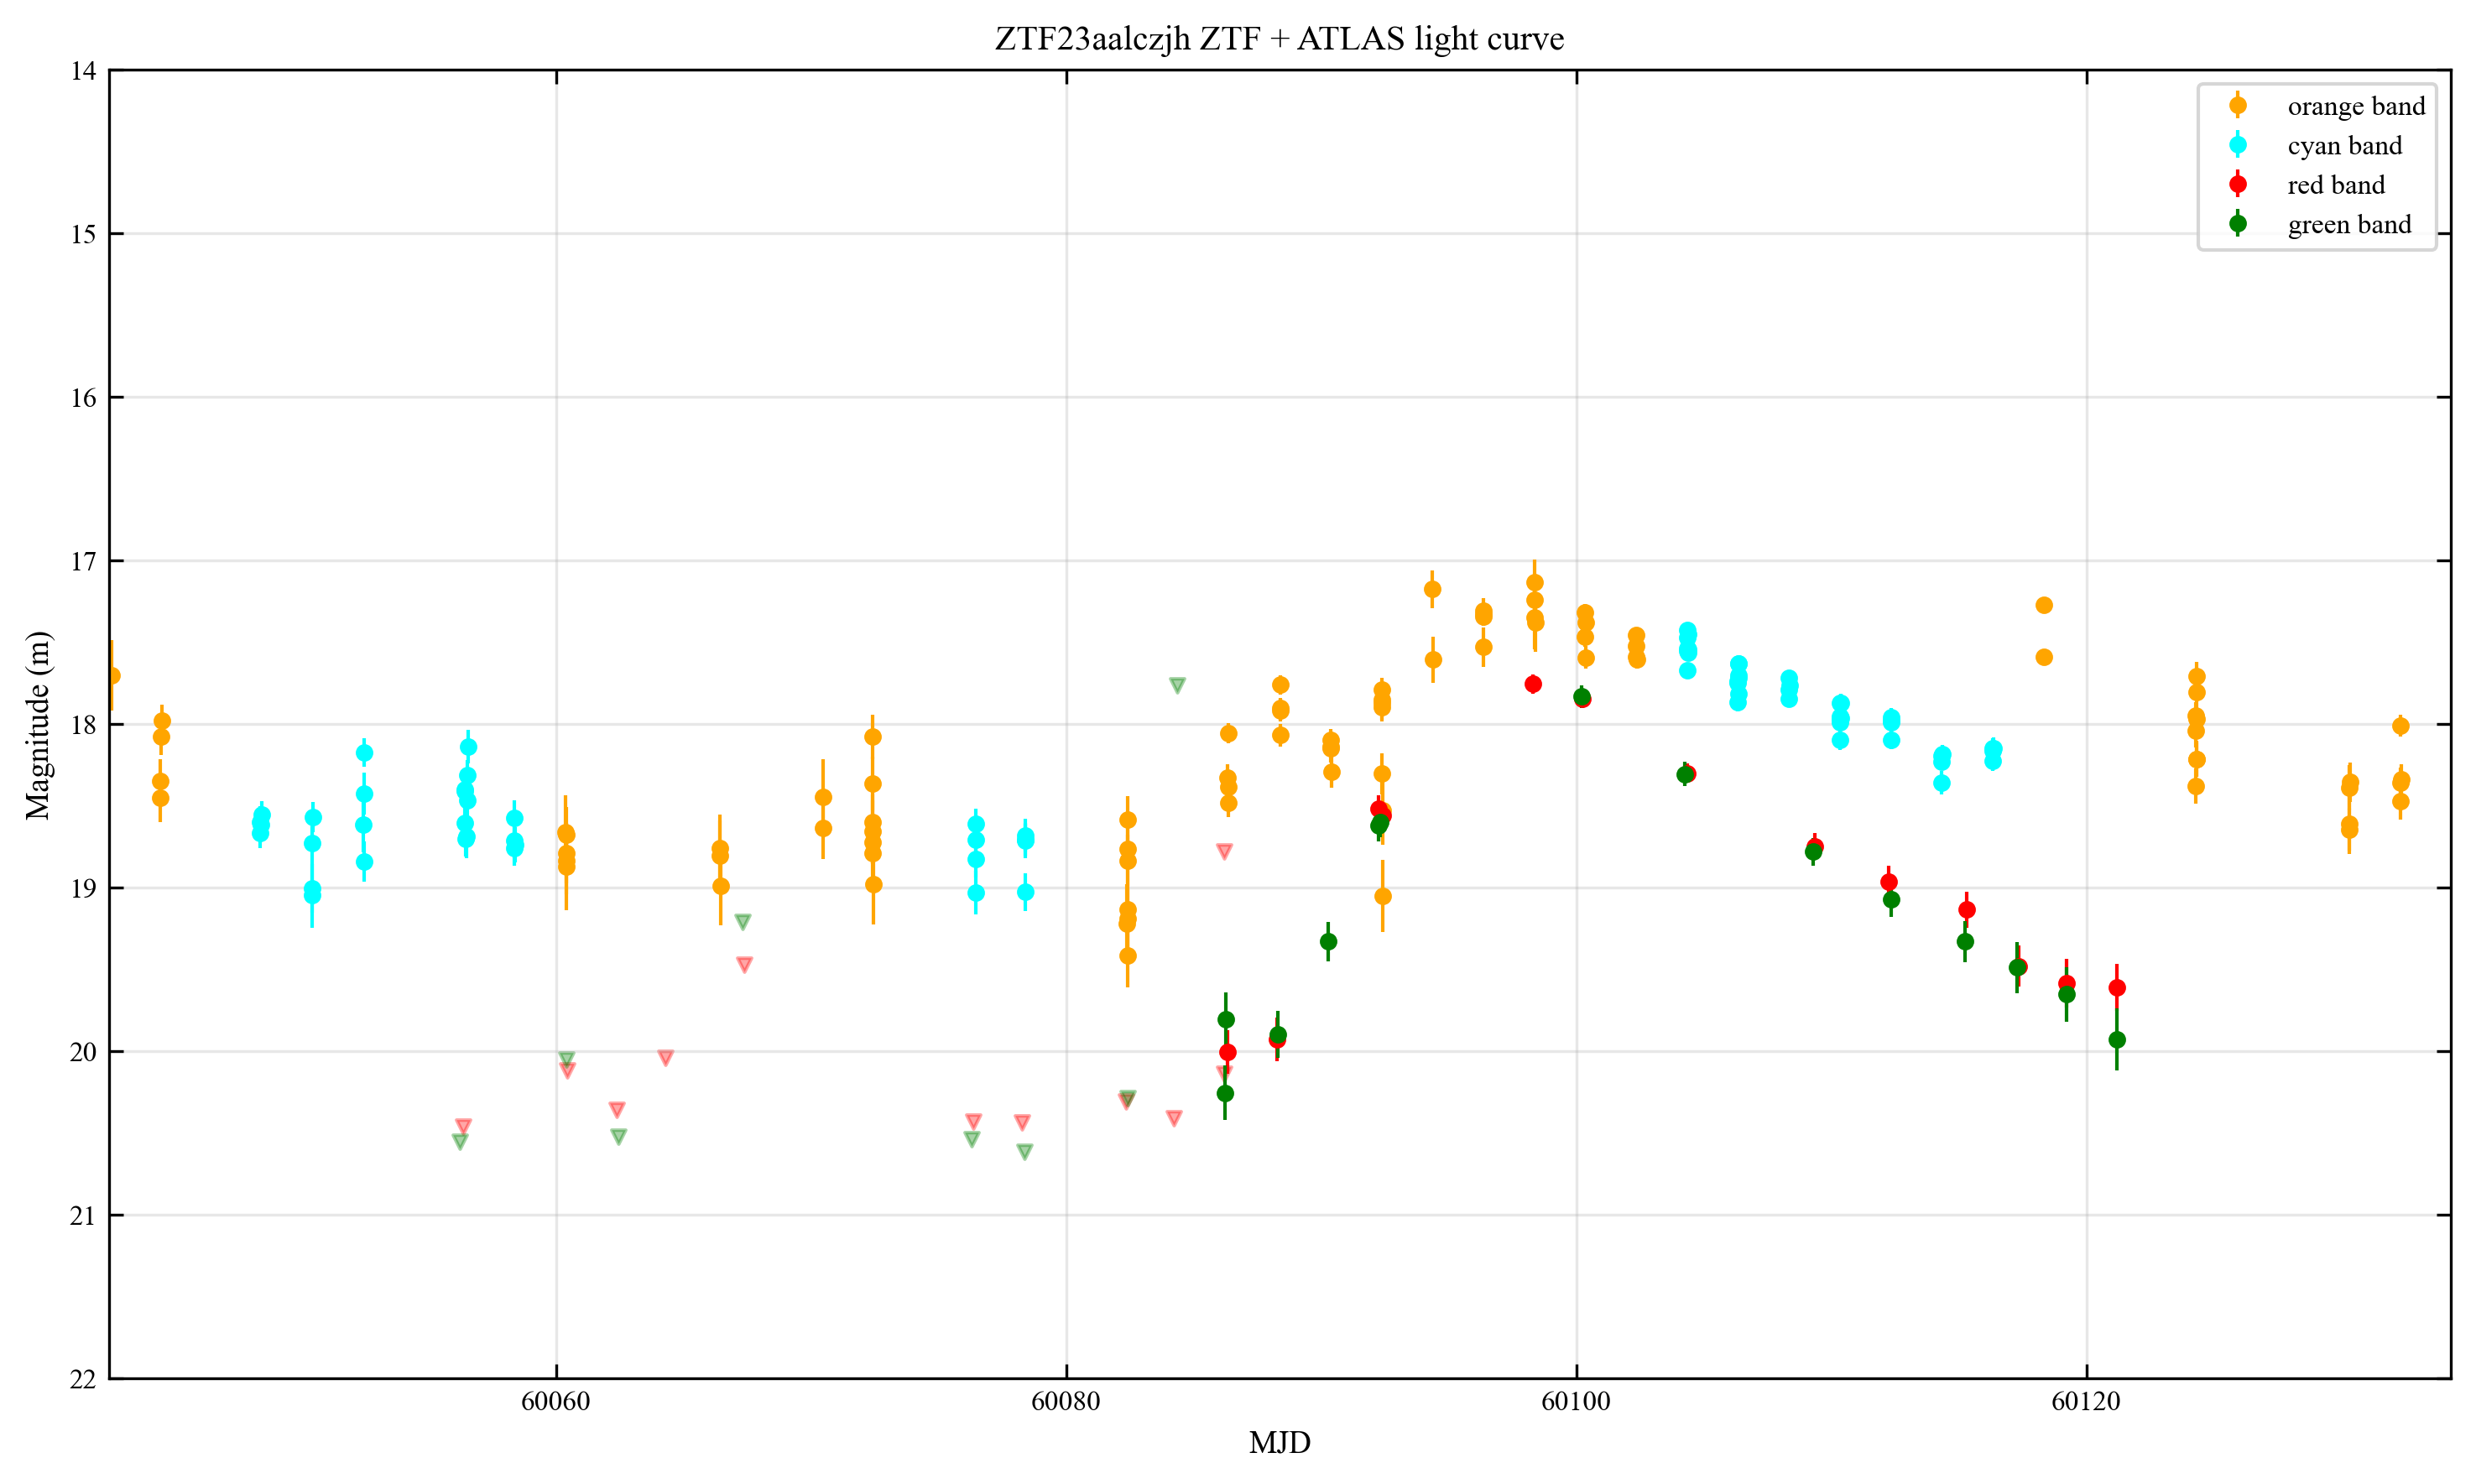

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


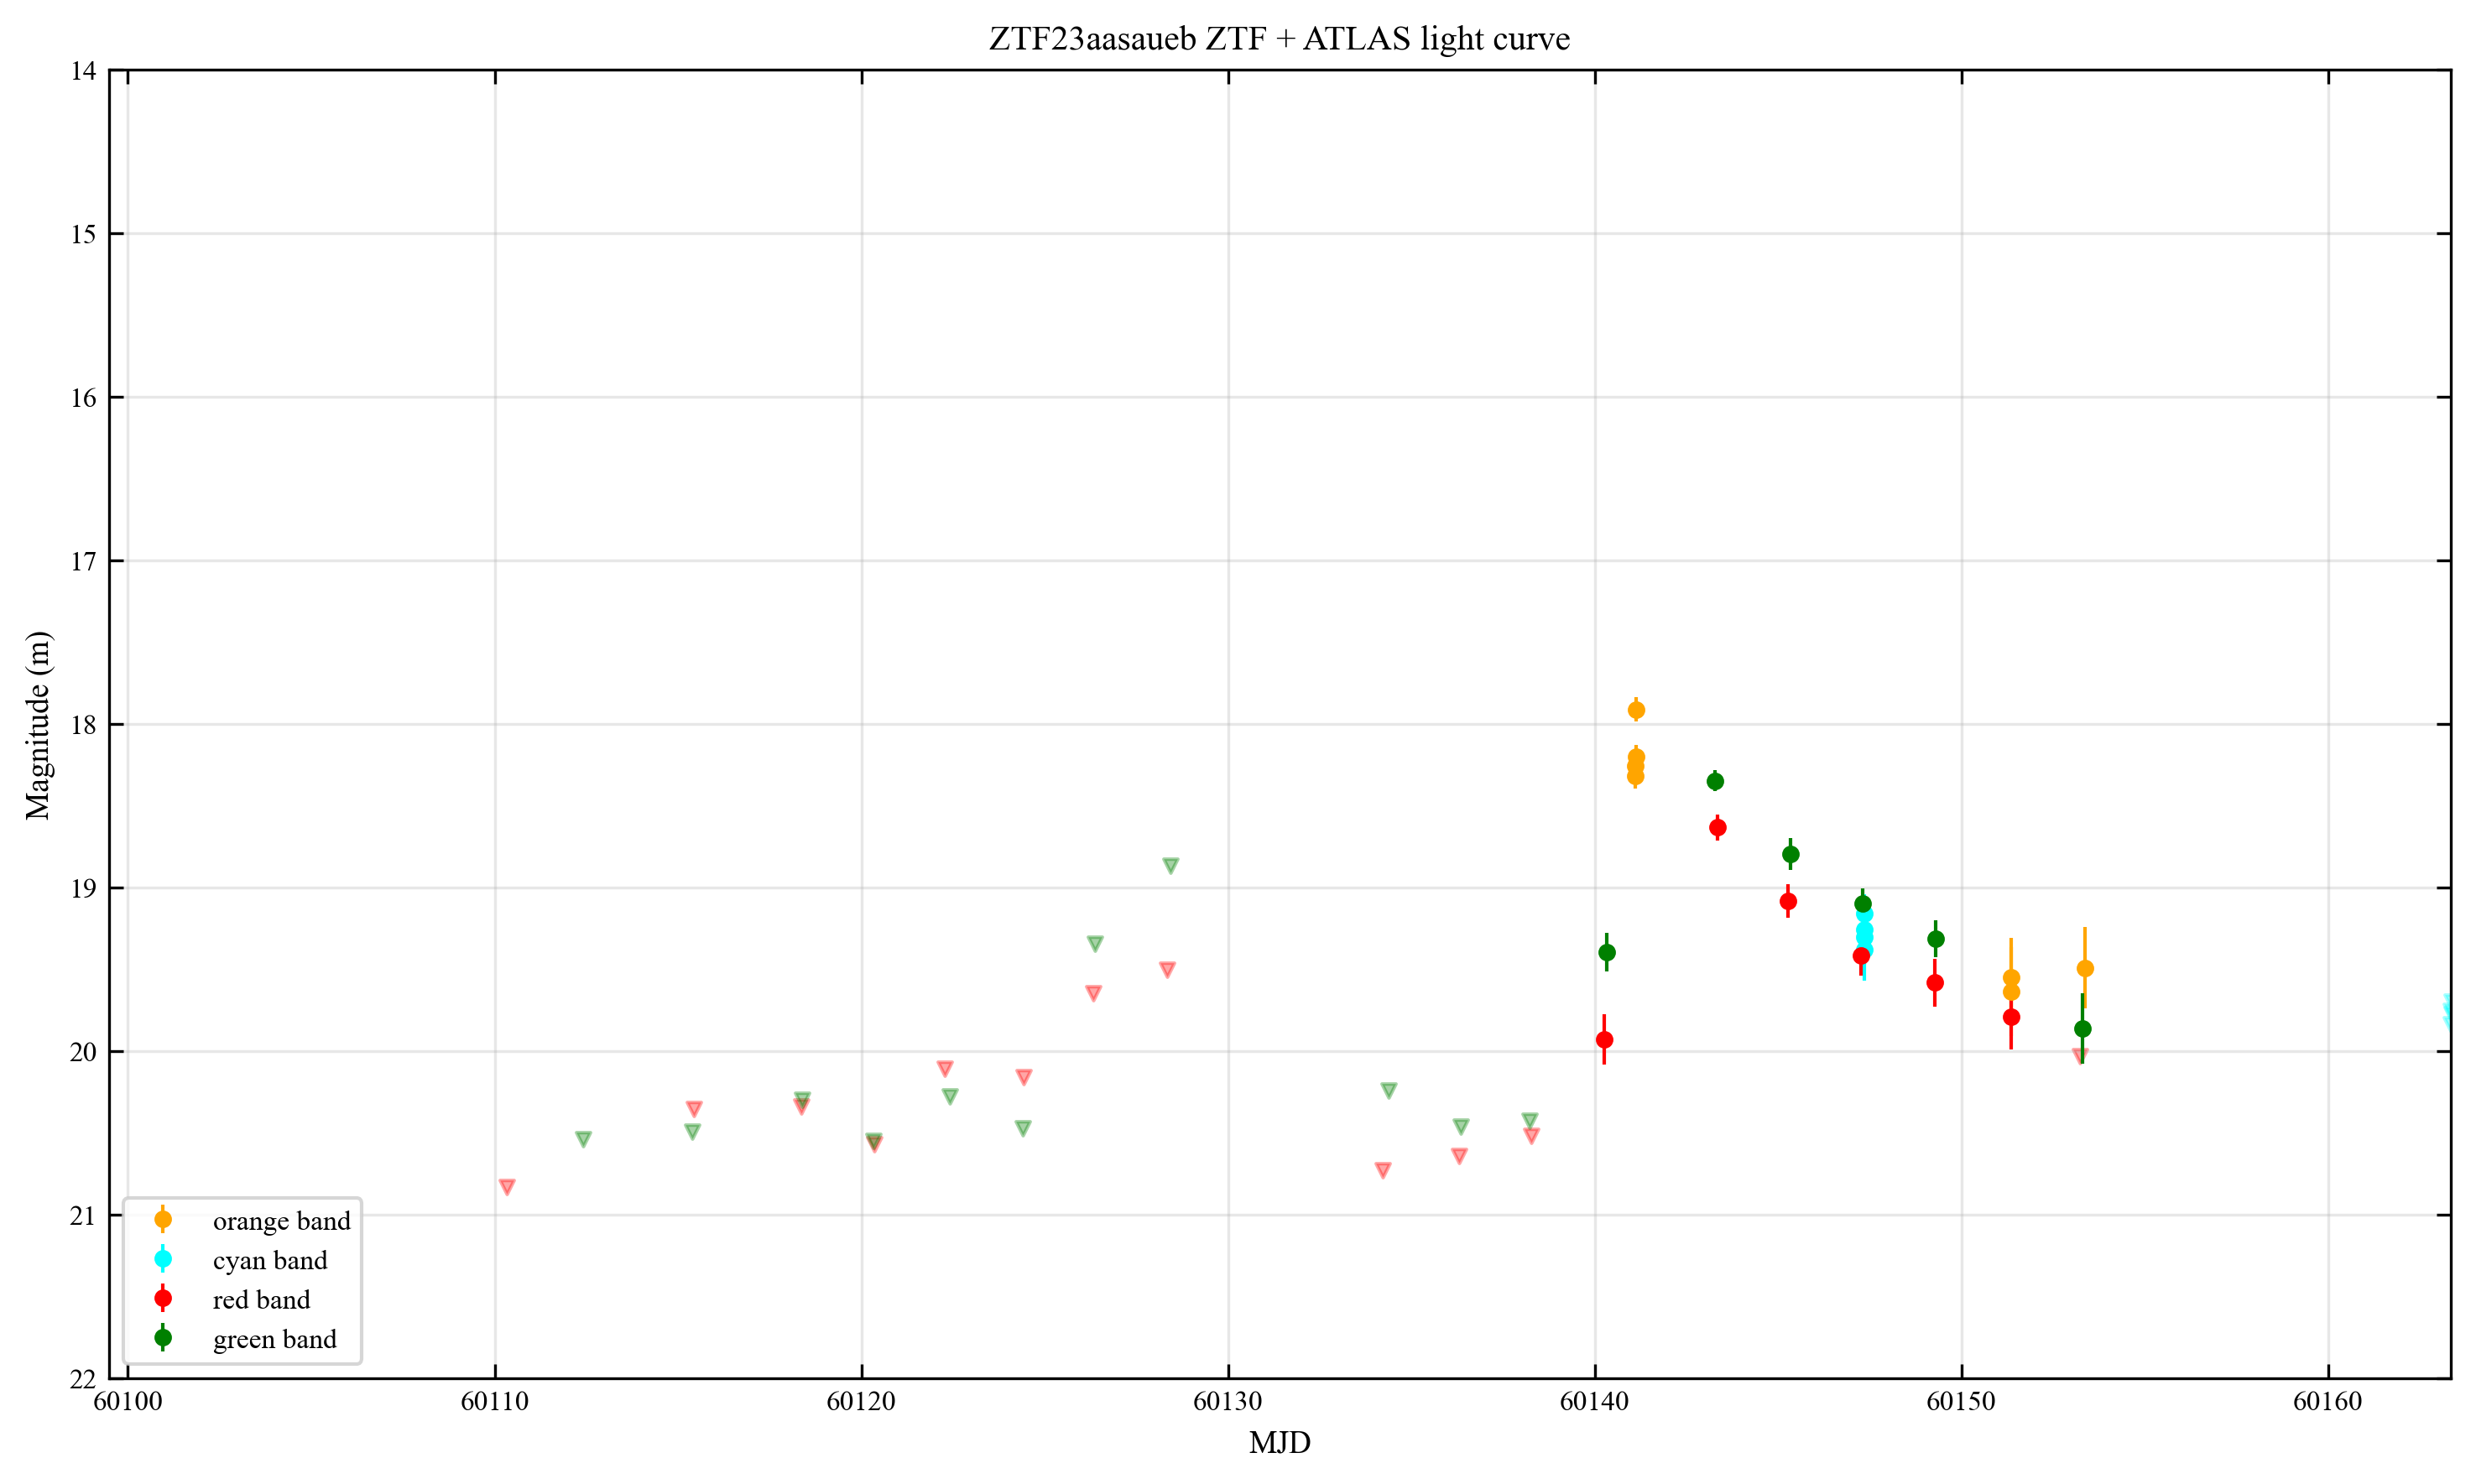

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


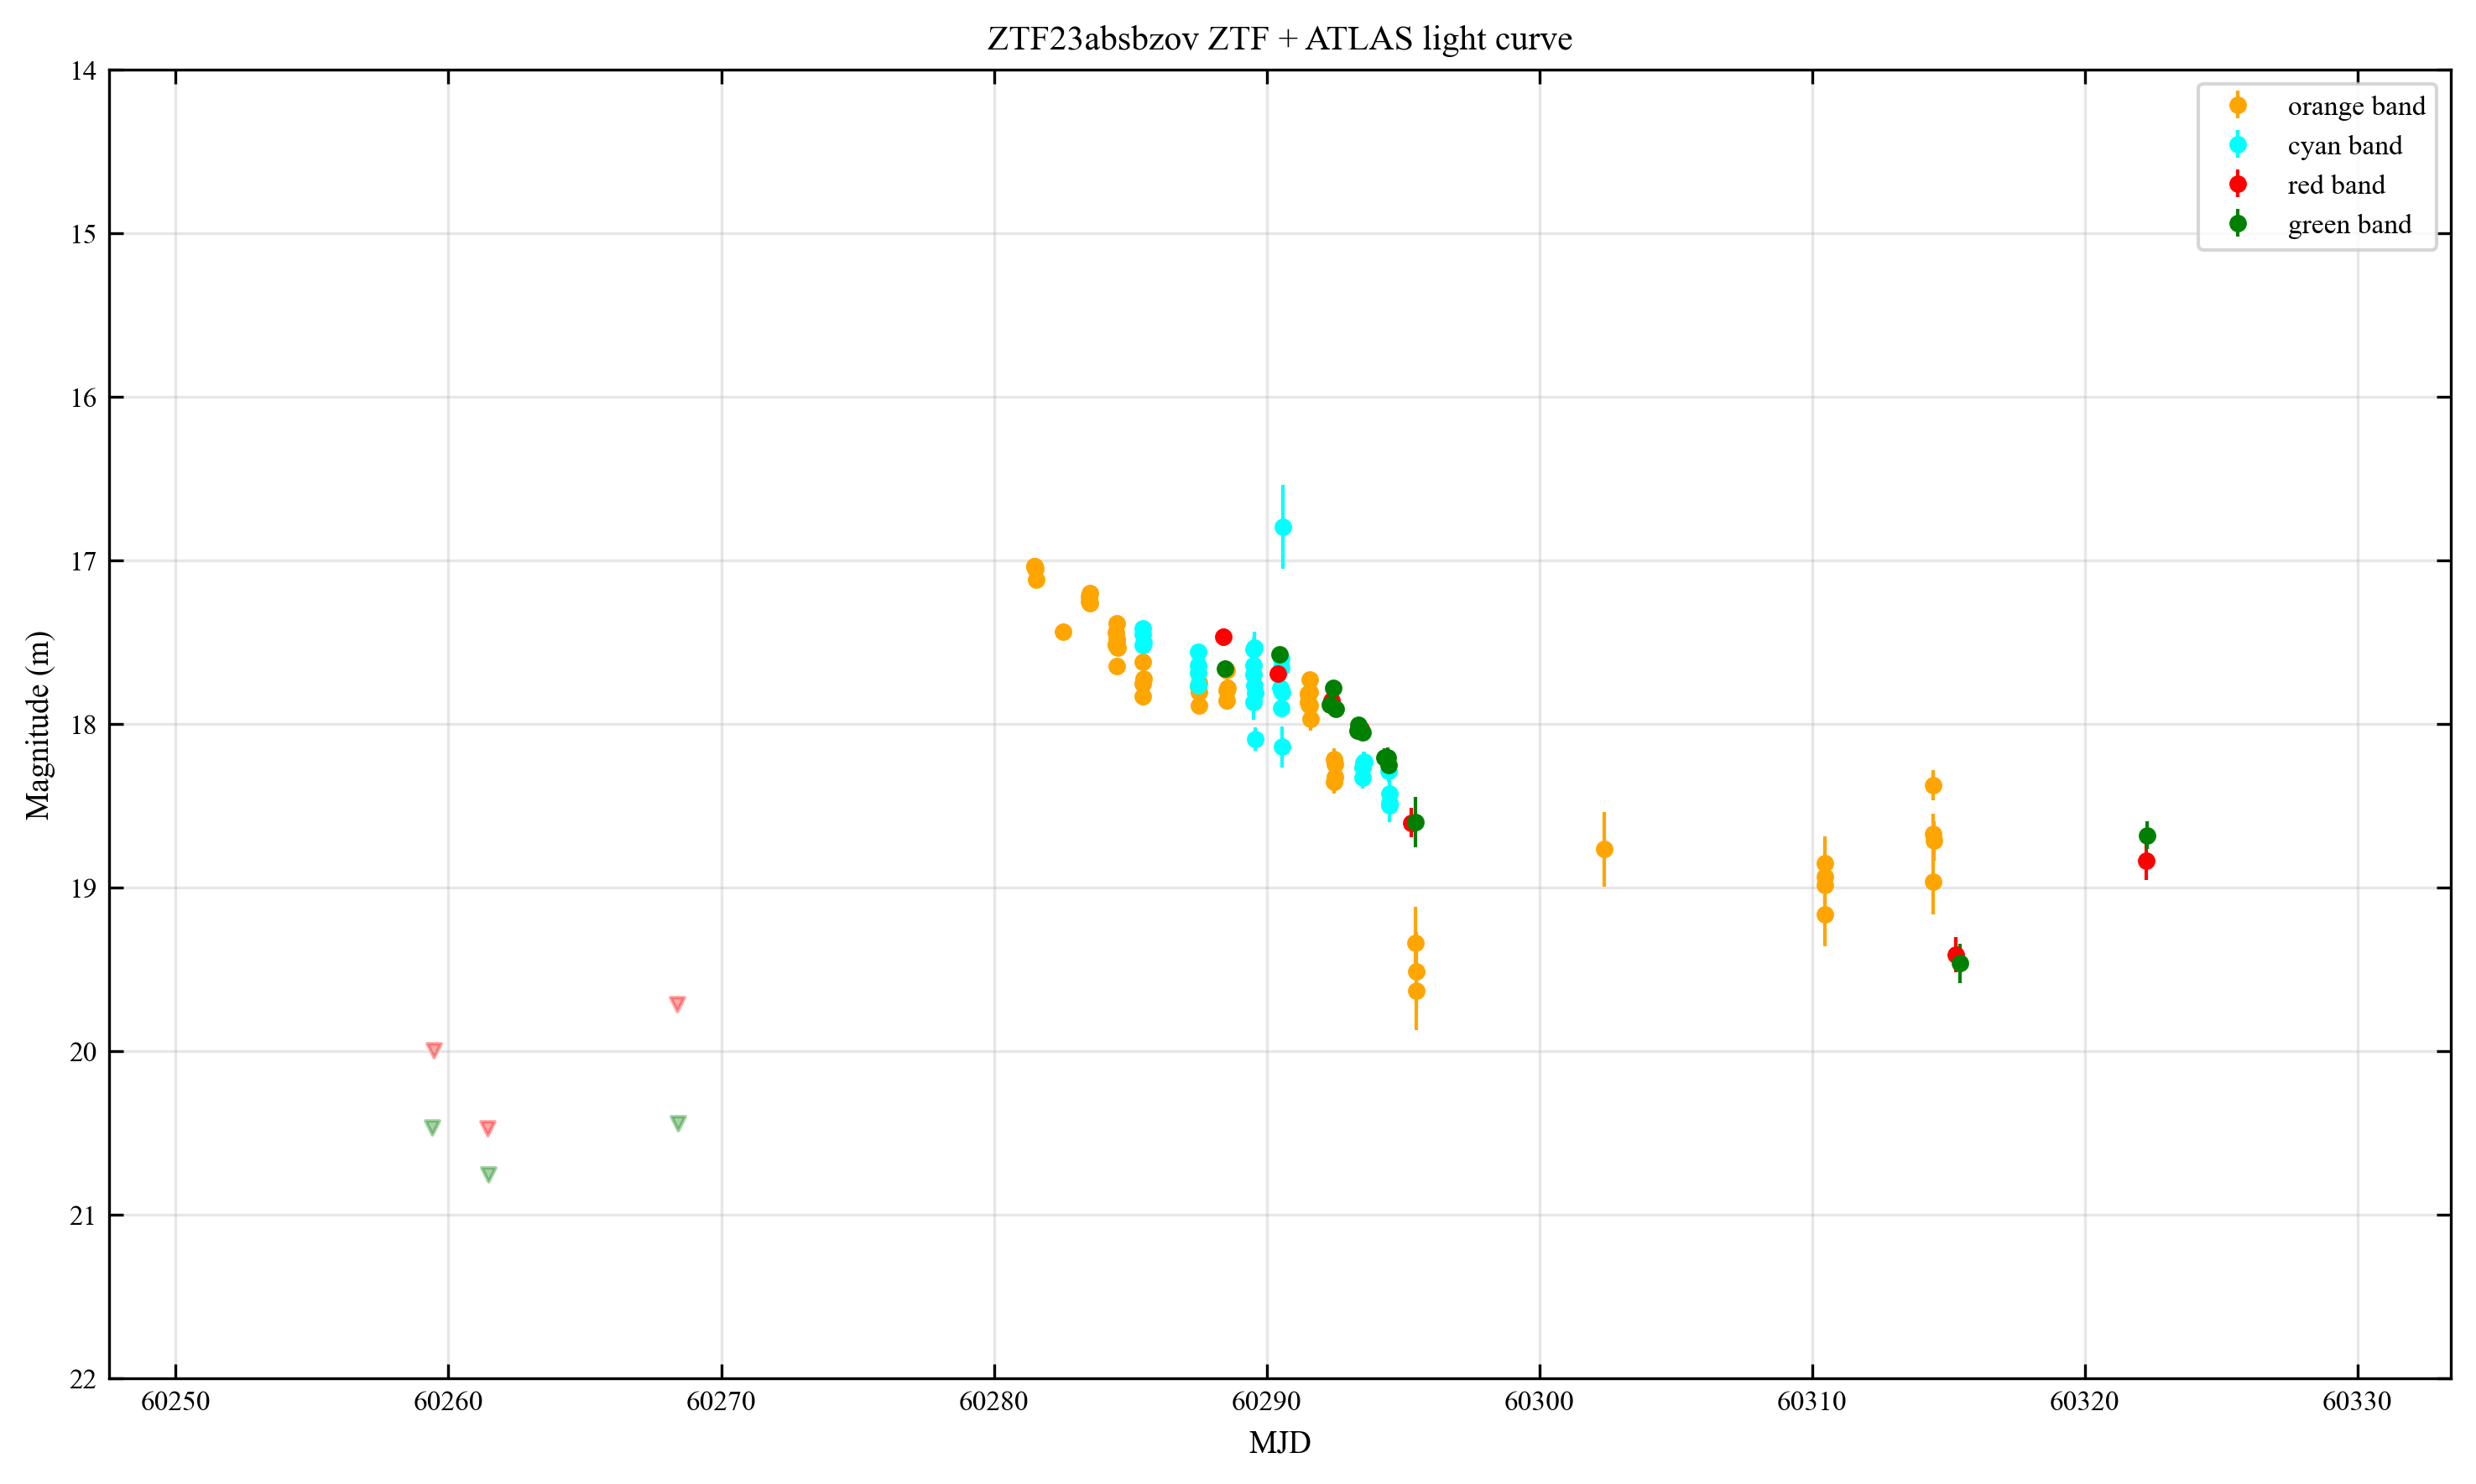

C:\Users\jgmad\AppData\Local\Temp\ipykernel_20440\2567270145.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


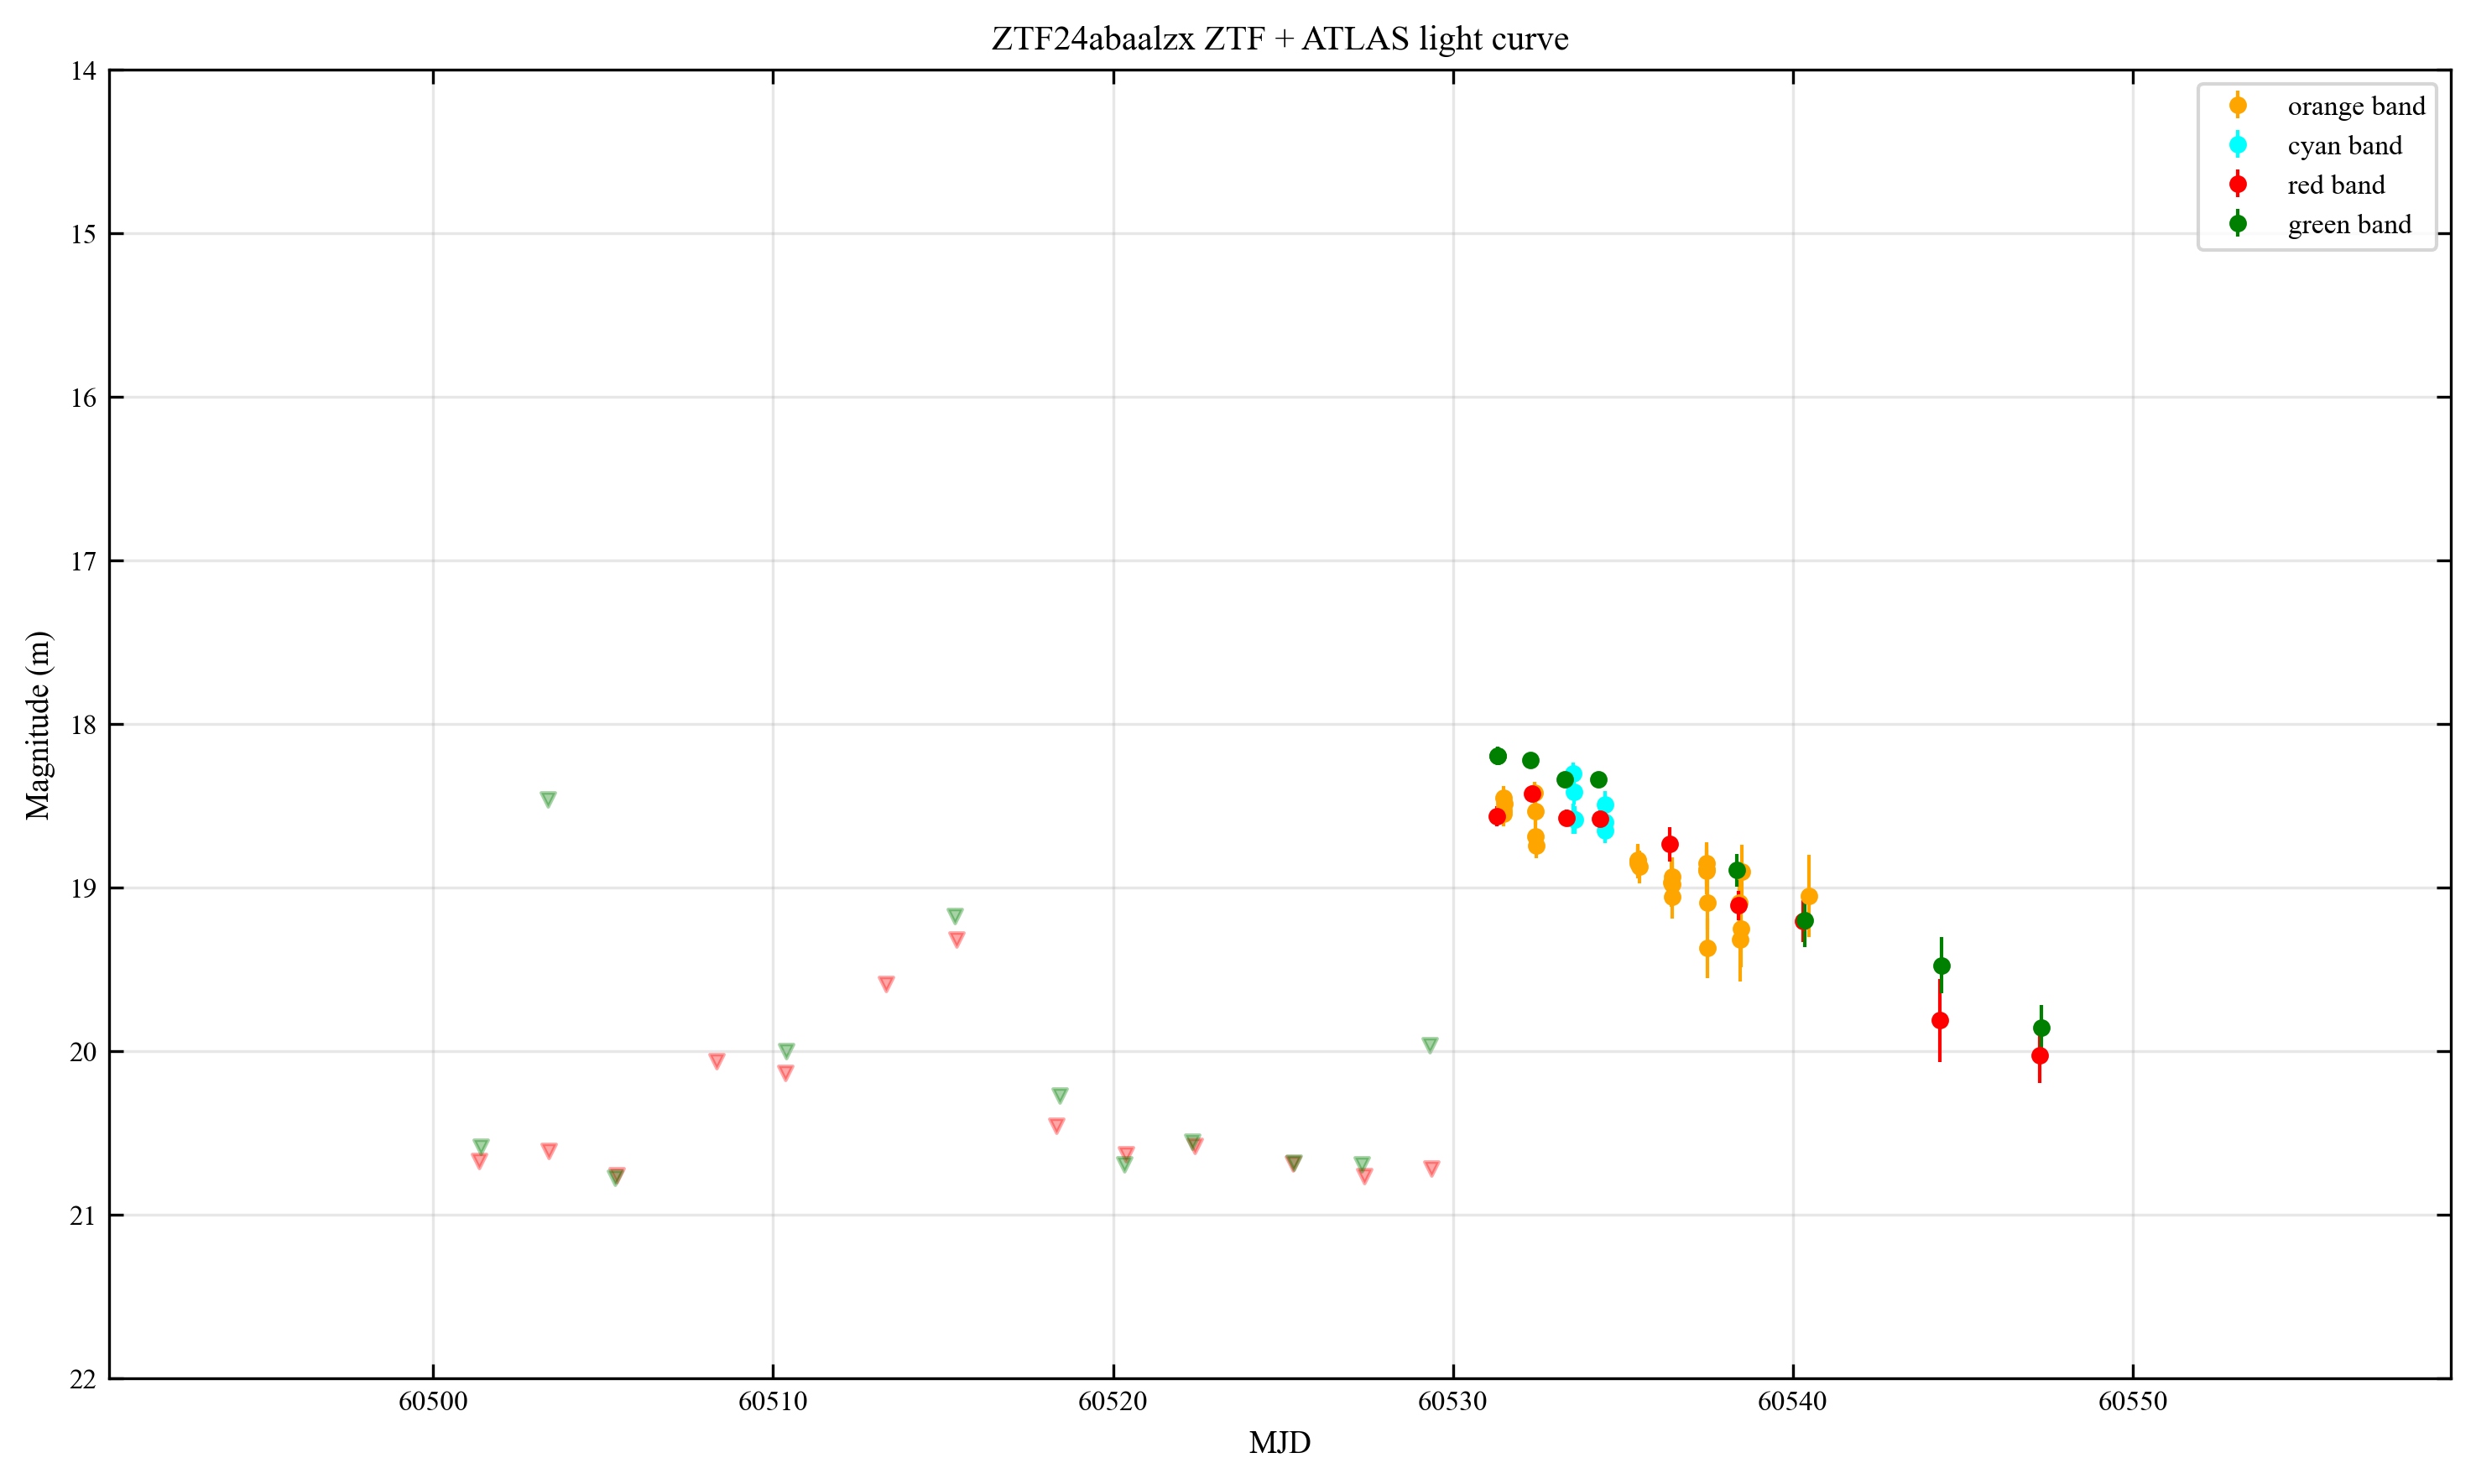

In [12]:
for filename in os.listdir(ATLAS_DIR):
    if filename.endswith(".txt"):
        sn = filename.split('.')[0]

        filename = os.path.join(ATLAS_DIR, f"{sn}.txt")
        fn = os.path.join(DATA_DIR,'ZTFBTS',f'{sn}.csv')

        # Define column names
        column_names = [
            'MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi_N',
            'RA', 'Dec', 'x', 'y', 'maj', 'min', 'phi', 'apfit',
            'mag5sig', 'Sky', 'Obs'
        ]

        # Read the data (skip comment lines starting with '#', whitespace delimited)
        df = pd.read_csv(
            filename,
            delim_whitespace=True,
            comment='#',
            header=None,
            names=column_names
        )

        ztf = pd.read_csv(fn)
        ztfr = ztf[ztf['ant_passband'] == 'R']
        ztfg = ztf[ztf['ant_passband'] == 'g']

        dfo = df[df['F'] == 'o']
        dfc = df[df['F'] == 'c']

        def p(data,time,m,d,nm,color):
            data_all = data.copy()
            ndata = data[1.086/data[d]<=4]
            data = data[1.086/data[d]>4]
            plt.errorbar(data[time], data[m], yerr=data[d], fmt='o', markersize=4, linestyle='none',color=color,alpha=1.,label=f'{color} band')
            #plt.errorbar(ndata[time], ndata[m], yerr=ndata[d], fmt='o', markersize=4, linestyle='none',color=color,alpha=0.3)
            dets = data[[time,m]].dropna()
            first_det = dets[time].min()
            last_det = dets[time].max()
            non_dets = data_all[(data_all[time]<first_det) | (data_all[time]>last_det)]
            ndata = ndata[(ndata[time]<first_det) | (ndata[time]>last_det)]
            plt.scatter(ndata[time],[mlim(x,e) for x,e in zip(ndata[m],ndata[d])],marker='v',color=color,alpha=0.35)
            if nm:
                plt.scatter(non_dets[time],non_dets[nm],marker='v',color=color,alpha=0.35)
            
        def mlim(mag, mag_err):
            # step 1: flux
            flux = 10 ** (-0.4 * mag)
            # step 2: flux error
            flux_err = flux * (np.log(10) / 2.5) * mag_err
            # step 3: 5-sigma flux limit
            flux5 = 5 * flux_err
            # step 4: back to mag
            mag5 = -2.5 * np.log10(flux5)
            return mag5


        # Calculate xlim bounds
        ztf_mjd_min = min(ztfr['ant_mjd'].min(), ztfg['ant_mjd'].min())
        ztf_mjd_max = max(ztfr['ant_mjd'].max(), ztfg['ant_mjd'].max())
        atlas_mjd = df['MJD'].sort_values()

        # Last ATLAS before first ZTF
        atlas_before_ztf = atlas_mjd[atlas_mjd < ztf_mjd_min]
        if not atlas_before_ztf.empty:
            xlim_min = atlas_before_ztf.max()
        else:
            xlim_min = atlas_mjd.min()

        # First ATLAS after last ZTF
        atlas_after_ztf = atlas_mjd[atlas_mjd > ztf_mjd_max]
        if not atlas_after_ztf.empty:
            xlim_max = atlas_after_ztf.min()
        else:
            xlim_max = atlas_mjd.max()
        # Plot MJD vs magnitude with error bars
        plt.figure(figsize=(10, 6))
        p(dfo,'MJD','m','dm',None,'orange')
        p(dfc,'MJD','m','dm',None,'cyan')
        p(ztfr,'ant_mjd','ant_mag','ant_magerr','ant_maglim','red')
        p(ztfg,'ant_mjd','ant_mag','ant_magerr','ant_maglim','green')

        plt.xlabel('MJD')
        plt.ylabel('Magnitude (m)')
        plt.title(f'{sn} ZTF + ATLAS light curve')
        plt.grid(True)
        plt.tight_layout()
        plt.ylim(14,22)
        plt.xlim(xlim_min-10, xlim_max+10)
        plt.gca().invert_yaxis()  # Magnitude scale: brighter = lower values
        plt.legend()
        plt.show()

        ztf.head()



In [ ]:
ztf[['ant_mag','ant_maglim']]
ztf.columns.values
#[x if 'flux' in x for x in ztf.column.values]
ztf.columns.values

array(['ztf_jd', 'ztf_fid', 'ztf_pid', 'ztf_diffmaglim',
       'ztf_pdiffimfilename', 'ztf_programpi', 'ztf_programid', 'ztf_nid',
       'ztf_rcid', 'ztf_field', 'ztf_magzpsci', 'ztf_magzpsciunc',
       'ztf_magzpscirms', 'ztf_clrcoeff', 'ztf_clrcounc', 'ztf_rbversion',
       'ztf_object_id', 'ant_mjd', 'ant_input_msg_time',
       'ant_time_received', 'ant_survey', 'ant_maglim', 'ant_passband',
       'ztf_candid', 'ztf_isdiffpos', 'ztf_tblid', 'ztf_xpos', 'ztf_ypos',
       'ztf_ra', 'ztf_dec', 'ztf_magpsf', 'ztf_sigmapsf', 'ztf_chipsf',
       'ztf_magap', 'ztf_sigmagap', 'ztf_distnr', 'ztf_magnr',
       'ztf_sigmagnr', 'ztf_chinr', 'ztf_sharpnr', 'ztf_sky',
       'ztf_magdiff', 'ztf_fwhm', 'ztf_classtar', 'ztf_mindtoedge',
       'ztf_magfromlim', 'ztf_seeratio', 'ztf_aimage', 'ztf_bimage',
       'ztf_aimagerat', 'ztf_bimagerat', 'ztf_elong', 'ztf_nneg',
       'ztf_nbad', 'ztf_rb', 'ztf_sumrat', 'ztf_magapbig',
       'ztf_sigmagapbig', 'ztf_ranr', 'ztf_decnr', 'ztf_scorr',

C:\Users\jgmad\AppData\Local\Temp\ipykernel_6336\3522628478.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


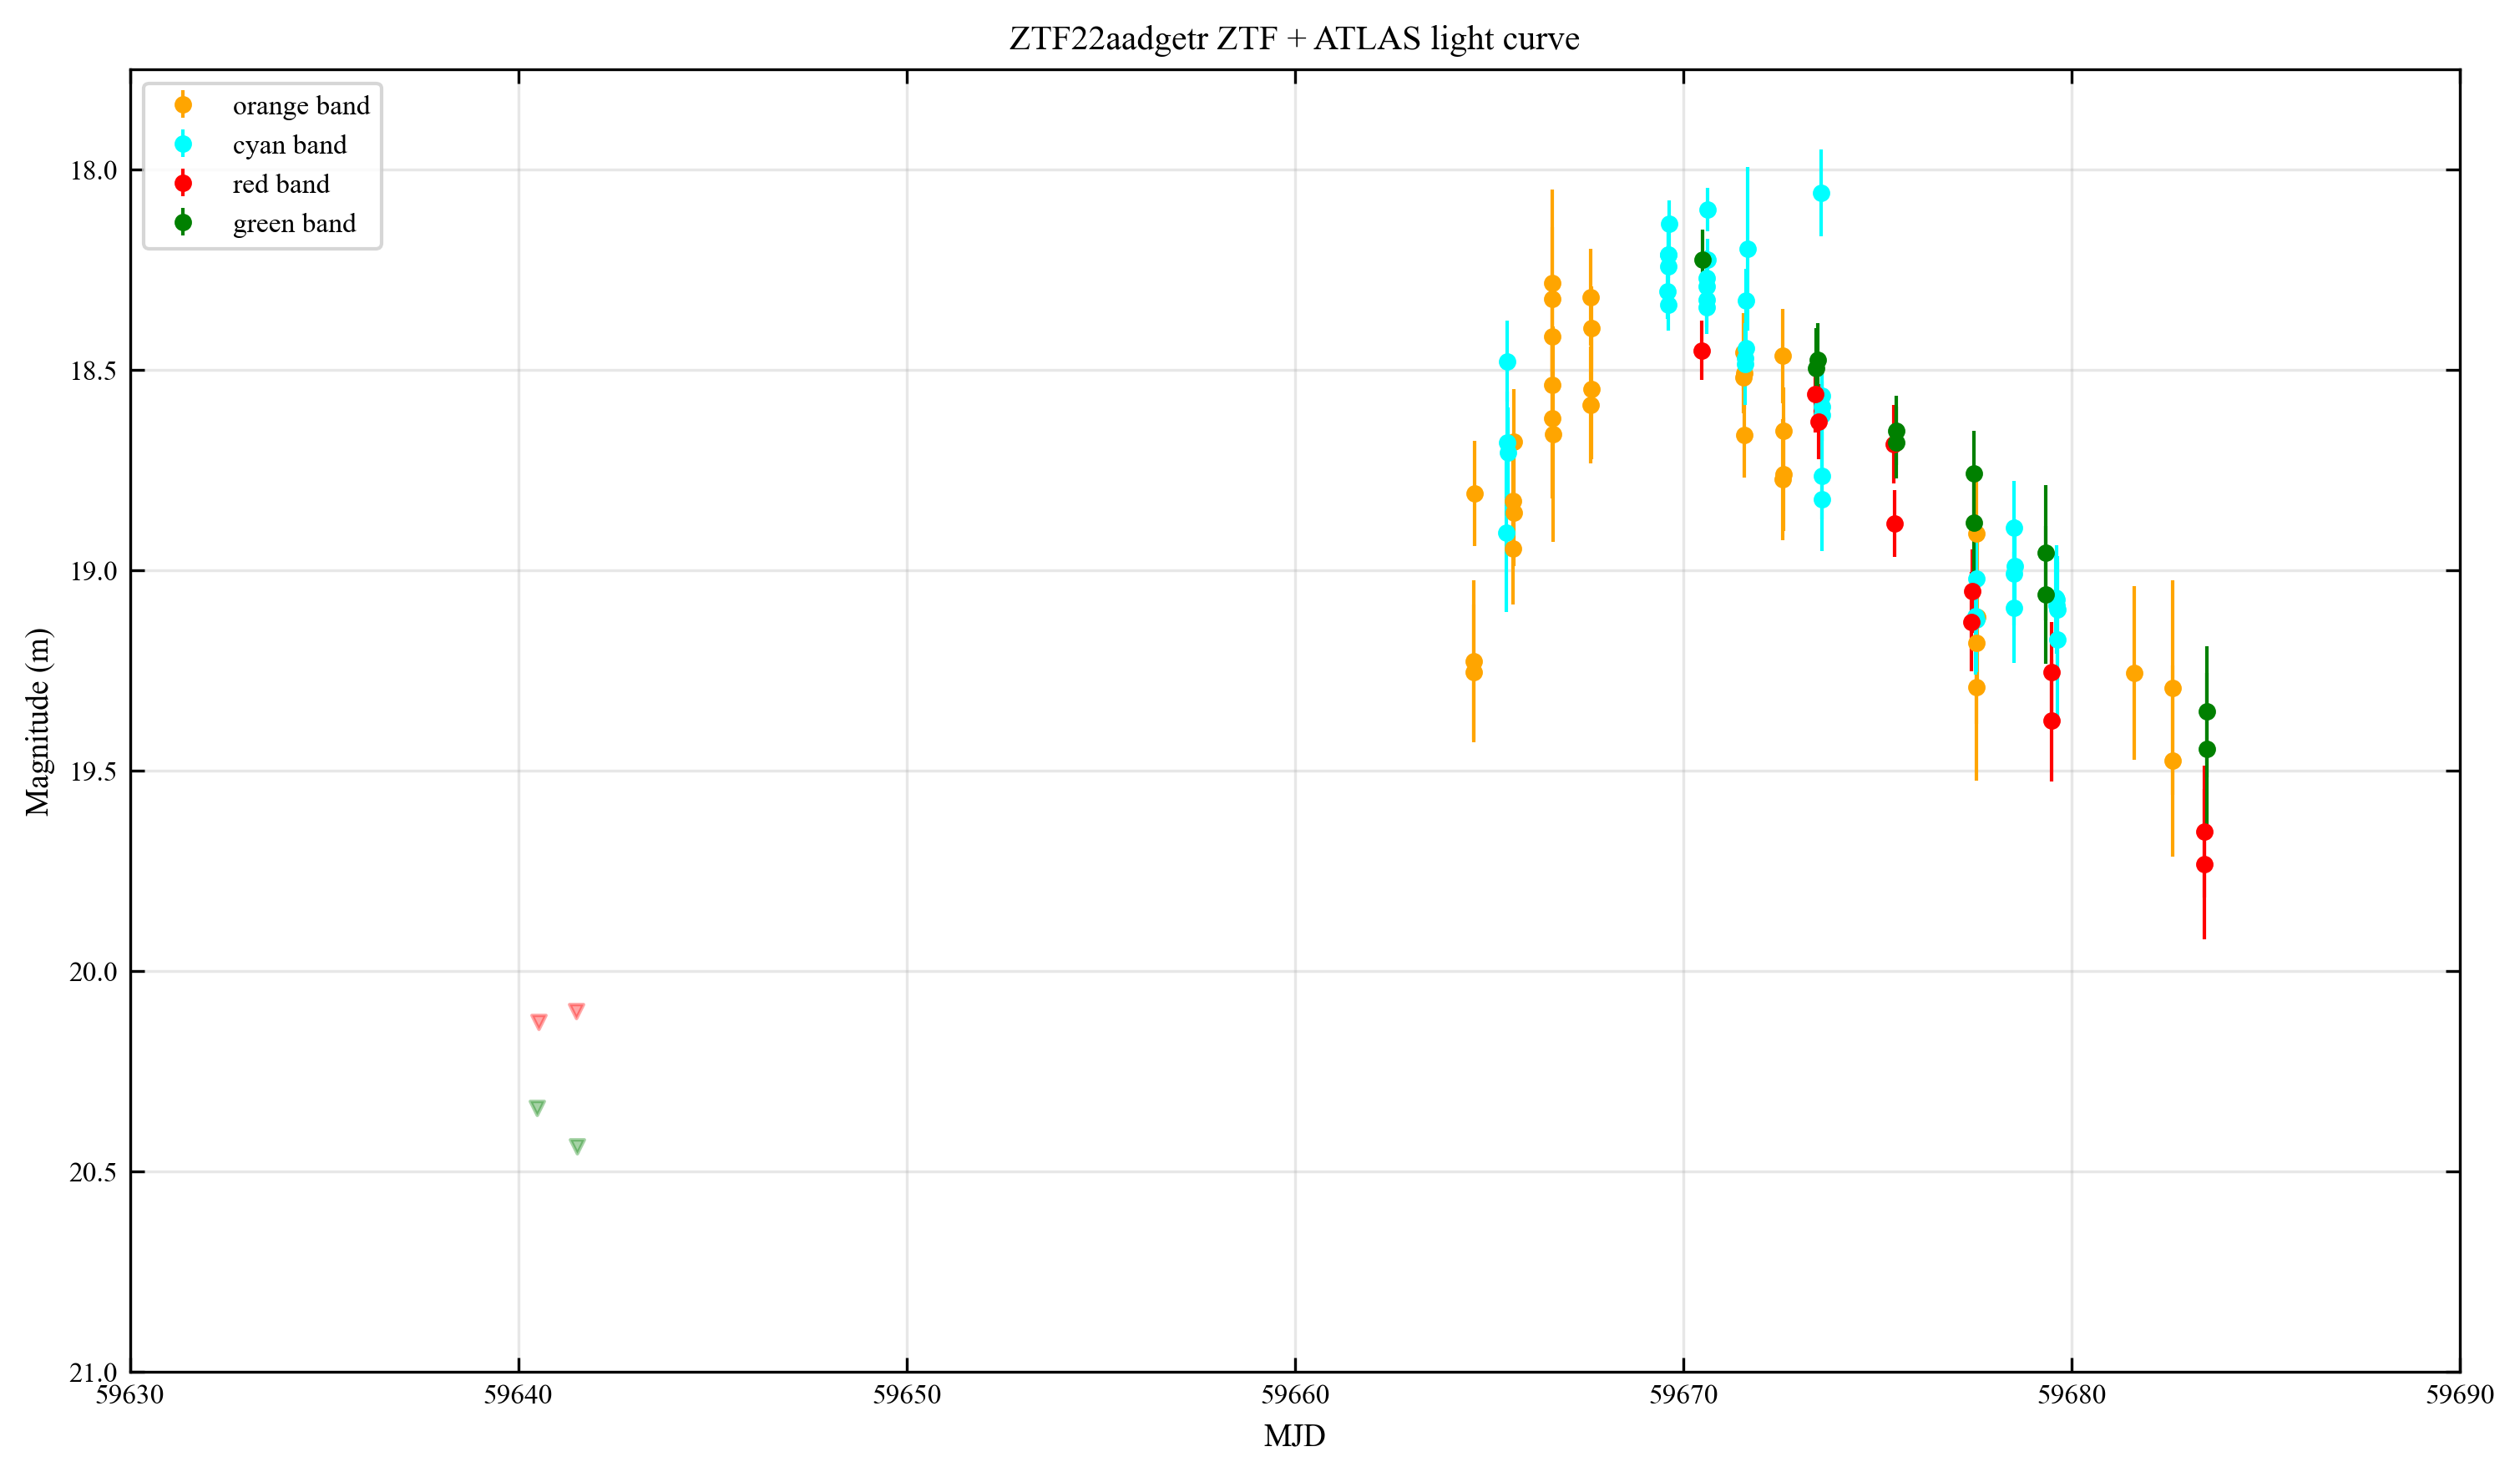

In [ ]:
sn = 'ZTF22aadgetr'

# Replace 'data.txt' with your filename if different
filename = os.path.join(DATA_DIR, f"{sn}.txt")
fn = os.path.join(DATA_DIR,'ZTFBTS',f'{sn}.csv')

# Define column names
column_names = [
    'MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi_N',
    'RA', 'Dec', 'x', 'y', 'maj', 'min', 'phi', 'apfit',
    'mag5sig', 'Sky', 'Obs'
]

# Read the data (skip comment lines starting with '#', whitespace delimited)
df = pd.read_csv(
    filename,
    delim_whitespace=True,
    comment='#',
    header=None,
    names=column_names
)

ztf = pd.read_csv(fn)
ztfr = ztf[ztf['ant_passband'] == 'R']
ztfg = ztf[ztf['ant_passband'] == 'g']

dfo = df[df['F'] == 'o']
dfc = df[df['F'] == 'c']

# Plot MJD vs magnitude with error bars
plt.figure(figsize=(10, 6))
p(dfo,'MJD','m','dm',None,'orange')
p(dfc,'MJD','m','dm',None,'cyan')
p(ztfr,'ant_mjd','ant_mag','ant_magerr','ant_maglim','red')
p(ztfg,'ant_mjd','ant_mag','ant_magerr','ant_maglim','green')

plt.xlabel('MJD')
plt.ylabel('Magnitude (m)')
plt.title(f'{sn} ZTF + ATLAS light curve')
plt.grid(True)
plt.tight_layout()
plt.ylim(17.75,21)
plt.xlim(59630,59690)
plt.gca().invert_yaxis()  # Magnitude scale: brighter = lower values
plt.legend()
plt.show()



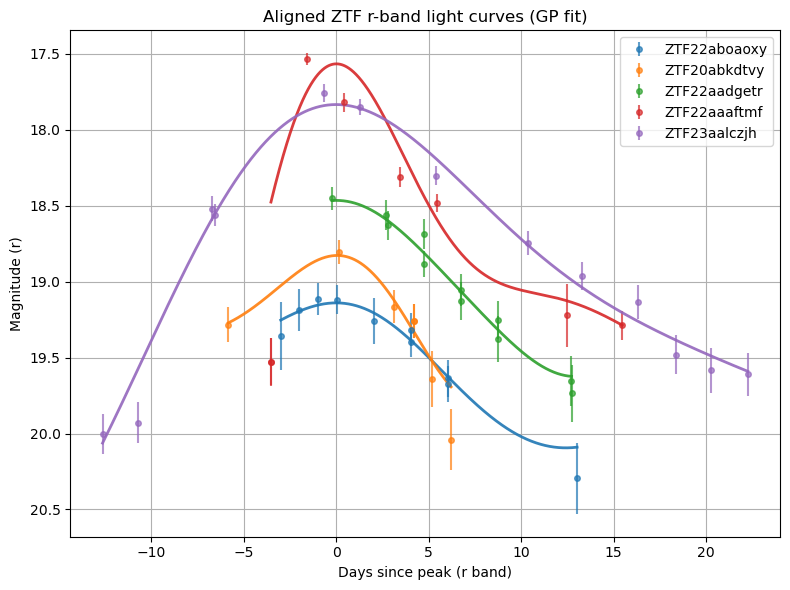

In [46]:
import matplotlib.pyplot as plt
from lc_param_GP import get_LC, GP_predict

sn_list = [
    {"name": "ZTF22aboaoxy", "peak_epoch_r": 59874.433192},
    {"name": "ZTF20abkdtvy", "peak_epoch_r": 59046.028840},
    {"name": "ZTF22aadgetr", "peak_epoch_r": 59670.696886},
    {"name": "ZTF22aaaftmf", "peak_epoch_r": 59625.055928},
    {"name": "ZTF23aalczjh", "peak_epoch_r": 60098.957980},
]

colors = plt.cm.tab10(np.arange(len(sn_list)))

plt.figure(figsize=(8,6))

for i,sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    # Get ZTF r-band light curve
    ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    # Fit GP to r-band data
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak
        plt.errorbar(mjd_aligned, y, yerr=y_err, fmt='o', markersize=4, label=sn, alpha=0.7,color=colors[i])
        plt.plot(mjd_pred_aligned, y_pred, '-', lw=2, alpha=0.9,color=colors[i])
    except Exception as e:
        # fallback to just connecting points if GP fails
        idx = np.argsort(mjd_aligned)
        plt.errorbar(mjd_aligned[idx], y[idx], yerr=y_err[idx], fmt='o-', markersize=4, label=sn, alpha=0.7,color=colors[i])

plt.xlabel('Days since peak (r band)')
plt.ylabel('Magnitude (r)')
plt.title('Aligned ZTF r-band light curves (GP fit)')
plt.ylim(plt.ylim()[::-1])  # invert y-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from astropy.time import Time
from astropy.io import ascii
import numpy as np
import os
from matplotlib import pyplot as plt
from extinction import fitzpatrick99
from scipy.interpolate import UnivariateSpline
from lmfit import Model
import pandas as pd
from lc_param_GP import (
    check_candidates, check_candidates_color, get_LC,
)

import glob
from tqdm import tqdm
import re
from astropy.cosmology import Planck18 as cosmo

from alerce.core import Alerce
client = Alerce()

PLOT = True
SNT = 4
ZP = 27.5
DAYS_AFTER = 0
DAYS_FROM_PEAK = None # only used if DAYS_AFTER=0
IBN = False
UNLABELED = False

ROOT_DIR = r'C:\Users\jgmad\Research\Ibn'
DATA_DIR =  os.path.join(ROOT_DIR, "data")
PLOT_DIR =  os.path.join(ROOT_DIR, "plots")
#PHOT_DIR = os.path.join(DATA_DIR, "ztf_ibn")
folders = ['ZTFBTS','ibn_papers']
PHOT_DIRS = [os.path.join(DATA_DIR, f) for f in folders]

phot_files = []
for d in PHOT_DIRS:
    phot_files.extend(glob.glob(os.path.join(d, "*")))

# Get label/type
summary_file, = glob.glob(os.path.join(DATA_DIR, "ZTFBTS_summary.csv"))
summary_data = pd.read_csv(summary_file)
summary_data.set_index('ZTFID', inplace=True)

summary_data.replace('-', np.nan, inplace=True)
summary_data['A_V'] = pd.to_numeric(summary_data['A_V'], errors='coerce')
summary_data['redshift'] = pd.to_numeric(summary_data['redshift'], errors='coerce')

#type_dict = dict(zip(summary_data['ZTFID'], summary_data['type']))
no_type_ztfids = summary_data[summary_data['type'].isna()].index.tolist()

Ibns = list(summary_data[summary_data['type'] == 'SN Ibn'].index)

phot_files = [f for f in phot_files if any(x in f for x in Ibns)]
print(len(phot_files))

56


In [20]:
sn_list = []
ztf_redshifts = {}

def safe_filename(name):
    return re.sub(r'[\\/:"*?<>|]+', '_', name)

for file in phot_files:
    filename = os.path.basename(file)
    supernova_name = filename.split("_")[0]
    supernova_name = safe_filename(supernova_name)
    supernova_name = supernova_name.split('.')[0]

    data = pd.read_csv(file)

    sn_list.append({'name': supernova_name,
                    'peak_epoch_r': summary_data.loc[supernova_name].to_dict()['peakt'] + (2458000 - 2400000.5)})
    ztf_redshifts[supernova_name] = summary_data.loc[supernova_name].to_dict()['redshift']

print(ztf_redshifts)

{'ZTF18abqbuaj': 0.055, 'ZTF18acrheel': 0.059, 'ZTF19aadnxbh': 0.02045, 'ZTF19aapfmki': 0.05469, 'ZTF19aatmkll': 0.02475, 'ZTF19abamqxo': 0.057, 'ZTF19abhcefa': 0.04168, 'ZTF19acmbekd': 0.05, 'ZTF19acrwyyb': 0.052, 'ZTF20aalrqbu': 0.068, 'ZTF20abfadah': 0.1, 'ZTF20abyznqs': 0.05, 'ZTF21aabpnlm': 0.041, 'ZTF21aalkltz': 0.102, 'ZTF21aamobbh': 0.057, 'ZTF21aapdumx': 0.052, 'ZTF21aatwkkt': 0.0712, 'ZTF21aauvmck': 0.038, 'ZTF21abuvury': 0.085, 'ZTF21achujxq': 0.02348, 'ZTF22aaaepgu': 0.05, 'ZTF22aaezdtd': 0.0888, 'ZTF22aahftli': 0.033, 'ZTF22aawxlpc': 0.062, 'ZTF23aajhtuu': 0.103, 'ZTF23aakfysp': 0.0768, 'ZTF23abhtkba': 0.056, 'ZTF23abjjrwv': 0.013, 'ZTF23abngbvw': 0.06, 'ZTF23abprwou': 0.01325, 'ZTF24aabwvws': 0.066, 'ZTF24aaneoyr': 0.0987, 'ZTF24aauhnqm': 0.08, 'ZTF24abiesnr': 0.066, 'ZTF24abyzgqo': 0.053, 'ZTF25aaaoxjm': 0.07, 'ZTF25aaompnz': 0.06, '2011hw': 0.023, '2014av': 0.030154, '2015U': 0.014, '2018jmt': 0.032, '2019deh': 0.054, '2019kbj': 0.048, '2019uo': 0.020454, '2019wep': 0.0

In [13]:
print(len(phot_files))

17063


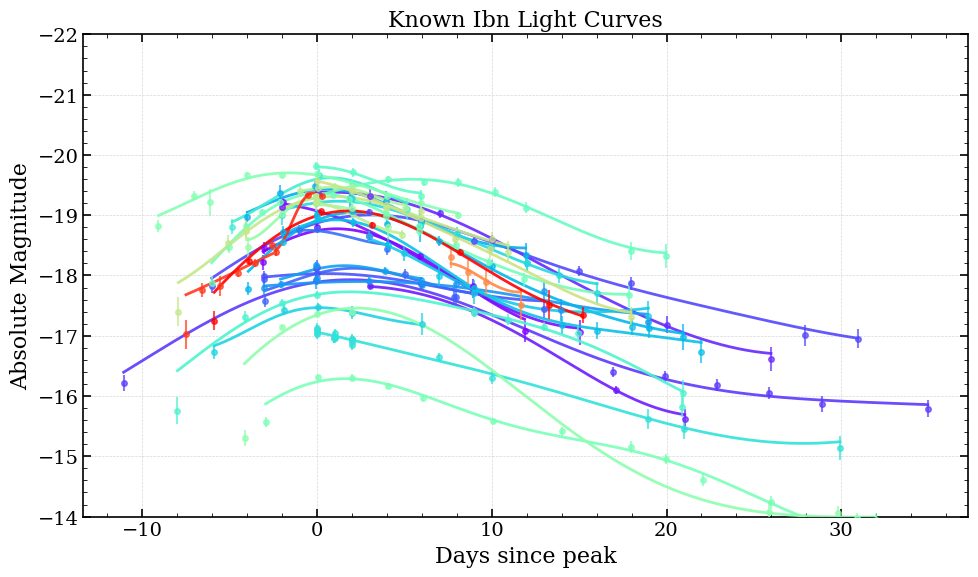

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
from lc_param_GP import get_LC, GP_predict

import matplotlib.pyplot as plt
from matplotlib import cm

import jax.numpy as jnp

# Global figure style
plt.rcParams.update({
    # Fonts
    "font.family": "serif",           # Times-like font
    "font.size": 14,                  # Base font size
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    
    # Axes
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.5,
    
    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    
    # Lines
    "lines.linewidth": 1.5,
    "lines.markersize": 5,
    
    # Legend
    "legend.frameon": True,
    "legend.framealpha": 1,
    "legend.edgecolor": "black",
})

#colors = cm.Set2.colors  # gives 8 pastel colors
colors = cm.rainbow(np.linspace(0, 1, len(sn_list)))

fig, ax = plt.subplots(figsize=(10, 6))

curves = []  # To store (phase, abs_mag) tuples for mean function

# Plot ZTF r-band light curves
for i, sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    try:
        ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    except:
        try:
            ztf = pd.read_csv('data/ibn_papers/'+sn+'.csv')
            ztf.rename(columns={'mjd':'ant_mjd','mag':'ant_mag','dmag':'ant_magerr','ant_maglim':'ant_maglim','filter':'ant_passband'}, inplace=True)
        except Exception as e:
            print(f'Error reading ZTF data for {sn}: {e}')
            continue
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']
    z = ztf_redshifts.get(sn, None)
    if z is None or len(x) == 0:
        continue
    dL = cosmo.luminosity_distance(z).to("pc").value
    mu = 5 * np.log10(dL) - 5

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak

        if sn not in ['ZTF20abfadah','ZTF22aaaepgu','ZTF22aawxlpc','2014av','iPTF14aki','PTF11rfh','ZTF20aalrqbu','2023emq','2011hw']:
            '''Add to the mean function'''
            curves.append((np.asarray(mjd_pred_aligned, float), np.asarray(y_pred - mu, float)))  # (phase, abs_mag)
            '''End of mean func part'''
            ax.errorbar(mjd_aligned, y - mu, yerr=y_err, fmt='o', markersize=4, label=sn, alpha=0.7, color=colors[i], zorder=10)
            ax.plot(mjd_pred_aligned, y_pred - mu, '-', lw=2, alpha=0.9, color=colors[i], zorder=10)
    except Exception as e:
        idx = np.argsort(mjd_aligned)
        ax.errorbar(mjd_aligned[idx], y[idx] - mu, yerr=y_err[idx], fmt='o-', markersize=4, label=sn, alpha=0.7, color=colors[i])

# 2) After the loop, make a simple average mean curve on a common grid:
grid = np.arange(-10.0, 20.0, 0.5)
stack = []
for phase, mag in curves:
    s = np.argsort(phase)
    phase = np.asarray(phase)[s]
    mag = np.asarray(mag)[s]
    yi = np.interp(grid, phase, mag)
    yi[(grid < phase.min()) | (grid > phase.max())] = np.nan  # ignore out-of-coverage
    stack.append(yi)
mean_curve = np.nanmean(np.vstack(stack), axis=0)

from scipy.signal import savgol_filter

mean_sm = savgol_filter(mean_curve, window_length=15, polyorder=2, mode="interp")  # smooth
# Flatten the template before/after chosen phases (tweak L, R as you like)
L, R = -9.0, 18.0  # days since peak to start/stop the plateaus
vL = np.interp(L, grid, mean_sm)
vR = np.interp(R, grid, mean_sm)
mean_sm = mean_sm.copy()
mean_sm[grid < L] = vL
mean_sm[grid > R] = vR

# Save in the format your lc_param_GP loader uses
np.savez("ibn_mean_r.npz", grid=grid.astype(float), mean_curve=mean_sm.astype(float))


mean_fn = lambda t: jnp.interp(jnp.atleast_1d(t), jnp.array(grid), jnp.array(mean_sm))  # use smoothed


# 3) TinyGP mean function (just linear interp of that average):

phase_grid = jnp.array(grid); mean_curve_jnp = jnp.array(mean_curve)
#mean_fn = lambda t: jnp.interp(jnp.atleast_1d(t), phase_grid, mean_curve_jnp)


ax.set_xlabel('Days since peak')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Known Ibn Light Curves')
ax.set_ylim((-22,-14)[::-1])
#ax.legend(fontsize='small', loc='lower right')
ax.grid(True)
plt.tight_layout()

plt.savefig('IBNS.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
from lc_param_GP import get_LC, GP_predict

import matplotlib.pyplot as plt
from matplotlib import cm

# Global figure style
plt.rcParams.update({
    # Fonts
    "font.family": "serif",           # Times-like font
    "font.size": 14,                  # Base font size
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    
    # Axes
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.5,
    
    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    
    # Lines
    "lines.linewidth": 1.5,
    "lines.markersize": 5,
    
    # Legend
    "legend.frameon": True,
    "legend.framealpha": 1,
    "legend.edgecolor": "black",
})

sn_list = [
    {"name": "ZTF22aboaoxy", "peak_epoch_r": 59874.433192},
    {"name": "ZTF20abkdtvy", "peak_epoch_r": 59046.028840},
    {"name": "ZTF22aadgetr", "peak_epoch_r": 59670.696886},
    {"name": "ZTF22aaaftmf", "peak_epoch_r": 59625.055928},
    {"name": "ZTF23aalczjh", "peak_epoch_r": 60098.957980},
]

ztf_redshifts = {
    "ZTF22aadgetr": 0.123454,
    "ZTF22aboaoxy": 0.159793,
    "ZTF20abkdtvy": 0.029284,
    "ZTF23aalczjh": 0.059561,
    "ZTF22aaaftmf": 0.125213,
}


colors = cm.Set2.colors  # gives 8 pastel colors


fig, ax = plt.subplots(figsize=(10, 6))

# Plot ZTF r-band light curves
for i, sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']
    z = ztf_redshifts.get(sn, None)
    if z is None or len(x) == 0:
        continue
    dL = cosmo.luminosity_distance(z).to("pc").value
    mu = 5 * np.log10(dL) - 5

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak
        ax.errorbar(mjd_aligned, y - mu, yerr=y_err, fmt='o', markersize=4, label=sn, alpha=0.7, color=colors[i], zorder=10)
        ax.plot(mjd_pred_aligned, y_pred - mu, '-', lw=2, alpha=0.9, color=colors[i], zorder=10)
    except Exception as e:
        idx = np.argsort(mjd_aligned)
        ax.errorbar(mjd_aligned[idx], y[idx] - mu, yerr=y_err[idx], fmt='o-', markersize=4, label=sn, alpha=0.7, color=colors[i])

# Plot FBOT light curves
FBOT_PATH = r"C:\Users\jgmad\Research\Ibn\data\FBOT.txt"
FBOTZ_PATH = r"C:\Users\jgmad\Research\Ibn\data\FBOTZ.txt"
colnames = ['Name', 'Filter', 'JD', 'Flux', 'e_Flux', 'mag', 'e_mag', 'Tel']
tbl = Table.read(FBOT_PATH, format='ascii.basic', data_start=35, names=colnames)

# Read FBOTZ catalog for redshift
fbotz_colnames = ['ZTF', 'f_ZTF', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs', 'IAU', 'MJD', 'Pmag', 'e_Pmag', 't0.5,g', 'e_t0.5,g', 'g-r', 'f_g-r', 'z', 'Class', 'f_Class', 'Ref']
fbotz = Table.read(FBOTZ_PATH, format='ascii.mrt',guess=False)
# Build redshift lookup by IAU name (strip spaces
redshift_dict = {str(row['IAU']).strip().replace(' ',''): row['z'] for row in fbotz if row['z'] is not None}
print(redshift_dict)

names = np.unique(tbl['Name'])
filters = ['g', 'r', 'i']

for i, name in enumerate(names):

    #for filt in filters:
    mask = (tbl['Name'] == name) & (tbl['Filter'] == 'r')
    if np.sum(mask) == 0:
        print(f'No r-band data for {name}, skipping.')
    mask = (tbl['Name'] == name) & (tbl['Filter'] == 'Kepler')
    group = tbl[mask]
    det_mask = group['e_mag'] < 10
    if np.sum(det_mask) == 0:
        continue
    epoch = np.array(group['JD'][det_mask])
    mag = np.array(group['mag'][det_mask])
    mag_err = np.array(group['e_mag'][det_mask])

    if len(epoch) == 0:
        continue
    peak_idx = np.argmin(mag)
    peak_epoch = epoch[peak_idx]
    epoch_aligned = epoch - peak_epoch

    # Get IAU name and redshift
    iau_name = str(name).strip()
    z = redshift_dict.get(iau_name, None)
    if z is None or z == '':
        question = f'No redshift for {iau_name}. Skip? (y/n): '
        continue
    try:
        z = float(z)
    except Exception:
        continue

    try:
        x_pred, y_pred, pred_var = GP_predict(epoch, mag, mag_err, metric=np.var(epoch))
        x_pred_aligned = x_pred - peak_epoch
        # Convert apparent mag to absolute mag
        dL = cosmo.luminosity_distance(z).to("pc").value
        mu = 5 * np.log10(dL) - 5
        abs_mag_err = mag_err  # error unchanged
        ax.plot(x_pred_aligned, y_pred - mu, '-', lw=0.5, alpha=0.9, color='#d3d3d3')
    except Exception as e:
        idx = np.argsort(epoch_aligned)
        ax.errorbar(epoch_aligned[idx], mag[idx], yerr=mag_err[idx], fmt='o-', markersize=4, alpha=0.7, color='#d3d3d3')

ax.set_xlabel('Days since peak')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Ibn Candidates with FBOT Transient Light Curves')
ax.set_ylim((-22,-14)[::-1])
ax.legend(fontsize='small', loc='lower right')
ax.grid(True)
plt.tight_layout()

# Add zoomed-in inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

zoom_xlim = (-20, 30)      # days since peak
zoom_ylim = (-22, -16)       # magnitude

axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=2)

# ZTF curves in inset
for i, sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    z = ztf_redshifts.get(sn, None)
    if z is None or len(x) == 0:
        continue
    dL = cosmo.luminosity_distance(z).to("pc").value
    mu = 5 * np.log10(dL) - 5
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak
        axins.errorbar(mjd_aligned, y - mu, yerr=y_err, fmt='o', markersize=4, alpha=0.7, color=colors[i], zorder=10)
        axins.plot(mjd_pred_aligned, y_pred - mu, '-', lw=2, alpha=0.9, color=colors[i], zorder=10)
    except Exception as e:
        idx = np.argsort(mjd_aligned)
        axins.errorbar(mjd_aligned[idx], y[idx] - mu, yerr=y_err[idx], fmt='o-', markersize=4, alpha=0.7, color=colors[i])

axins.set_xlim(zoom_xlim)
axins.set_ylim(zoom_ylim[::-1])  # invert y-axis for mag
axins.set_xticks([])
axins.set_yticks([])

plt.savefig('FBOT.png')

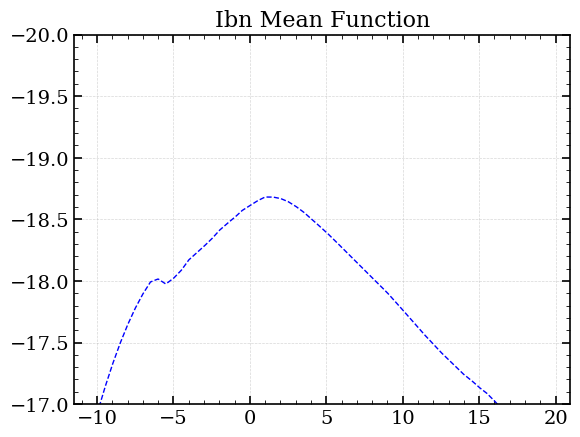

In [105]:
tt = jnp.linspace(grid.min(), grid.max(), 600)
plt.title('Ibn Mean Function')
plt.ylim((-20,-17)[::-1])
plt.plot(np.asarray(tt), np.asarray(mean_fn(tt)), 'b--', lw=1, label='Ibn mean (TinyGP)')
plt.show()

In [107]:
# Save to a tiny npz you can ship around
np.savez("ibn_mean_r.npz", grid=grid.astype(np.float32), mean_curve=mean_sm.astype(np.float32))
print("Saved ibn_mean_r.npz with keys: grid, mean_curve")


Saved ibn_mean_r.npz with keys: grid, mean_curve


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
from lc_param_GP import get_LC, GP_predict

import matplotlib.pyplot as plt
from matplotlib import cm

# Global figure style
plt.rcParams.update({
    # Fonts
    "font.family": "serif",           # Times-like font
    "font.size": 14,                  # Base font size
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    
    # Axes
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.5,
    
    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    
    # Lines
    "lines.linewidth": 1.5,
    "lines.markersize": 5,
    
    # Legend
    "legend.frameon": True,
    "legend.framealpha": 1,
    "legend.edgecolor": "black",
})

sn_list = [
    {"name": "ZTF22aboaoxy", "peak_epoch_r": 59874.433192},
    {"name": "ZTF20abkdtvy", "peak_epoch_r": 59046.028840},
    {"name": "ZTF22aadgetr", "peak_epoch_r": 59670.696886},
    {"name": "ZTF22aaaftmf", "peak_epoch_r": 59625.055928},
    {"name": "ZTF23aalczjh", "peak_epoch_r": 60098.957980},
]

ztf_redshifts = {
    "ZTF22aadgetr": 0.123454,
    "ZTF22aboaoxy": 0.159793,
    "ZTF20abkdtvy": 0.029284,
    "ZTF23aalczjh": 0.059561,
    "ZTF22aaaftmf": 0.125213,
}


colors = cm.Set2.colors  # gives 8 pastel colors


fig, ax = plt.subplots(figsize=(10, 6))

# Plot ZTF r-band light curves
for i, sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']
    z = ztf_redshifts.get(sn, None)
    if z is None or len(x) == 0:
        continue
    dL = cosmo.luminosity_distance(z).to("pc").value
    mu = 5 * np.log10(dL) - 5

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak
        ax.errorbar(mjd_aligned, y - mu, yerr=y_err, fmt='o', markersize=4, label=sn, alpha=0.7, color=colors[i], zorder=10)
        ax.plot(mjd_pred_aligned, y_pred - mu, '-', lw=2, alpha=0.9, color=colors[i], zorder=10)
    except Exception as e:
        idx = np.argsort(mjd_aligned)
        ax.errorbar(mjd_aligned[idx], y[idx] - mu, yerr=y_err[idx], fmt='o-', markersize=4, label=sn, alpha=0.7, color=colors[i])

# Plot FBOT light curves
FBOT_PATH = r"C:\Users\jgmad\Research\Ibn\data\FBOT.txt"
FBOTZ_PATH = r"C:\Users\jgmad\Research\Ibn\data\FBOTZ.txt"
colnames = ['Name', 'Filter', 'JD', 'Flux', 'e_Flux', 'mag', 'e_mag', 'Tel']
tbl = Table.read(FBOT_PATH, format='ascii.basic', data_start=35, names=colnames)

# Read FBOTZ catalog for redshift
fbotz_colnames = ['ZTF', 'f_ZTF', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs', 'IAU', 'MJD', 'Pmag', 'e_Pmag', 't0.5,g', 'e_t0.5,g', 'g-r', 'f_g-r', 'z', 'Class', 'f_Class', 'Ref']
fbotz = Table.read(FBOTZ_PATH, format='ascii.mrt',guess=False)
# Build redshift lookup by IAU name (strip spaces
redshift_dict = {str(row['IAU']).strip().replace(' ',''): row['z'] for row in fbotz if row['z'] is not None}
print(redshift_dict)

names = np.unique(tbl['Name'])
filters = ['g', 'r', 'i']

for i, name in enumerate(names):

    #for filt in filters:
    mask = (tbl['Name'] == name) & (tbl['Filter'] == 'r')
    if np.sum(mask) == 0:
        print(f'No r-band data for {name}, skipping.')
    mask = (tbl['Name'] == name) & (tbl['Filter'] == 'Kepler')
    group = tbl[mask]
    det_mask = group['e_mag'] < 10
    if np.sum(det_mask) == 0:
        continue
    epoch = np.array(group['JD'][det_mask])
    mag = np.array(group['mag'][det_mask])
    mag_err = np.array(group['e_mag'][det_mask])

    if len(epoch) == 0:
        continue
    peak_idx = np.argmin(mag)
    peak_epoch = epoch[peak_idx]
    epoch_aligned = epoch - peak_epoch

    # Get IAU name and redshift
    iau_name = str(name).strip()
    z = redshift_dict.get(iau_name, None)
    if z is None or z == '':
        question = f'No redshift for {iau_name}. Skip? (y/n): '
        continue
    try:
        z = float(z)
    except Exception:
        continue

    try:
        x_pred, y_pred, pred_var = GP_predict(epoch, mag, mag_err, metric=np.var(epoch))
        x_pred_aligned = x_pred - peak_epoch
        # Convert apparent mag to absolute mag
        dL = cosmo.luminosity_distance(z).to("pc").value
        mu = 5 * np.log10(dL) - 5
        abs_mag_err = mag_err  # error unchanged
        ax.plot(x_pred_aligned, y_pred - mu, '-', lw=0.5, alpha=0.9, color='#d3d3d3')
    except Exception as e:
        idx = np.argsort(epoch_aligned)
        ax.errorbar(epoch_aligned[idx], mag[idx], yerr=mag_err[idx], fmt='o-', markersize=4, alpha=0.7, color='#d3d3d3')

ax.set_xlabel('Days since peak')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Ibn Candidates with FBOT Transient Light Curves')
ax.set_ylim((-22,-14)[::-1])
ax.legend(fontsize='small', loc='lower right')
ax.grid(True)
plt.tight_layout()

# Add zoomed-in inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

zoom_xlim = (-20, 30)      # days since peak
zoom_ylim = (-22, -16)       # magnitude

axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=2)

# ZTF curves in inset
for i, sn_info in enumerate(sn_list):
    sn = sn_info["name"]
    peak = sn_info["peak_epoch_r"]
    ztf = pd.read_csv('data/ZTFBTS/'+sn+'.csv')
    ztfr = ztf[ztf['ant_passband'] == 'R']
    data = ztfr
    ndata = data[1.086/data['ant_magerr']<=4]
    data = data[1.086/data['ant_magerr']>4]
    x = data['ant_mjd']
    y = data['ant_mag']
    y_err = data['ant_magerr']

    if len(x) == 0:
        continue
    mjd_aligned = x - peak
    z = ztf_redshifts.get(sn, None)
    if z is None or len(x) == 0:
        continue
    dL = cosmo.luminosity_distance(z).to("pc").value
    mu = 5 * np.log10(dL) - 5
    try:
        x_pred, y_pred, pred_var = GP_predict(x, y, y_err, metric=np.var(x))
        mjd_pred_aligned = x_pred - peak
        axins.errorbar(mjd_aligned, y - mu, yerr=y_err, fmt='o', markersize=4, alpha=0.7, color=colors[i], zorder=10)
        axins.plot(mjd_pred_aligned, y_pred - mu, '-', lw=2, alpha=0.9, color=colors[i], zorder=10)
    except Exception as e:
        idx = np.argsort(mjd_aligned)
        axins.errorbar(mjd_aligned[idx], y[idx] - mu, yerr=y_err[idx], fmt='o-', markersize=4, alpha=0.7, color=colors[i])

axins.set_xlim(zoom_xlim)
axins.set_ylim(zoom_ylim[::-1])  # invert y-axis for mag
axins.set_xticks([])
axins.set_yticks([])

plt.savefig('FBOT.png')

In [ ]:
DAYS_AFTER = 20

param_file, = glob(os.path.join(DATA_DIR, f"SN_interpretable_params{'_'+str(DAYS_AFTER) if DAYS_AFTER else ''}.csv"))
#ibn_param_file, = glob(os.path.join(DATA_DIR, f"SN_Ibn_interpretable_params{'_'+str(DAYS_AFTER) if DAYS_AFTER else ''}.csv"))

# params_of_interest = ['supernova_name','mean_g','mean_r','log_diagonal_short_r','log_diagonal_short_g','log_diagonal_long_r','log_diagonal_long_g','log_scale_long','log_scale_short'] + ['off_diagonal_short','off_diagonal_long']

df = pd.read_csv(param_file)
# df = df[params_of_interest]

df
try:
    df = df.rename(columns={'oid':'supernova_name'})
    df = df.drop(['oid_r','oid_g'],axis=1)
except KeyError:
    pass

df['first_det'] = df[['first_det_r','first_det_g']].min(axis=1)

lookup_dict = dict(zip(summary_data['ZTFID'], summary_data['type'] == 'SN Ibn'))
z_dict = dict(zip(summary_data['ZTFID'], summary_data['redshift']))
type_dict = dict(zip(summary_data['ZTFID'], summary_data['type']))

df['Ibn'] = df['supernova_name'].map(lookup_dict)
df['redshift'] = df['supernova_name'].map(z_dict).astype(float)

df = df[~df['supernova_name'].map(type_dict).isnull()] # For now only labeled dataset
df.replace(-9999, np.nan, inplace=True)
null_counts = df.isnull().sum()

print(null_counts[null_counts>0])

decline_slope_g     2560
decline_slope_r     3311
duration_g           591
duration_r           438
first_det_g          355
first_det_r          112
last_nondet_g       7598
last_nondet_r       8126
meandec_g           8732
meandec_r           8732
meanra_g            8732
meanra_r            8732
peak_epoch_g         954
peak_epoch_r         860
peak_mag_g           954
peak_mag_r           860
rise_slope_g        2128
rise_slope_r        1760
rise_time_flag_g    7719
rise_time_flag_r    7819
rise_time_g         7997
rise_time_r         8377
s0_g                7611
s0_r                8129
first_det            467
redshift              26
dtype: int64


In [ ]:

try:
    df = df.rename(columns={'oid':'supernova_name'})
    df = df.drop(['oid_r','oid_g'],axis=1)
except KeyError:
    pass

df['first_det'] = df[['first_det_r','first_det_g']].min(axis=1)

lookup_dict = dict(zip(summary_data['ZTFID'], summary_data['type'] == 'SN Ibn'))
z_dict = dict(zip(summary_data['ZTFID'], summary_data['redshift']))
type_dict = dict(zip(summary_data['ZTFID'], summary_data['type']))

df['Ibn'] = df['supernova_name'].map(lookup_dict)
df['redshift'] = df['supernova_name'].map(z_dict).astype(float)

df = df[~df['supernova_name'].map(type_dict).isnull()] # For now only labeled dataset
print(f'Before redshift cut: {len(df)}')
df = df[~df['redshift'].isnull()]
df = df[df['redshift'] > 0]
print(f'After redshift cut {len(df)}')

slope_features = ['rise_slope_r','rise_slope_g','decline_slope_r','decline_slope_g']

slope_features = ['rise_slope_r','rise_slope_g','decline_slope_r','decline_slope_g']

dropped_features = ['meandec_g','meandec_r','meanra_g','meanra_r','last_nondet_g','last_nondet_r','rise_time_flag_r','rise_time_flag_g']
imputed_features = slope_features+['duration_g','duration_r','peak_epoch_g', 'peak_epoch_r','rise_time_g', 'rise_time_r']+['s0_g','s0_r',]+['peak_mag_r', 'peak_mag_g','first_det','first_det_g', 'first_det_r']
safe_features = [
       'ndetection_g', 'ndetection_r',
       'color'] #+  [n+'_missing' for n in imputed_features]
cut_features = ['redshift']

features = imputed_features + cut_features + safe_features

# Drop columns in droppped_features
df = df.drop(dropped_features,axis=1)

# Drop NaN values in cut features
df.replace(-9999, np.nan, inplace=True)
print(f'Before cut_features cut {len(df)}')
df = df.dropna(subset=cut_features)
print(f'After cut_features cut {len(df)}')

# Impute features in imputed_features
from sklearn.impute import SimpleImputer
for col in imputed_features:
    df[f'{col}_missing'] = df[col].isna().astype(int)
imputer = SimpleImputer(strategy='median')
df[imputed_features] = imputer.fit_transform(df[imputed_features])

# Add color g - r

df['color'] = df['peak_mag_g'] - df['peak_mag_r']

# Correct to peak mag from redshift:

dL = cosmo.luminosity_distance(df['redshift']).to("pc").value
mu = 5 * np.log10(dL) - 5           
df['peak_mag_r'] = df['peak_mag_r'] - mu
df['peak_mag_g'] = df['peak_mag_g'] - mu

df['peak_epoch_r'] = df['peak_epoch_r'] - df['first_det_r']
df['peak_epoch_g'] = df['peak_epoch_g'] - df['first_det_g']
print(len(df))

Before redshift cut: 8732
After redshift cut 8705
Before cut_features cut 8705
After cut_features cut 8705
8705


In [5]:
df[df['peak_mag_g']<-9000]

Empty DataFrame
Columns: [supernova_name, decline_slope_g, decline_slope_r, duration_g, duration_r, filt_g, filt_r, first_det_g, first_det_r, ndetection_g, ndetection_r, peak_epoch_g, peak_epoch_r, peak_mag_g, peak_mag_r, rise_slope_g, rise_slope_r, rise_time_g, rise_time_r, s0_g, s0_r, first_det, Ibn, redshift, rise_slope_r_missing, rise_slope_g_missing, decline_slope_r_missing, decline_slope_g_missing, duration_g_missing, duration_r_missing, peak_epoch_g_missing, peak_epoch_r_missing, rise_time_g_missing, rise_time_r_missing, s0_g_missing, s0_r_missing, peak_mag_r_missing, peak_mag_g_missing, first_det_missing, first_det_g_missing, first_det_r_missing, color]
Index: []

[0 rows x 42 columns]

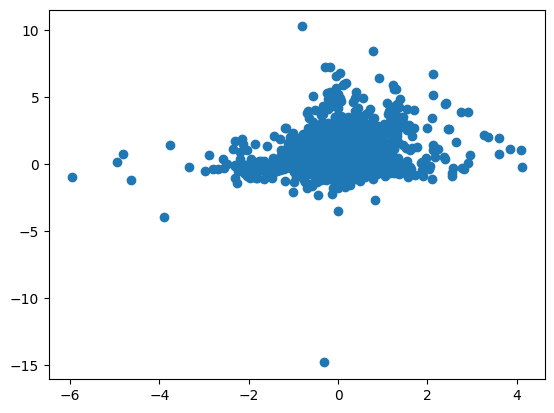

In [6]:
df[df['supernova_name'] == 'ZTF21abcxner']['color']
compare, = glob(os.path.join(DATA_DIR, "gp_params_SN_all.csv"))
compare = pd.read_csv(compare)
color_dict = dict(zip(compare['supernova_name'], compare['color_at_peak']))
df['color_compare'] = df['supernova_name'].map(color_dict).astype(float)
plt.scatter(df['color'],-2.5*df['color_compare'])
plt.show()

In [7]:
prefixes = ['SN','AT', 'TD']
def strip_name(name):
    if name == '-':
        return None
    elif "".join(name[:2]) in prefixes:
        return name[2:]
    else:
        return name

'''ztf_to_name = {r['ZTFID']:strip_name(r['IAUID']) for _,r in summary_data.iterrows()}
ztf_names = [n for n in df['supernova_name']]
names = [ztf_to_name[z] for z in ztf_names]
print(names)'''

"ztf_to_name = {r['ZTFID']:strip_name(r['IAUID']) for _,r in summary_data.iterrows()}\nztf_names = [n for n in df['supernova_name']]\nnames = [ztf_to_name[z] for z in ztf_names]\nprint(names)"

In [8]:
df_ibn = df[df['supernova_name'].isin(summary_data[summary_data['type'] == 'SN Ibn']['ZTFID'])].copy()

# split by Ibn

df_rest = df[df['Ibn'] == False]
print('Before',len(df))
print('After',len(df_rest))
print('Ibn',len(df_ibn))

Before 8705
After 8662
Ibn 43


In [9]:
# Count NaN values per column
rest_nan_counts = df_rest.isnull().sum()

print('Non Ibn:')
for a,b in rest_nan_counts.items():
    print(a,b)

'''print('before',len(df_rest))
df_rest_filtered = df_rest[~((df_rest['last_nondet_g'].isnull()) | (df_rest['last_nondet_r'].isnull()))].copy() # drop where either last_nondet_r or last_nondet_g is null
print('after',len(df_rest_filtered))'''

# Count NaN values per column
ibn_nan_counts = df_ibn.isnull().sum()

print('Ibn:')
for a,b in ibn_nan_counts.items():
    print(a,b)

'''print('before',len(df_ibn))
df_ibn_filtered = df_ibn[~((df_ibn['last_nondet_g'].isnull()) | (df_ibn['last_nondet_r'].isnull()))].copy() # drop where either last_nondet_r or last_nondet_g is null
print('after',len(df_ibn_filtered))'''

# Removed the before and after since there were too many null nondets

df_rest_filtered = df_rest.copy()
df_ibn_filtered = df_ibn.copy()

Non Ibn:
supernova_name 0
decline_slope_g 0
decline_slope_r 0
duration_g 0
duration_r 0
filt_g 0
filt_r 0
first_det_g 0
first_det_r 0
ndetection_g 0
ndetection_r 0
peak_epoch_g 0
peak_epoch_r 0
peak_mag_g 0
peak_mag_r 0
rise_slope_g 0
rise_slope_r 0
rise_time_g 0
rise_time_r 0
s0_g 0
s0_r 0
first_det 0
Ibn 0
redshift 0
rise_slope_r_missing 0
rise_slope_g_missing 0
decline_slope_r_missing 0
decline_slope_g_missing 0
duration_g_missing 0
duration_r_missing 0
peak_epoch_g_missing 0
peak_epoch_r_missing 0
rise_time_g_missing 0
rise_time_r_missing 0
s0_g_missing 0
s0_r_missing 0
peak_mag_r_missing 0
peak_mag_g_missing 0
first_det_missing 0
first_det_g_missing 0
first_det_r_missing 0
color 0
color_compare 130
Ibn:
supernova_name 0
decline_slope_g 0
decline_slope_r 0
duration_g 0
duration_r 0
filt_g 0
filt_r 0
first_det_g 0
first_det_r 0
ndetection_g 0
ndetection_r 0
peak_epoch_g 0
peak_epoch_r 0
peak_mag_g 0
peak_mag_r 0
rise_slope_g 0
rise_slope_r 0
rise_time_g 0
rise_time_r 0
s0_g 0
s0_r 0

In [10]:
'''def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def gen_points(feature_x,feature_y,df1=df_rest_filtered,df2=df_ibn_filtered):
    df1 = remove_outliers_iqr(df1,[feature_x,feature_y])
    x = df1[feature_x].astype(float)
    y = df1[feature_y].astype(float)

    df2 = remove_outliers_iqr(df2,[feature_x,feature_y])
    xi = df2[feature_x].astype(float)
    yi = df2[feature_y].astype(float)
    return x,y,xi,yi'''

'def remove_outliers_iqr(df, cols):\n    df_clean = df.copy()\n    for col in cols:\n        Q1 = df_clean[col].quantile(0.25)\n        Q3 = df_clean[col].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]\n    return df_clean\n\ndef gen_points(feature_x,feature_y,df1=df_rest_filtered,df2=df_ibn_filtered):\n    df1 = remove_outliers_iqr(df1,[feature_x,feature_y])\n    x = df1[feature_x].astype(float)\n    y = df1[feature_y].astype(float)\n\n    df2 = remove_outliers_iqr(df2,[feature_x,feature_y])\n    xi = df2[feature_x].astype(float)\n    yi = df2[feature_y].astype(float)\n    return x,y,xi,yi'

In [11]:
df_rest_filtered['Ibn'] = 0
df_ibn_filtered['Ibn'] = 1

full = pd.concat([df_rest_filtered,df_ibn_filtered],ignore_index=True)
# 
#  = full.drop('supernova_name',axis=1)
# full['Ibn'] = full['Ibn'].map({True:1,False:0}) # Map from boolean to int

# full.drop(['log_jitter_r','log_jitter_r'],axis=1)

print(len(df_ibn_filtered))

43


In [12]:
# Train Test Split
# full = full[['mean_g,']]
'''
X = full.drop('Ibn',axis=1)
y = full['Ibn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,stratify=y,random_state=12282005)
print(X_train)
'''

unique_SN = full['supernova_name'].unique()


SN_to_type = dict(zip(full['supernova_name'], full['Ibn']))
types = [SN_to_type[SN] for SN in unique_SN]

print(unique_SN,SN_to_type,types)

train_SN,test_SN = train_test_split(unique_SN,stratify=types,test_size=0.4,random_state=12282005)

train_mask = full['supernova_name'].isin(train_SN)
test_mask = ~train_mask

X_train = full[train_mask][features]
y_train = full[train_mask]['Ibn']

X_test = full[test_mask][features]
y_test = full[test_mask]['Ibn']
print(len(full),len(X_test))

['ZTF18abmxdhb' 'ZTF21abhtkiy' 'ZTF24abvbcxs' ... 'ZTF24abiesnr'
 'ZTF20abfadah' '2023tsz'] {'ZTF18abmxdhb': 0, 'ZTF21abhtkiy': 0, 'ZTF24abvbcxs': 0, 'ZTF21aapowty': 0, 'ZTF20acvezdt': 0, 'ZTF19abangws': 0, 'ZTF24abqwuyx': 0, 'ZTF21abwgpgt': 0, 'ZTF22aaxbape': 0, 'ZTF20acpgnej': 0, 'ZTF23abcqwkn': 0, 'ZTF18abklbam': 0, 'ZTF20aabqiiy': 0, 'ZTF20aamiwbp': 0, 'ZTF23abnfram': 0, 'ZTF20aalrptc': 0, 'ZTF21aacudxe': 0, 'ZTF18adasopt': 0, 'ZTF24abcugcf': 0, 'ZTF19abdoior': 0, 'ZTF23aaeeawl': 0, 'ZTF21abtcftb': 0, 'ZTF25aalvbwm': 0, 'ZTF18acbxmvy': 0, 'ZTF20abegiry': 0, 'ZTF24abnfuyr': 0, 'ZTF18abmjyvo': 0, 'ZTF22abfzaed': 0, 'ZTF21aaxylga': 0, 'ZTF24aahkesn': 0, 'ZTF24aagtqam': 0, 'ZTF19acxyumq': 0, 'ZTF24abbbttv': 0, 'ZTF20acvdfmw': 0, 'ZTF21aaabvoj': 0, 'ZTF20acvziuf': 0, 'ZTF20aahapgw': 0, 'ZTF22abmxzxm': 0, 'ZTF20acqgklx': 0, 'ZTF21abuetwv': 0, 'ZTF22abfvrcb': 0, 'ZTF23abjikaf': 0, 'ZTF24abgvkxx': 0, 'ZTF20actskcf': 0, 'ZTF21abtwvyl': 0, 'ZTF22aaxnxer': 0, 'ZTF24abllcml': 0, 'ZTF20aamkyyx'

Now let's try to SMOTE

In [13]:
for a,b in X_train.isnull().sum().items():
    print(a,b)

rise_slope_r 0
rise_slope_g 0
decline_slope_r 0
decline_slope_g 0
duration_g 0
duration_r 0
peak_epoch_g 0
peak_epoch_r 0
rise_time_g 0
rise_time_r 0
s0_g 0
s0_r 0
peak_mag_r 0
peak_mag_g 0
first_det 0
first_det_g 0
first_det_r 0
redshift 0
ndetection_g 0
ndetection_r 0
color 0


In [14]:
'''from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12282005,sampling_strategy=0.3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)'''

'from imblearn.over_sampling import SMOTE\n\nsm = SMOTE(random_state=12282005,sampling_strategy=0.3)\nX_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)'

In [15]:
'''import seaborn as sns

X_train_resampled_labeled = X_train_resampled.copy()

conditions = [
    ~X_train_resampled.isin(X_train.to_dict('list')).all(axis=1),  # Is SMOTE data
    X_train_resampled.isin(df_ibn.to_dict('list')).all(axis=1) # Is Ibn
]

X_train_resampled_labeled['hue'] = np.select(conditions,['SMOTE','Ibn'],default='Non-Ibn')

print(X_train_resampled_labeled['hue'].value_counts())
print(X_train_resampled_labeled.info())
interest = features + ['hue']
sns.pairplot(X_train_resampled_labeled[interest],hue='hue',palette=['blue','red','orange'],plot_kws={'alpha': 0.6},corner=True)
'''

"import seaborn as sns\n\nX_train_resampled_labeled = X_train_resampled.copy()\n\nconditions = [\n    ~X_train_resampled.isin(X_train.to_dict('list')).all(axis=1),  # Is SMOTE data\n    X_train_resampled.isin(df_ibn.to_dict('list')).all(axis=1) # Is Ibn\n]\n\nX_train_resampled_labeled['hue'] = np.select(conditions,['SMOTE','Ibn'],default='Non-Ibn')\n\nprint(X_train_resampled_labeled['hue'].value_counts())\nprint(X_train_resampled_labeled.info())\ninterest = features + ['hue']\nsns.pairplot(X_train_resampled_labeled[interest],hue='hue',palette=['blue','red','orange'],plot_kws={'alpha': 0.6},corner=True)\n"

Defining custom objective and evaluation

In [16]:
'''import numpy as np
from lightgbm import LGBMClassifier

def focal_loss_lgb(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Convert predictions to probabilities
        p = 1.0 / (1.0 + np.exp(-y_pred))
        grad = alpha * (y_true - p) * ((1 - p) ** gamma) * gamma + p - y_true
        hess = alpha * ((1 - p) ** gamma) * (gamma * p * (1 - p) * (1 - gamma * p)) + p * (1 - p)
        return grad, hess
    return loss

def focal_loss_eval(alpha=0.25, gamma=2.0):
    def eval_func(y_true, y_pred):
        p = 1.0 / (1.0 + np.exp(-y_pred))
        pt = p * y_true + (1 - p) * (1 - y_true)
        loss = -alpha * (1 - pt) ** gamma * np.log(pt + 1e-12)
        return 'focal_loss', np.mean(loss), False  # False = lower is better
    return eval_func'''

"import numpy as np\nfrom lightgbm import LGBMClassifier\n\ndef focal_loss_lgb(alpha=0.25, gamma=2.0):\n    def loss(y_true, y_pred):\n        # Convert predictions to probabilities\n        p = 1.0 / (1.0 + np.exp(-y_pred))\n        grad = alpha * (y_true - p) * ((1 - p) ** gamma) * gamma + p - y_true\n        hess = alpha * ((1 - p) ** gamma) * (gamma * p * (1 - p) * (1 - gamma * p)) + p * (1 - p)\n        return grad, hess\n    return loss\n\ndef focal_loss_eval(alpha=0.25, gamma=2.0):\n    def eval_func(y_true, y_pred):\n        p = 1.0 / (1.0 + np.exp(-y_pred))\n        pt = p * y_true + (1 - p) * (1 - y_true)\n        loss = -alpha * (1 - pt) ** gamma * np.log(pt + 1e-12)\n        return 'focal_loss', np.mean(loss), False  # False = lower is better\n    return eval_func"

In [24]:
# OPTIMIZING FOR F BETA SCORE 

# Try to tune parameters using optuna

import optuna
from lightgbm import LGBMClassifier,early_stopping, log_evaluation
from sklearn.metrics import fbeta_score #f1_score,recall_score
from sklearn.model_selection import train_test_split,StratifiedKFold,LeaveOneOut

import warnings
warnings.filterwarnings("ignore")

optuna.logging.set_verbosity(optuna.logging.FATAL)

from imblearn.over_sampling import SMOTE

alpha = 1/2 # 1/beta

full = full.drop_duplicates(subset=['supernova_name']).reset_index(drop=True)

X = full[features]
y = full['Ibn']

# Define objective function for Optuna
def objective_fn(trial):
    sampling_strategy = 1.0
    #ampling_strategy = 1.0
    threshold = trial.suggest_uniform('threshold', 0.05, 0.95)
    #hreshold = 0.5

    #focal_obj  = focal_loss_lgb(alpha, gamma)
    #focal_eval = focal_loss_eval(alpha, gamma)

    params = {
        'class_weight': 'balanced',
        'n_estimators': 300,
        'learning_rate': 0.01,
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'reg_alpha': 0,
        'reg_lambda': 0,
        'subsample': 0.6666028791233275,
        'colsample_bytree': 0.6652640151318506,
        'random_state': 12282005,
        'verbosity':-1,
        #'objective':focal_obj
    }

    # want to do training and validation over 5 different splits:
    #print(sum(y))

    splitting = StratifiedKFold(
        n_splits=7,
        shuffle=True,
        random_state=12282005
    )
    #splitting = LeaveOneOut()
    mscores = []
    scores = []

    sm = SMOTE(random_state=12282005,sampling_strategy=sampling_strategy)

    # We have to apply SMOTE within each fold so we start with X and y

    for train_idx,val_idx in splitting.split(X,y):
        X_train_fold,y_train_fold,X_val_fold,y_val_fold = X.iloc[train_idx],y.iloc[train_idx],X.iloc[val_idx],y.iloc[val_idx]

        X_train_fold_resampled,y_train_fold_resampled = sm.fit_resample(X_train_fold,y_train_fold)
        #X_train_fold_resampled,y_train_fold_resampled = X_train_fold,y_train_fold

        model = LGBMClassifier(**params)

        model.fit(
            X_train_fold_resampled, y_train_fold_resampled,
            eval_set=[(X_val_fold, y_val_fold)],
            #eval_metric=focal_eval,
            callbacks=[early_stopping(5)]
        )

        y_probs = model.predict_proba(X_val_fold)[:, 1]
        y_pred = (y_probs >= threshold).astype(int) 
        #score = f1_score(y_test, y_pred, average='binary')  # Focus on class 1
        if alpha:
            score = fbeta_score(y_val_fold, y_pred, beta=1/alpha, pos_label=1, average='binary')  # Focus on class 1 (Ibn)
            mscore = recall_score(y_val_fold, y_pred,pos_label=1,average='binary')
        else:
            mscore = fbeta_score(y_val_fold, y_pred, beta=2, pos_label=1, average='binary')  # Focus on class 1 (Ibn)
            score = recall_score(y_val_fold, y_pred,pos_label=1,average='binary')
        mscores.append(mscore)
        scores.append(score)

    scores_mean = np.mean(scores)
    scroes_std  = np.std(scores, ddof=1)
    #trial.set_user_attr('sampling_strategy', sampling_strategy)
    trial.set_user_attr('threshold', threshold)
    #trial.set_user_attr('alpha', alpha)
    #trial.set_user_attr('gamma', gamma)
    trial.set_user_attr('scores_std', float(scroes_std))
    return scores_mean

# Run Optuna optimization
study = optuna.create_study(direction='maximize')

study.optimize(objective_fn, n_trials=100, n_jobs=1, show_progress_bar=True)


# ---

  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0527306
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0576884
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0529337
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496019
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.064435
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0597568
Training until validation scores don't improve for 5 rounds


Best trial: 0. Best value: 0.489928:   1%|          | 1/100 [00:05<08:16,  5.02s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0595973
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.101194
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.110633
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0931442
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0815599
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.11519
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.110371
Training until 

Best trial: 0. Best value: 0.489928:   2%|▏         | 2/100 [00:07<05:16,  3.23s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.107444
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0463022
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480007
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0446714
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0453701
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0545393
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496258
Training un

Best trial: 0. Best value: 0.489928:   3%|▎         | 3/100 [00:18<11:21,  7.02s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0524943
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0996314
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.110301
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0917025
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0801599
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.113896
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.109055
Training unti

Best trial: 0. Best value: 0.489928:   4%|▍         | 4/100 [00:21<08:33,  5.35s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.105505
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0624903
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0666664
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0627592
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0590295
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0731598
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0694296
Training un

Best trial: 0. Best value: 0.489928:   5%|▌         | 5/100 [00:27<08:48,  5.56s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0700864
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511799
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536884
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502097
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0503167
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.058775
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.056432
Training unt

Best trial: 0. Best value: 0.489928:   6%|▌         | 6/100 [00:37<11:00,  7.02s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0582119
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0968405
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.110892
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0899663
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0785832
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.112527
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.107715
Training unti

Best trial: 6. Best value: 0.508477:   7%|▋         | 7/100 [00:40<08:52,  5.73s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.10367
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0471744
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0495596
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0463019
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.046938
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557957
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518185
Training unti

Best trial: 6. Best value: 0.508477:   8%|▊         | 8/100 [00:49<10:21,  6.75s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540743
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.056465
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0592433
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0555375
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05535
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0641979
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0620811
Training unti

Best trial: 6. Best value: 0.508477:   9%|▉         | 9/100 [00:58<11:18,  7.45s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.063552
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0702041
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0813651
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0707283
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0595589
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0868079
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0802049
Training un

Best trial: 6. Best value: 0.508477:  10%|█         | 10/100 [01:01<09:24,  6.27s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0787352
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.131899
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.147134
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.122686
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.106734
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.151763
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.143589
Training until v

Best trial: 6. Best value: 0.508477:  11%|█         | 11/100 [01:03<07:19,  4.93s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.135019
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536988
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0585613
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536261
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0505397
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0651413
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0607006
Training un

Best trial: 6. Best value: 0.508477:  12%|█▏        | 12/100 [01:10<08:01,  5.47s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0607443
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0584887
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0651225
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0579432
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0521348
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0713084
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.064627
Training un

Best trial: 6. Best value: 0.508477:  13%|█▎        | 13/100 [01:13<07:02,  4.85s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0645591
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0512521
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0545141
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507524
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0490198
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0605655
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0569849
Training u

Best trial: 6. Best value: 0.508477:  14%|█▍        | 14/100 [01:18<07:07,  4.97s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0572298
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0550998
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0581619
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0544648
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0533022
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0644288
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.061482
Training un

Best trial: 14. Best value: 0.513907:  15%|█▌        | 15/100 [01:23<06:59,  4.93s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0626103
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0543142
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0572654
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534824
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0531414
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0626443
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0603293
Training u

Best trial: 15. Best value: 0.516198:  16%|█▌        | 16/100 [01:29<07:05,  5.07s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0623643
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0543934
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0572726
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0537145
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535109
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0628676
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0601821
Training u

Best trial: 15. Best value: 0.516198:  17%|█▋        | 17/100 [01:35<07:19,  5.29s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0628034
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0531082
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557538
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518835
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0529931
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0606172
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.058755
Training un

Best trial: 17. Best value: 0.530349:  18%|█▊        | 18/100 [01:43<08:29,  6.21s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0605953
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0548503
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0578192
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541014
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.054708
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0627629
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0608065
Training un

Best trial: 17. Best value: 0.530349:  19%|█▉        | 19/100 [01:52<09:26,  6.99s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0628762
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.059641
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0637459
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0596698
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0589462
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0677483
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0660737
Training un

Best trial: 17. Best value: 0.530349:  20%|██        | 20/100 [02:00<09:39,  7.24s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0677505
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.052016
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.054431
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0509111
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518271
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0597701
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0574516
Training unt

Best trial: 17. Best value: 0.530349:  21%|██        | 21/100 [02:10<10:56,  8.31s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0592728
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0552785
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0586235
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0547463
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535368
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0647041
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0618389
Training u

Best trial: 17. Best value: 0.530349:  22%|██▏       | 22/100 [02:17<10:01,  7.72s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0627989
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0548079
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0580088
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0542257
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0542607
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0632817
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0609514
Training u

Best trial: 17. Best value: 0.530349:  23%|██▎       | 23/100 [02:24<09:40,  7.54s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0632777
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.053653
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0558351
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0522789
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0522763
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0613303
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.058957
Training unt

Best trial: 17. Best value: 0.530349:  24%|██▍       | 24/100 [02:32<09:41,  7.65s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0608774
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0667314
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0718228
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0661694
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0603915
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0800165
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0747242
Training u

Best trial: 17. Best value: 0.530349:  25%|██▌       | 25/100 [02:36<08:22,  6.69s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0738476
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0501817
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526108
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0488766
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0495273
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0576912
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0552461
Training u

Best trial: 17. Best value: 0.530349:  26%|██▌       | 26/100 [02:45<09:02,  7.33s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05704
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0564673
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0602267
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0563196
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0548852
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0656037
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.063101
Training unti

Best trial: 17. Best value: 0.530349:  27%|██▋       | 27/100 [02:50<08:07,  6.67s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0644773
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526834
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0552556
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514896
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.052535
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0599643
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0578551
Training un

Best trial: 17. Best value: 0.530349:  28%|██▊       | 28/100 [02:57<08:11,  6.83s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0600277
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0512397
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538938
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0503359
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049842
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0593562
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565051
Training un

Best trial: 17. Best value: 0.530349:  29%|██▉       | 29/100 [03:05<08:19,  7.04s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0580398
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0500147
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526021
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0490294
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492272
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0575386
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0551493
Training u

Best trial: 17. Best value: 0.530349:  30%|███       | 30/100 [03:14<09:05,  7.80s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0571269
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0498838
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0524183
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486671
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0495132
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0574404
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0548263
Training u

Best trial: 17. Best value: 0.530349:  31%|███       | 31/100 [03:23<09:12,  8.00s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0568446
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496034
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518623
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483667
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0485773
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0575917
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540816
Training u

Best trial: 17. Best value: 0.530349:  32%|███▏      | 32/100 [03:29<08:30,  7.50s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05614
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492509
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518311
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479456
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483982
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0572631
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05375
Training until

Best trial: 32. Best value: 0.533163:  33%|███▎      | 33/100 [03:36<08:08,  7.30s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557052
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0474347
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0493595
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.046348
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0467033
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557527
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511085
Training un

Best trial: 32. Best value: 0.533163:  34%|███▍      | 34/100 [03:43<08:01,  7.30s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0539156
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.051231
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538199
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502514
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0508165
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0587457
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0567614
Training un

Best trial: 32. Best value: 0.533163:  35%|███▌      | 35/100 [03:50<07:48,  7.21s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05835
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507052
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0531226
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049783
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491648
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0592279
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0559179
Training unti

Best trial: 32. Best value: 0.533163:  36%|███▌      | 36/100 [03:56<07:11,  6.74s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0573302
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476558
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0498156
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0470485
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0472701
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0556962
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.051765
Training un

Best trial: 32. Best value: 0.533163:  37%|███▋      | 37/100 [04:03<07:05,  6.75s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541791
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0516081
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538491
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0503964
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507767
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0592747
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0566738
Training u

Best trial: 32. Best value: 0.533163:  38%|███▊      | 38/100 [04:09<06:45,  6.54s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0585052
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0762723
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0874079
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0791283
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0685399
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0923278
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.088702
Training un

Best trial: 32. Best value: 0.533163:  39%|███▉      | 39/100 [04:12<05:30,  5.42s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0867717
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0455433
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.047363
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0440697
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.045452
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534177
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0488189
Training unt

Best trial: 32. Best value: 0.533163:  40%|████      | 40/100 [04:21<06:27,  6.46s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0521529
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.045825
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0474952
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.044264
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0456935
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534774
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492947
Training unt

Best trial: 32. Best value: 0.533163:  41%|████      | 41/100 [04:31<07:30,  7.63s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0524743
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0448468
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0462277
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0421097
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0442695
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0523875
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0470463
Training u

Best trial: 32. Best value: 0.533163:  42%|████▏     | 42/100 [04:39<07:33,  7.81s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507466
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0503168
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526066
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0490213
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491559
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0578264
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055356
Training un

Best trial: 32. Best value: 0.533163:  43%|████▎     | 43/100 [04:46<07:14,  7.61s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.057199
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486109
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0506503
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0471362
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479949
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0563137
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526351
Training un

Best trial: 43. Best value: 0.535869:  44%|████▍     | 44/100 [04:54<07:03,  7.57s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0546138
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0459929
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477776
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0446175
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0459615
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.053602
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0497159
Training un

Best trial: 43. Best value: 0.535869:  45%|████▌     | 45/100 [05:01<06:59,  7.63s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0524228
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479506
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0499831
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0461559
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476577
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0555173
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0519278
Training u

Best trial: 43. Best value: 0.535869:  46%|████▌     | 46/100 [05:09<06:47,  7.55s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541069
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.048419
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0506
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0471308
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480309
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0560945
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0527885
Training until

Best trial: 43. Best value: 0.535869:  47%|████▋     | 47/100 [05:17<06:44,  7.63s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0547393
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0466306
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0481811
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0434569
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0445668
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0546328
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0493512
Training u

Best trial: 43. Best value: 0.535869:  48%|████▊     | 48/100 [05:22<05:58,  6.90s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0520505
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507804
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534427
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0497233
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0500211
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.058538
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0561018
Training un

Best trial: 43. Best value: 0.535869:  49%|████▉     | 49/100 [05:29<05:51,  6.90s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.057696
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479197
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0499003
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0470282
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0468105
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0562851
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518735
Training un

Best trial: 43. Best value: 0.535869:  50%|█████     | 50/100 [05:34<05:24,  6.48s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540696
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0489161
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511026
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0474897
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483271
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565278
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536156
Training u

Best trial: 50. Best value: 0.536228:  51%|█████     | 51/100 [05:42<05:28,  6.71s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055274
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0488094
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511501
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476722
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0482053
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565235
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536222
Training un

Best trial: 50. Best value: 0.536228:  52%|█████▏    | 52/100 [05:48<05:23,  6.75s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0553901
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477108
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0499409
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0463971
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0473318
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0554586
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.051724
Training un

Best trial: 50. Best value: 0.536228:  53%|█████▎    | 53/100 [05:55<05:22,  6.85s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541415
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0478942
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502506
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0464598
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0475428
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.05566
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0521084
Training unt

Best trial: 53. Best value: 0.540061:  54%|█████▍    | 54/100 [06:02<05:12,  6.78s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0542974
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0489495
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0510984
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476041
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0482937
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0567561
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535769
Training u

Best trial: 53. Best value: 0.540061:  55%|█████▌    | 55/100 [06:09<05:01,  6.70s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055179
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.13174
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.146575
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.122779
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.106354
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.152136
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.145217


Best trial: 53. Best value: 0.540061:  56%|█████▌    | 56/100 [06:10<03:48,  5.20s/it]

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.134715
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.04923
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514982
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477816
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0484871
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0566311
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration

Best trial: 53. Best value: 0.540061:  57%|█████▋    | 57/100 [06:16<03:52,  5.40s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0559133
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.046946
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049119
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0457788
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0467571
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0553637
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511602
Training unt

Best trial: 53. Best value: 0.540061:  58%|█████▊    | 58/100 [06:22<03:51,  5.51s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534973
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476499
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0501515
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0463885
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0475969
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0555364
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0522707
Training u

Best trial: 53. Best value: 0.540061:  59%|█████▉    | 59/100 [06:28<03:54,  5.72s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540208
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0459184
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477355
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0443214
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0451591
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541961
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491179
Training u

Best trial: 53. Best value: 0.540061:  60%|██████    | 60/100 [06:34<03:56,  5.90s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0521203
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0505562
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0532685
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496662
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0500486
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0582549
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0560119
Training u

Best trial: 53. Best value: 0.540061:  61%|██████    | 61/100 [06:40<03:46,  5.81s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0577541
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0489598
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0511009
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0475417
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0482471
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0567354
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535691
Training u

Best trial: 53. Best value: 0.540061:  62%|██████▏   | 62/100 [06:47<03:53,  6.13s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0553672
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0493373
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0516279
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480778
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486192
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0568487
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540846
Training u

Best trial: 53. Best value: 0.540061:  63%|██████▎   | 63/100 [06:54<03:58,  6.45s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557936
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0478912
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502136
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.04676
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476832
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0556106
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0520958
Training unt

Best trial: 53. Best value: 0.540061:  64%|██████▍   | 64/100 [07:01<03:57,  6.61s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.054338
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0474799
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049428
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0464682
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0468749
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557603
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0512824
Training unt

Best trial: 53. Best value: 0.540061:  65%|██████▌   | 65/100 [07:07<03:39,  6.27s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.053895
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0484155
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0506762
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0471082
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479802
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0560917
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0526802
Training un

Best trial: 53. Best value: 0.540061:  66%|██████▌   | 66/100 [07:13<03:37,  6.39s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0546274
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0626302
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0680982
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0621039
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0561229
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0755863
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0714726
Training u

Best trial: 53. Best value: 0.540061:  67%|██████▋   | 67/100 [07:17<03:00,  5.45s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0687611
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0628042
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0686834
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0624448
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0561186
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0753816
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0716668
Training u

Best trial: 53. Best value: 0.540061:  68%|██████▊   | 68/100 [07:20<02:33,  4.80s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0692993
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0622634
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0684433
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.062037
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055786
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.075108
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0717236
Training unti

Best trial: 53. Best value: 0.540061:  69%|██████▉   | 69/100 [07:23<02:15,  4.37s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0687193
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0709597
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0820228
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0716799
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0600177
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0875231
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0814513
Training u

Best trial: 53. Best value: 0.540061:  70%|███████   | 70/100 [07:26<01:55,  3.86s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0794354
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0558211
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0603542
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0560261
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0525337
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0667331
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0635381
Training u

Best trial: 53. Best value: 0.540061:  71%|███████   | 71/100 [07:30<01:54,  3.94s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0628038
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0546637
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0595174
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0545874
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0510568
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0656017
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0622458
Training u

Best trial: 53. Best value: 0.540061:  72%|███████▏  | 72/100 [07:34<01:54,  4.07s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0613711
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.050357
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0527864
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0490963
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0497882
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0579251
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055561
Training unt

Best trial: 53. Best value: 0.540061:  73%|███████▎  | 73/100 [07:41<02:08,  4.76s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0574857
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0721989
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0818265
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.072632
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0606186
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0880895
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0824295
Training un

Best trial: 53. Best value: 0.540061:  74%|███████▍  | 74/100 [07:44<01:49,  4.22s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.080092
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0495006
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0517092
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483663
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491669
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0568819
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541894
Training un

Best trial: 53. Best value: 0.540061:  75%|███████▌  | 75/100 [07:50<01:58,  4.75s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0560092
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477589
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502732
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0465898
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476001
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055817
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0520564
Training un

Best trial: 53. Best value: 0.540061:  76%|███████▌  | 76/100 [07:56<02:08,  5.34s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0542147
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0488739
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0512762
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476909
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0481584
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0569262
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0531394
Training u

Best trial: 53. Best value: 0.540061:  77%|███████▋  | 77/100 [08:03<02:09,  5.64s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0552189
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0550263
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0579254
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0541403
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0529473
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0641795
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0614029
Training u

Best trial: 53. Best value: 0.540061:  78%|███████▊  | 78/100 [08:07<01:57,  5.35s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0621846
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0979995
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.111094
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0907183
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0794595
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.11281
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.107938
Training until

Best trial: 53. Best value: 0.540061:  79%|███████▉  | 79/100 [08:09<01:31,  4.37s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.104227
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0518543
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.054274
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0509053
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514582
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0592537
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0568273
Training unt

Best trial: 53. Best value: 0.540061:  80%|████████  | 80/100 [08:15<01:32,  4.62s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0589796
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.04724
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0459762
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0467742
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0556057
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0508691
Training unt

Best trial: 53. Best value: 0.540061:  81%|████████  | 81/100 [08:20<01:33,  4.92s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0536434
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492213
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514223
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0475827
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0484013
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0569004
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538488
Training u

Best trial: 81. Best value: 0.541788:  82%|████████▏ | 82/100 [08:26<01:34,  5.25s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055545
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0499291
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0524528
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0487278
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0494933
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0577241
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0550896
Training un

Best trial: 81. Best value: 0.541788:  83%|████████▎ | 83/100 [08:33<01:34,  5.55s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0567149
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496674
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0519953
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483849
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491429
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.057202
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0544792
Training un

Best trial: 81. Best value: 0.541788:  84%|████████▍ | 84/100 [08:39<01:31,  5.69s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0564694
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0502429
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0525274
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049041
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0495966
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0575814
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0550528
Training un

Best trial: 81. Best value: 0.541788:  85%|████████▌ | 85/100 [08:44<01:26,  5.74s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0571578
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0510959
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535859
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0501891
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0505043
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0585795
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0564188
Training u

Best trial: 81. Best value: 0.541788:  86%|████████▌ | 86/100 [08:49<01:16,  5.47s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0579437
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480874
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0503643
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.046755
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477686
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557235
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0521821
Training un

Best trial: 81. Best value: 0.541788:  87%|████████▋ | 87/100 [08:55<01:13,  5.67s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.054356
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0498883
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0523142
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486858
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0494135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0575352
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0549461
Training un

Best trial: 81. Best value: 0.541788:  88%|████████▊ | 88/100 [09:02<01:10,  5.90s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0569223
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.048693
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507578
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0470956
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480944
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.056135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0530541
Training unt

Best trial: 81. Best value: 0.541788:  89%|████████▉ | 89/100 [09:07<01:03,  5.78s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0547075
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0493448
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514151
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477393
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0485135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565215
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540618
Training u

Best trial: 81. Best value: 0.541788:  90%|█████████ | 90/100 [09:13<00:57,  5.74s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055542
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0494271
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514509
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479504
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0485372
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0564691
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538266
Training un

Best trial: 81. Best value: 0.541788:  91%|█████████ | 91/100 [09:18<00:50,  5.65s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0556461
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492766
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0513547
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479932
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486287
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0563443
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0537849
Training u

Best trial: 81. Best value: 0.541788:  92%|█████████▏| 92/100 [09:24<00:45,  5.65s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0554499
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0493448
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514151
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477393
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0485135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565215
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0540618
Training u

Best trial: 81. Best value: 0.541788:  93%|█████████▎| 93/100 [09:30<00:39,  5.59s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.055542
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0492766
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0513547
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479932
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486287
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0563443
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0537849
Training un

Best trial: 81. Best value: 0.541788:  94%|█████████▍| 94/100 [09:35<00:33,  5.62s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0554499
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.048693
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0507578
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0470956
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0480944
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.056135
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0530541
Training unt

Best trial: 81. Best value: 0.541788:  95%|█████████▌| 95/100 [09:41<00:28,  5.63s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0547075
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0494115
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514736
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0479625
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0486702
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.056735
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0538702
Training un

Best trial: 81. Best value: 0.541788:  96%|█████████▌| 96/100 [09:46<00:22,  5.58s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557112
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0496402
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0517808
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0483816
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0491488
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0572173
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0543198
Training u

Best trial: 81. Best value: 0.541788:  97%|█████████▋| 97/100 [09:52<00:16,  5.52s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0563088
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0505145
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0532975
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.049386
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0500495
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0581391
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0557346
Training un

Best trial: 81. Best value: 0.541788:  98%|█████████▊| 98/100 [09:59<00:11,  6.00s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0576428
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0484571
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0509308
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0472394
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0477448
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565517
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0535967
Training u

Best trial: 81. Best value: 0.541788:  99%|█████████▉| 99/100 [10:04<00:05,  5.82s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0551703
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0490778
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0514166
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0476763
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0484345
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0565792
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0534949
Training u

Best trial: 81. Best value: 0.541788: 100%|██████████| 100/100 [10:11<00:00,  6.11s/it]

Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0554049


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get best params from study
best_params = study.best_trial.params

# Add necessary fixed parameters
best_params.update({
    'class_weight': 'balanced',
    'n_estimators':   1000,
    'random_state':   12282005,
    'learning_rate': 0.01,
    'reg_alpha': 0.2662044019333212,
    'reg_lambda': 0.09337327992988727,
    'subsample': 0.6666028791233275,
    'colsample_bytree': 0.6652640151318506,
    'random_state': 12282005,
    'verbosity':-1,
})

if not best_params.get('sampling_strategy'):
    best_params.update({
        'sampling_strategy':1.0
    })

# Initialize model
lgbm = LGBMClassifier(**best_params)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    test_size=0.2,
    random_state=12282005
)

sm = SMOTE(random_state=12282005,sampling_strategy=best_params['sampling_strategy'])
X_train_resampled,y_train_resampled = sm.fit_resample(X_tr,y_tr)

lgbm.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    callbacks=[early_stopping(50), log_evaluation(0)]
)

# Predict
y_probs = lgbm.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= study.best_trial.user_attrs['threshold']).astype(int) 

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

results_csv_file = os.path.join(DATA_DIR, "interpretable_results.csv")
header_fields = ['MODEL','METRIC','SC0RE','STD','DAYS_AFTER']
file_exists = os.path.exists(results_csv_file)


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[974]	valid_0's binary_logloss: 0.0203549
Accuracy: 0.9988512349224583
Confusion Matrix:
[[3462    3]
 [   1   16]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9991    0.9994      3465
           1     0.8421    0.9412    0.8889        17

    accuracy                         0.9989      3482
   macro avg     0.9209    0.9702    0.9442      3482
weighted avg     0.9989    0.9989    0.9989      3482



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, precision_score
import numpy as np

if not best_params.get('sampling_strategy'):
    best_params.update({
        'sampling_strategy':1.0
    })

try:
    best_threshold = best_params.pop('threshold')  # Extract threshold separately
    print(best_threshold)
except KeyError:
    pass

try:
    sampling_strategy = best_params.pop('sampling_strategy')
    print(sampling_strategy)
except KeyError:
    pass

# Add necessary fixed parameters
best_params.update({
    'class_weight': 'balanced',
    'n_estimators':   1000,
    'learning_rate': 0.01,
    'reg_alpha': 0.2662044019333212,
    'reg_lambda': 0.09337327992988727,
    'subsample': 0.6666028791233275,
    'colsample_bytree': 0.6652640151318506,
    'random_state': 12282005,
    'verbosity':-1,
})

clf = LGBMClassifier(**best_params)
sm = SMOTE(random_state=12282005,sampling_strategy=sampling_strategy)

# 3) Define the same CV splitter you used in Optuna
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6301994)

recalls = []
precisions = []
fprs = []
conf_matrices = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

    model = LGBMClassifier(**best_params)
    model.fit(X_train_resampled, y_train_resampled)

    y_probs = model.predict_proba(X_val)[:, 1]
    try:
        y_pred_fold = (y_probs >= best_threshold).astype(int)
    except:
        y_pred_fold = (y_probs >= 0.5).astype(int)

    recall = recall_score(y_val, y_pred_fold)
    precision = precision_score(y_val,y_pred_fold)
    cm = confusion_matrix(y_val, y_pred_fold)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_fold).ravel()

    recalls.append(recall)
    precisions.append(precision)
    conf_matrices.append(cm)
    fprs.append(fp/(tn+fp))

    print(f"\nFold {fold+1} Confusion Matrix:\n{cm}")
    print(f"Recall: {recall:.4f}")

print("\nRecall per fold:", recalls)
print("\nPrecisions per fold:", precisions)
print("Mean recall:   ", np.mean(recalls))
print("Mean precision:   ", np.mean(precisions))
print("STD of recall: ", np.std(recalls, ddof=1))
print("STD of precision: ", np.std(precisions, ddof=1))
print("Mean FPR:   ", np.mean(fprs))
print("STD of recall: ", np.std(fprs, ddof=1))

1.0


ValueError: For early stopping, at least one dataset and eval metric is required for evaluation

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix

# Which zero-based fold is “Fold 4”? (zero-based index = 3)
fold_to_inspect = 3

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # oversample
    X_res, y_res = sm.fit_resample(X_train, y_train)

    # train
    model = LGBMClassifier(**best_params)
    model.fit(X_res, y_res)

    # predict
    y_probs = model.predict_proba(X_val)[:, 1]
    y_pred = (y_probs >= best_threshold).astype(int)

    # if this is fold 4, print the misclassified names
    if fold == fold_to_inspect:
        # a boolean mask of where predictions != truth
        #mis_mask = (y_pred != y_val.values)
        miss_mask = (y_val.values == 1) & (y_pred == 0)
        # the original dataframe indices for those samples
        mis_idx = X_val.index[miss_mask]
        # print their supernova names
        print("Misclassified in fold 4:")
        print(full.loc[mis_idx, 'supernova_name'].tolist())

    # optionally still log the recall/confusion
    r = recall_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    print(f"Fold {fold+1} — recall {r:.3f}")


Fold 1 — recall 0.750
Fold 2 — recall 0.750
Fold 3 — recall 0.556
Misclassified in fold 4:
['2020nxt', 'ZTF22aaaepgu', 'ZTF20abfadah']
Fold 4 — recall 0.667
Fold 5 — recall 0.556


In [ ]:
print(sampling_strategy)

0.6331432916747535


In [ ]:
print(best_threshold)

0.43606926304704086


In [ ]:
import pandas as pd

# 1) Grab the test‐set names in the same order as X_test
#    (full[test_mask] was what you used to build X_test)
test_names = full.loc[test_mask, 'supernova_name'].reset_index(drop=True)
# 2) Build a small results DataFrame aligned by position

results = pd.DataFrame({
    'supernova_name': test_names,
    'y_true':         y_test.reset_index(drop=True),
    'y_pred':         y_pred
})

print(len(test_names),len(X_test),len(y_test))

# 3) Filter to the true Ibn’s (y_true==1) that were predicted 0
missed = results[(results.y_true == 1) & (results.y_pred == 0)]


# 4) Save the unique supernova names you missed
missed['supernova_name'] \
    .drop_duplicates() \
    .to_csv('misclassified_not_Ibn.csv', index=False)

print(
    f"Total mis‐classified rows: {len(missed)}\n"
    f"Unique Ibn’s missed   : {missed['supernova_name'].nunique()}\n"
    "Names written to misclassified_not_Ibn.csv"
)

missed_names = list(missed['supernova_name'])

ValueError: array length 1741 does not match index length 3482

In [ ]:
'''row = {'metric': 'fbeta' if alpha else 'recall','score':recall_scores.std(ddof=1),'std':recall_scores.std(ddof=1),'days_after': DAYS_AFTER if DAYS_AFTER else 0}
row = pd.DataFrame([row])
if file_exists:
    row.to_csv(results_csv_file, mode='a', index=False, header=False)
else:
    row.to_csv(results_csv_file, mode='w', index=False, header=True)

# fbeta: 0.30668426065272236'''

"row = {'metric': 'fbeta' if alpha else 'recall','score':recall_scores.std(ddof=1),'std':recall_scores.std(ddof=1),'days_after': DAYS_AFTER if DAYS_AFTER else 0}\nrow = pd.DataFrame([row])\nif file_exists:\n    row.to_csv(results_csv_file, mode='a', index=False, header=False)\nelse:\n    row.to_csv(results_csv_file, mode='w', index=False, header=True)\n\n# fbeta: 0.30668426065272236"

Gain: How much that feature reduced the loss function by

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

print(X_train_resampled.columns)
perm = PermutationImportance(lgbm,scoring=None, n_iter=1, random_state=42, cv=None, refit=False).fit(X_train, y_train,)
tmp = eli5.show_weights(perm)
display(eli5.show_weights(perm, top = len(list(X_train_resampled.columns)), feature_names = list(X_train_resampled.columns)))

Index(['rise_slope_r', 'rise_slope_g', 'decline_slope_r', 'decline_slope_g',
       'duration_g', 'duration_r', 'peak_epoch_g', 'peak_epoch_r',
       'rise_time_g', 'rise_time_r', 'peak_mag_r', 'peak_mag_g', 'redshift',
       'first_det', 'first_det_g', 'first_det_r', 'ndetection_g',
       'ndetection_r', 'color'],
      dtype='object')


Split Gain: How much that specific decision reduced the loss function by

Leaf Count: Number of rows/SN in that leaf

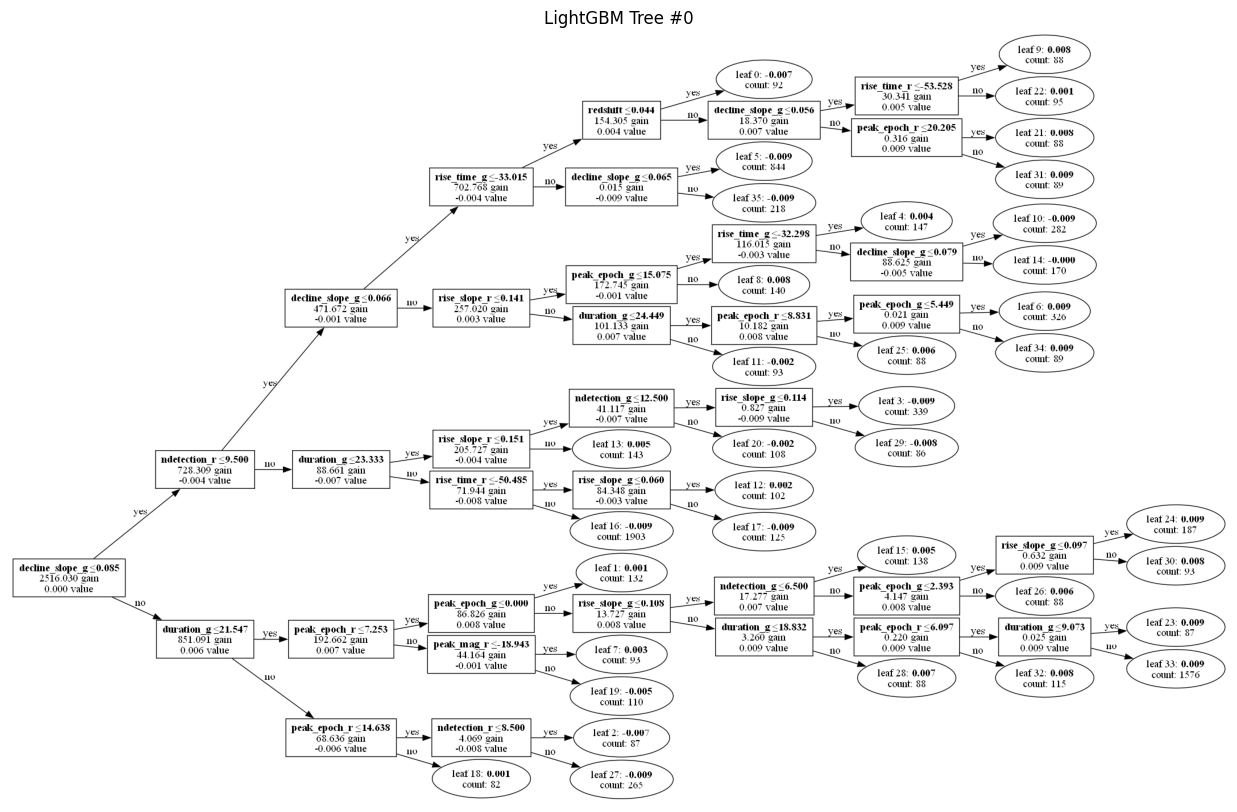

In [ ]:
from lightgbm import plot_tree

plot_tree(lgbm, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.title("LightGBM Tree #0")
plt.show()

In [ ]:
def walk_tree(node, path=None):
    if path is None:
        path = []

    if 'split_index' in node:  # internal node
        feature = node['split_feature']
        threshold = node['threshold']
        gain = node['split_gain']
        left = node['left_child']
        right = node['right_child']

        # Add split to path and recurse
        walk_tree(left, path + [f"{feature} ≤ {threshold:.4f} (gain: {gain:.3f})"])
        walk_tree(right, path + [f"{feature} > {threshold:.4f} (gain: {gain:.3f})"])

    else:  # leaf node
        print(f"🟢 Leaf node:")
        print(f"   ➤ Path: {' → '.join(path)}")
        print(f"   ➤ Sample count: {node['leaf_count']}")
        print(f"   ➤ Internal value (log-odds): {node['leaf_value']:.4f}")
        print("")

# Load tree 0 from your model
tree_info = lgbm.booster_.dump_model()['tree_info'][0]
walk_tree(tree_info['tree_structure'])

🟢 Leaf node:
   ➤ Path: 3 ≤ 0.0848 (gain: 2516.030) → 17 ≤ 9.5000 (gain: 728.309) → 3 ≤ 0.0656 (gain: 471.672) → 8 ≤ -33.0148 (gain: 702.768) → 12 ≤ 0.0438 (gain: 154.305)
   ➤ Sample count: 92
   ➤ Internal value (log-odds): -0.0067

🟢 Leaf node:
   ➤ Path: 3 ≤ 0.0848 (gain: 2516.030) → 17 ≤ 9.5000 (gain: 728.309) → 3 ≤ 0.0656 (gain: 471.672) → 8 ≤ -33.0148 (gain: 702.768) → 12 > 0.0438 (gain: 154.305) → 3 ≤ 0.0561 (gain: 18.370) → 9 ≤ -53.5275 (gain: 30.341)
   ➤ Sample count: 88
   ➤ Internal value (log-odds): 0.0081

🟢 Leaf node:
   ➤ Path: 3 ≤ 0.0848 (gain: 2516.030) → 17 ≤ 9.5000 (gain: 728.309) → 3 ≤ 0.0656 (gain: 471.672) → 8 ≤ -33.0148 (gain: 702.768) → 12 > 0.0438 (gain: 154.305) → 3 ≤ 0.0561 (gain: 18.370) → 9 > -53.5275 (gain: 30.341)
   ➤ Sample count: 95
   ➤ Internal value (log-odds): 0.0011

🟢 Leaf node:
   ➤ Path: 3 ≤ 0.0848 (gain: 2516.030) → 17 ≤ 9.5000 (gain: 728.309) → 3 ≤ 0.0656 (gain: 471.672) → 8 ≤ -33.0148 (gain: 702.768) → 12 > 0.0438 (gain: 154.305) → 3 > 0.0

In [ ]:
print(full[(full['duration_r'] < 0) & (full['duration_r'] > -100) & (full['Ibn'] == 1)])

     supernova_name  decline_slope_g  decline_slope_r  duration_g  duration_r  \
8366        2023tsz         0.092785         0.083058    8.709368   -8.696498   

     filt_g filt_r   first_det_g   first_det_r  ndetection_g  ...  \
8366      g      r  60218.775748  60230.614269            11  ...   

      decline_slope_r_missing  decline_slope_g_missing  duration_g_missing  \
8366                        0                        0                   0   

      duration_r_missing  peak_epoch_g_missing  peak_epoch_r_missing  \
8366                   0                     0                     0   

      rise_time_g_missing  rise_time_r_missing     color  color_compare  
8366                    1                    1 -0.257094            NaN  

[1 rows x 34 columns]


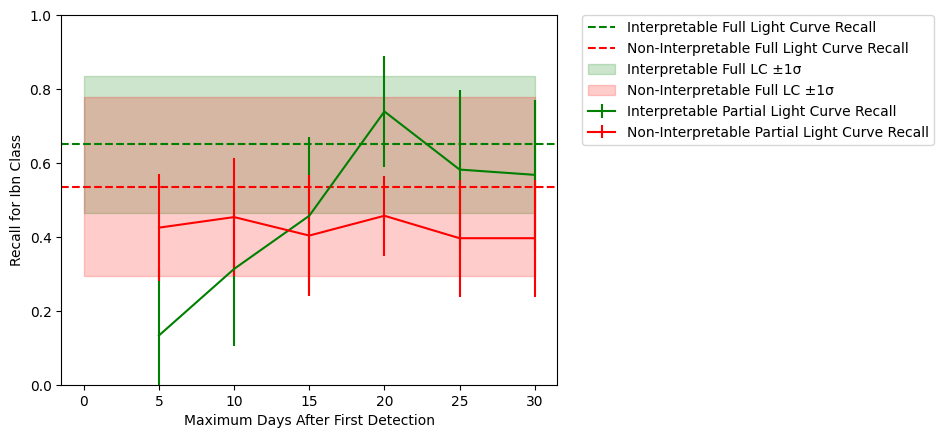

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
'''plt.plot([5,10,15,20],[0.1667,0.25,0.5556,0.6],label='Partial Light Curve Recall')
plt.plot([5,10,15,20],[0.72 for n in range(4)],label='Full Light Curve Recall')

plt.title('Recall for partial light curves (Interpretable Params)')
plt.legend()'''
plt.xlabel('Maximum Days After First Detection')
plt.ylabel('Recall for Ibn Class')
plt.ylim(0,1)

recall_data = pd.read_csv(os.path.join(DATA_DIR, "interpretable_results.csv"))
recall_data = recall_data[recall_data['metric']=='recall']

IN = recall_data[(recall_data['days_after']>0) & (recall_data['model'] == 'IN')]
NI = recall_data[(recall_data['days_after']>0) & (recall_data['model'] == 'NI')]

IN_row = recall_data[(recall_data['days_after'] == 0) & (recall_data['model'] == 'IN')].iloc[0]
NI_row = recall_data[(recall_data['days_after'] == 0) & (recall_data['model'] == 'NI')].iloc[0]

IN_full = IN_row['score']
IN_std = IN_row['std']

NI_full = NI_row['score']
NI_std = NI_row['std']

# Plot horizontal lines
plt.axhline(IN_full, label='Interpretable Full Light Curve Recall', color='green', linestyle='--')
plt.axhline(NI_full, label='Non-Interpretable Full Light Curve Recall', color='red', linestyle='--')

# Fill between for standard deviation
plt.fill_between(
    x=[0, max(recall_data['days_after'])],  # span full x-range
    y1=IN_full - IN_std,
    y2=IN_full + IN_std,
    color='green',
    alpha=0.2,
    label='Interpretable Full LC ±1σ'
)

plt.fill_between(
    x=[0, max(recall_data['days_after'])],
    y1=NI_full - NI_std,
    y2=NI_full + NI_std,
    color='red',
    alpha=0.2,
    label='Non-Interpretable Full LC ±1σ'
)
plt.errorbar(IN['days_after'],IN['score'],IN['std'],label='Interpretable Partial Light Curve Recall',color='green')
plt.errorbar(NI['days_after'],NI['score'],NI['std'],label='Non-Interpretable Partial Light Curve Recall',color='red')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()


In [ ]:
plt.plot([5,10,15,20],[155699,6589,67126,13884],label='Peak Epoch G')
plt.plot([5,10,15,20],[15419,9836,15906,3521],label='Peak Epoch R')
# plt.plot([5,10,15,20],[617,195743,8916556,216690],label='Decline Slope G')
plt.xlabel('Maximum Days After First Detection')
plt.ylabel('Feature Importance by Gain')
plt.title('Feature Importance Trend for Partial Light Curves')
plt.yscale('log')
plt.legend()

In [ ]:
plt.plot([5,10,15,20],[7038,353763,20846,94857],label='Decline Slope R')
plt.plot([5,10,15,20],[617,195743,8916556,216690],label='Decline Slope G')
plt.xlabel('Maximum Days After First Detection')
plt.ylabel('Feature Importance by Gain')
plt.title('Feature Importance Trend for Partial Light Curves')
plt.yscale('log')
plt.legend()

Index(['supernova_name', 'decline_slope_g', 'decline_slope_r', 'duration_g',
       'duration_r', 'filt_g', 'filt_r', 'first_det_g', 'first_det_r',
       'ndetection_g', 'ndetection_r', 'peak_epoch_g', 'peak_epoch_r',
       'peak_mag_g', 'peak_mag_r', 'rise_slope_g', 'rise_slope_r',
       'rise_time_g', 'rise_time_r', 'first_det', 'Ibn', 'redshift',
       'rise_slope_r_missing', 'rise_slope_g_missing',
       'decline_slope_r_missing', 'decline_slope_g_missing',
       'duration_g_missing', 'duration_r_missing', 'peak_epoch_g_missing',
       'peak_epoch_r_missing', 'rise_time_g_missing', 'rise_time_r_missing',
       'color', 'color_compare'],
      dtype='object')


Text(0.5, 1.0, 'P(Ibn) distribution by spectroscopic type')

<Figure size 1200x400 with 0 Axes>

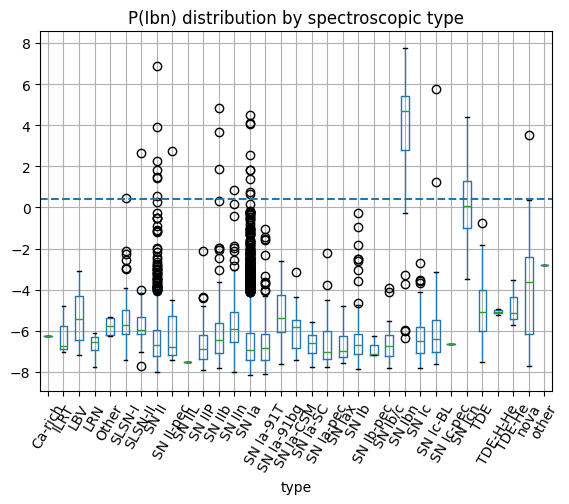

In [ ]:
print(full.columns)
full_with_type = full.copy()
full_with_type['type'] = full_with_type['supernova_name'].map(type_dict)
probs_full = lgbm.predict_proba(full_with_type[features])#[:, 1]
full_with_type['pred_prob'] = probs_full
plt.figure(figsize=(12,4))
full_with_type.boxplot(column='pred_prob', by='type', rot=60)
plt.axhline(best_threshold, ls='--')
plt.suptitle(''); plt.title('P(Ibn) distribution by spectroscopic type')

In [ ]:
import matplotlib.pyplot as plt

def plot_prob_hist(y_true, y_prob, bins=40):
    plt.figure()
    plt.hist(y_prob[y_true == 0], bins=bins, alpha=0.6, label='Not Ibn')
    plt.hist(y_prob[y_true == 1], bins=bins, alpha=0.6, label='Ibn')
    plt.axvline(best_threshold, ls='--')
    plt.xlabel('Predicted P(Ibn)')
    plt.ylabel('Count')
    plt.legend(); plt.title('Probability distribution by true label')


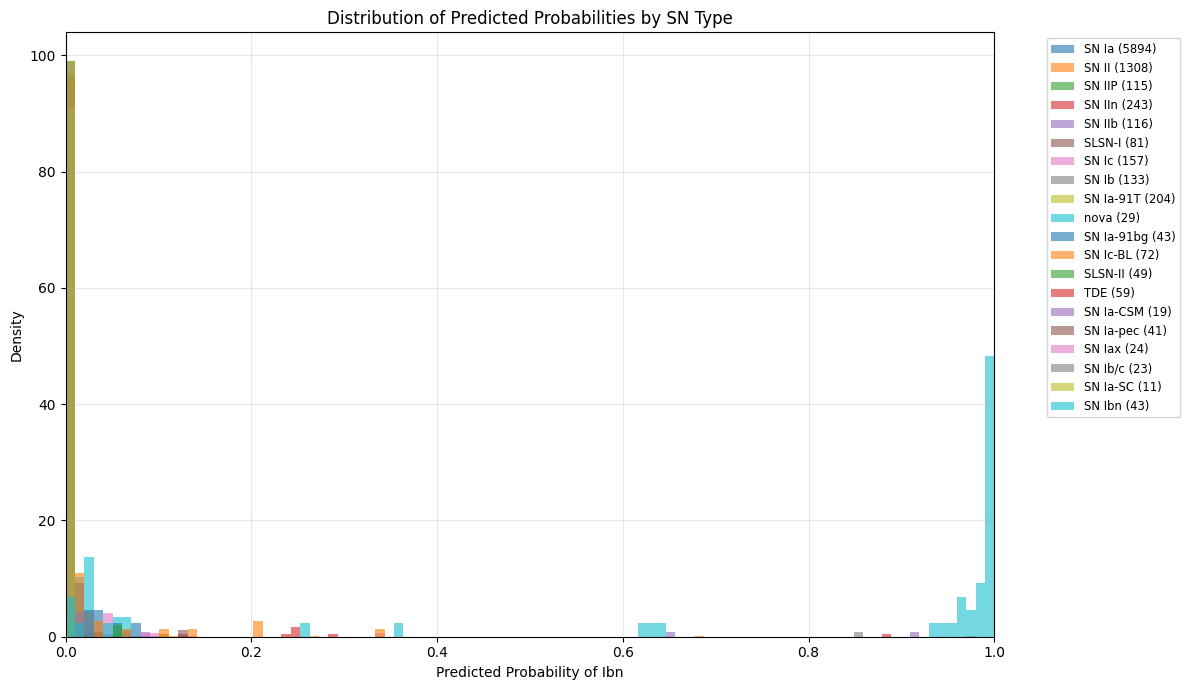

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 7))

# Filter valid probabilities
valid_probs = full_with_type[(full_with_type['pred_prob'] >= 0) & 
                             (full_with_type['pred_prob'] <= 1)]

types = valid_probs['type'].dropna().unique()

for t in types:
    subset = valid_probs[valid_probs['type'] == t]
    if len(subset) < 10:
        continue  # Skip types with too few examples to avoid scaling issues
    plt.hist(subset['pred_prob'],
             bins=np.linspace(0, 1, 100),
             density=True,
             alpha=0.6,
             label=f"{t} ({len(subset)})")

plt.xlabel('Predicted Probability of Ibn')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities by SN Type')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 1)  # Force x-axis from 0 to 1 explicitly
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
full_with_type[(full_with_type['pred_prob'] > 0.06) & (full_with_type['type'] !='SN Ibn')]

supernova_name  decline_slope_g  decline_slope_r  duration_g  \
120    ZTF25aaurzyo         0.149268         0.135741    8.031007   
654    ZTF19aamoidt     -9999.000000     -9999.000000   10.346845   
905    ZTF21aajmkrd         0.068880         0.065603   23.839405   
1420   ZTF18abtfvsk         0.096298         0.107821   14.652766   
1811   ZTF20abvqibv         0.077913         0.040778   31.745596   
1828   ZTF19achticg         0.207949         0.074771    5.867029   
1851   ZTF23abrqzjb         0.065720         0.074706   21.995931   
1871   ZTF21aaazjia     -9999.000000     -9999.000000   11.469952   
2445   ZTF18abukavn         0.149450         0.086356   11.616221   
2616   ZTF20abmoakx     -9999.000000         0.025558   13.480057   
3213   ZTF20aamuqwn         0.042407         0.069425   23.661969   
3580   ZTF19acyjzeo         0.107440         0.062439   15.217952   
4103   ZTF20abijfqq     -9999.000000     -9999.000000   10.990677   
4238   ZTF22abnvmgu         0.334354         0.092434    3.897070   
4771   ZTF20aasfhia         0.042454     -9999.000000   39.802249   
4822   ZTF19aaydpiq         0.072203         0.072165   15.651133   
4880   ZTF20aclwclm     -9999.000000     -9999.000000    8.880739   
5107   ZTF20abmoans     -9999.000000     -9999.000000    4.789975   
5707   ZTF23aaqmddq     -9999.000000     -9999.000000   10.907284   
5839   ZTF19acxxwrs         0.116007         0.080987    8.719580   
5942   ZTF21aagkzmc         0.088139         0.090505    7.997147   
6015   ZTF22aajkpen         0.074802         0.098754   13.814575   
6550   ZTF22aawcmcr         0.138526         0.088741   15.679804   
7481   ZTF21aakilyd         0.070697         0.081647   20.158136   
7560   ZTF21acpfndw         0.093028         0.109395   18.482609   
7848   ZTF25aavcbih         0.074308         0.058621   20.217582   
8046   ZTF19ackbclh         0.117960         0.107064   15.678385   
8122   ZTF24aahzfwk         0.081711         0.041957   30.537482   
8136   ZTF18aahuujv         0.064512         0.104344   26.074633   
8492   ZTF23aapkxkq         0.104166         0.157176    8.556702   

       duration_r filt_g filt_r   first_det_g   first_det_r  ndetection_g  \
120      9.182137      g      r  60836.033248  60837.762133             4   
654  -9999.000000      g      r  58556.282187  59164.762324             3   
905     21.926628      g      r  59253.791370  59255.674853            18   
1420    17.551720      g      r  58367.433498  58367.377477             6   
1811    29.909914      g      r  59080.626500  59095.553268            22   
1828     6.794636      g      r  58786.525972  58792.365273             3   
1851    21.899308      g      r  60266.785341  60266.832852             4   
1871    11.482753      g      r  59217.768504  59217.789408             4   
2445    17.428100      g      r  58370.326596  58370.269443             5   
2616    13.544678      g      r  59047.309076  59048.188988             6   
3213    20.690442      g      r  58892.785449  58892.753612             6   
3580    16.193553      g      r  58829.320218  58832.096658             5   
4103 -9999.000000      g      r  59026.147376  59032.130464             3   
4238    12.715425      g      r  59870.503275  59870.481852             3   
4771    38.849041      g      r  58911.173656  58912.093365             8   
4822    18.545110      g      r  58641.477268  58641.519721             6   
4880     2.894604      g      r  59142.945985  59153.860415             3   
5107     1.926820      g      r  59047.452647  59049.384451             6   
5707    10.944578      g      r  60134.013988  60131.986977             6   
5839    17.599831      g      r  58827.830535  58827.699121             3   
5942     6.011189      g      r  59248.130762  59250.154145             4   
6015    10.860324      g      r  59709.700148  59707.761884             6   
6550    22.531758      g      r  59784.874382  59784.825166             7   
7481    12.055494

In [ ]:
cols_to_check = [
    'decline_slope_g', 'decline_slope_r',
    'duration_g', 'duration_r',
    'color',
    'first_det_g', 'first_det_r'
    # Add any other color/lightcurve features you've engineered
]

# Get the misclassified rows
misclassified = full_with_type[
    (full_with_type['pred_prob'] > 0.8) & (full_with_type['type'] != 'SN Ibn')
]

# Compare to Ibn examples
ibn = full_with_type[full_with_type['type'] == 'SN Ibn']
print(misclassified[cols_to_check].describe())
print(ibn[cols_to_check].describe())

       decline_slope_g  decline_slope_r  duration_g  duration_r     color  \
count         2.000000         2.000000    2.000000    2.000000  2.000000   
mean          0.110735         0.103953   11.841070   13.863624 -0.262513   
std           0.054494         0.044955    5.388243    6.620621  0.029549   
min           0.072203         0.072165    8.031007    9.182137 -0.283408   
25%           0.091469         0.088059    9.936038   11.522881 -0.272961   
50%           0.110735         0.103953   11.841070   13.863624 -0.262513   
75%           0.130002         0.119847   13.746102   16.204367 -0.252066   
max           0.149268         0.135741   15.651133   18.545110 -0.241619   

        first_det_g   first_det_r  
count      2.000000      2.000000  
mean   59738.755258  59739.640927  
std     1551.785415   1552.977903  
min    58641.477268  58641.519721  
25%    59190.116263  59190.580324  
50%    59738.755258  59739.640927  
75%    60287.394253  60288.701530  
max    60836.03324